In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.chdir('D:\capstone')

In [37]:
df=pd.read_csv("osfhome dataset/Data_API.csv",parse_dates=['Datetime_updated'])

C:\Users\Kent\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,4,6,8,9,10,14,15,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [38]:
df.drop(["Datetime_updated_seconds","Smart_contract","Seller_username","Buyer_username"],axis=1,inplace=True)

In [6]:
#market in the dataset
df['Market'].value_counts()

Atomic           3185292
OpenSea          1907262
Cryptokitties     725400
Godsunchained     236210
Decentraland       16863
Name: Market, dtype: int64

<AxesSubplot:xlabel='Market', ylabel='count'>

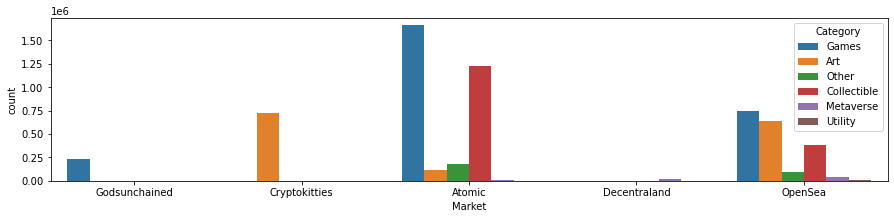

In [7]:
#what kind of category is there in each market?
fig,ax=plt.subplots(figsize=(15,3))
sns.countplot(data=df,x='Market',orient='h',hue='Category')

In [25]:
df.columns

Index(['ID_token', 'Transaction_hash', 'Seller_address', 'Buyer_address',
       'Image_url_1', 'Image_url_2', 'Image_url_3', 'Image_url_4',
       'Price_Crypto', 'Crypto', 'Price_USD', 'Name', 'Description',
       'Collection', 'Market', 'Datetime_updated', 'Permanent_link',
       'Unique_id_collection', 'Collection_cleaned', 'Category'],
      dtype='object')

In [28]:
print("number of NFT:")
for i in df["Category"].unique():
    temp_df=df[df["Category"]==i]
    print(i,":",len(temp_df["Unique_id_collection"].unique()))

number of NFT:
Games : 2202432
Art : 833333
Other : 242990
Collectible : 1344449
Metaverse : 47286
Utility : 7752


In [8]:
#how many active seller and buyer?
seller=len(df['Seller_address'].unique())
buyer=len(df['Buyer_address'].unique())
common=len(set(df['Seller_address']).intersection(set(df['Buyer_address'])))

print("no. of sellers:",seller)
print("no. of buyers:",buyer)
print("common seller and buyers:",common)
print("no. of data:",len(df))

no. of sellers: 312920
no. of buyers: 358348
common seller and buyers: 138323
no. of data: 6071027


You should consider upgrading via the 'C:\Users\Kent\anaconda3\python.exe -m pip install --upgrade pip' command.


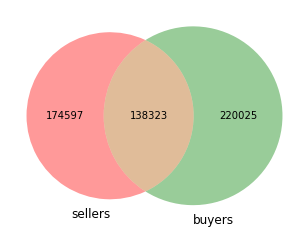

In [9]:
!pip install matplotlib-venn
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
venn2(subsets = (seller-common, buyer-common, common), set_labels = ('sellers', 'buyers'))

In [10]:
#how many unique NTFs and collections are there in the dataset?
print("Unique_id_collection:",len(df["Unique_id_collection"].unique()))
print("Collection_cleaned:",len(df["Collection_cleaned"].unique()))

Unique_id_collection: 4678242
Collection_cleaned: 4624


In [11]:
#no. of NFTs in each year
print(sum(df['Datetime_updated']<="2018-12-31"))
print(sum(df['Datetime_updated']<="2019-12-31")-sum(df['Datetime_updated']<="2018-12-31"))
print(sum(df['Datetime_updated']<="2020-12-31")-sum(df['Datetime_updated']<="2019-12-31"))
print(sum(df['Datetime_updated']<="2021-05-01")-sum(df['Datetime_updated']<="2020-12-31"))

702473
746489
1245954
3376111


In [12]:
#price of each NFT increase over years
#1.av price of each NFT in each time interval
#2.plot (x=1,2,3,4)
yearlyprice=[]

for index,i in enumerate(df['Collection_cleaned'].unique()):
    print(index,"/",len(df['Collection_cleaned'].unique()))
    temp_dataset=df[df['Collection_cleaned']==i]
    interval1=temp_dataset['Datetime_updated']<="2018-12-31"
    interval2=(temp_dataset['Datetime_updated']>"2018-12-31")&(temp_dataset['Datetime_updated']<="2019-12-31")
    interval3=(temp_dataset['Datetime_updated']>"2019-12-31")&(temp_dataset['Datetime_updated']<="2020-12-31")
    interval4=temp_dataset['Datetime_updated']>"2020-12-31"
    temp_list=[]
    temp_list.append(i)
    
    for j in [interval1,interval2,interval3,interval4]:
        if len(temp_dataset[j])!=0:
            temp_list.append(temp_dataset[j]['Price_Crypto'].mean())
        else:
            temp_list.append(np.nan)
    
    for k in [2,3]:
        if not (temp_list[k]>0):
            if (temp_list[k-1]>0)&(temp_list[k+1]>0):
                temp_list[k]=(temp_list[k-1]+temp_list[k+1])/2
    
    yearlyprice.append(temp_list)
    print(temp_list)

0 / 4624
['Godsunchained', 0.00995, 0.04656410885922432, 0.03595349590192167, 392.52760851323177]
1 / 4624
['Cryptokittie', 0.0948167767416319, 0.1559272096268303, 0.0815589256146676, 0.1734978814611723]
2 / 4624
['Oghodlergang', nan, nan, 1.01025, nan]
3 / 4624
['Anyo.b', nan, nan, 25.476028021309027, 55.026694917636505]
4 / 4624
['Miscellanea', nan, 0.7285156483983227, 282.84259160125333, 1.9958508591167772]
5 / 4624
['Thingsyosay', nan, nan, 1.0268656716417908, 0.23142857142857146]
6 / 4624
['Kale', nan, nan, 21.772704827481665, 4.989259528848785]
7 / 4624
['Worthkword', nan, nan, 2.252272727272727, 0.65]
8 / 4624
['Gpk.topp', nan, nan, 91.36098513567478, 76.13989529324937]
9 / 4624
['Official', nan, nan, 144.17738647230806, 114.05466522655794]
10 / 4624
['Altermoment', nan, nan, 11.666666666666666, nan]
11 / 4624
['Parody', nan, nan, 8.97090016366612, 240.03243902439024]
12 / 4624
['Rumspringart', nan, nan, 125.5, nan]
13 / 4624
['Tonextonenft', nan, nan, 63.857142857142854, nan]
1

134 / 4624
['Zeeiofficial', nan, nan, 21.841269841269842, nan]
135 / 4624
['Majesticsea', nan, nan, 32.65971416220339, 11.504135337142857]
136 / 4624
['Dream', nan, nan, 2.862777777777778, 11.490093023255811]
137 / 4624
['Maxo', nan, 15.035, 1.7919616988278386, 42.36503472222219]
138 / 4624
['Craslhgordon', nan, nan, 3.0, nan]
139 / 4624
['Ballneydog', nan, nan, 50.0, nan]
140 / 4624
['Photoartlive', nan, nan, 1.0, nan]
141 / 4624
['Cryptolevnet', nan, nan, 7.994062499999999, nan]
142 / 4624
['Special', nan, nan, 1.6666666666666667, 0.259625]
143 / 4624
['Dogpatchbrew', nan, nan, 31.697097593015872, nan]
144 / 4624
['Video', nan, nan, 2769.595041322314, 1.1888887645723663]
145 / 4624
['Naughtynifti', nan, nan, 263.72312859875, nan]
146 / 4624
['Ourlilbuddyz', nan, nan, 1.0, nan]
147 / 4624
['Triplethreat', nan, nan, 1.0, nan]
148 / 4624
['Xprimntal', nan, nan, 11.0, nan]
149 / 4624
['Radiosilence', nan, nan, 12.196884962333334, nan]
150 / 4624
['Alphakittenz', nan, nan, 5.0, nan]
151 /

266 / 4624
['Beauty', nan, nan, 160.58823529411765, 3.8373229056777376]
267 / 4624
['Dust', nan, nan, 402.7967479674797, 1180.3515220158579]
268 / 4624
['Brave', nan, nan, 0.2524969339055714, 1.7320131262823633]
269 / 4624
['Goldenchild', nan, nan, 2.0, nan]
270 / 4624
['Chicken', nan, nan, 1.9, 0.3146]
271 / 4624
['Ccdmacrolife', nan, nan, 3.3333333333333335, 61.75]
272 / 4624
['Richcrypto', nan, nan, 9.0, nan]
273 / 4624
['Sketch', nan, nan, 128.72727036459764, 40.14416665383177]
274 / 4624
['Bcharity', nan, nan, 12.656666666666666, 0.08]
275 / 4624
['Korekushon', nan, nan, 5.852173913043477, nan]
276 / 4624
['Day', nan, nan, 99.13931123919319, 5.610732712595188]
277 / 4624
['Bobslyelmeme', nan, nan, 100.0, nan]
278 / 4624
['Xndotcom', nan, nan, 1.0, nan]
279 / 4624
['Fepefepette', nan, nan, 45.75, nan]
280 / 4624
['Tornecurse', nan, nan, 25.0, nan]
281 / 4624
['Stoinkiewonk', nan, nan, 1.0, nan]
282 / 4624
['Simple', nan, nan, 1.0909090909090908, 10.114818181818183]
283 / 4624
['Pai

407 / 4624
['Cryptogalary', nan, nan, 0.2, nan]
408 / 4624
['Bruce', nan, nan, 218.29233837796878, 0.12285714285714289]
409 / 4624
['Rainbow', nan, nan, 0.995, 0.27941176470588236]
410 / 4624
['Scottowen', nan, nan, 5.0, nan]
411 / 4624
['Cryptoindark', nan, nan, 10.0, 2.665]
412 / 4624
['Scrtgeometry', nan, nan, nan, 48.88777655716538]
413 / 4624
['Steve', nan, nan, 1.0, 83.90912993874137]
414 / 4624
['Byron', nan, nan, nan, 12.097440176924495]
415 / 4624
['Hallowscard', nan, nan, nan, 21.11273895938225]
416 / 4624
['Exitlimbowax', nan, nan, nan, 46.79356491512519]
417 / 4624
['Army', nan, nan, nan, 28.86028996837209]
418 / 4624
['Alpacaworld', nan, nan, nan, 38.92313023101684]
419 / 4624
['Blkchancard', nan, nan, nan, 24.753047289052812]
420 / 4624
['Wallstrebet', nan, nan, nan, 3.6539999997999995]
421 / 4624
['Stampcollect', nan, nan, nan, 7.780397485862068]
422 / 4624
['Birthofcrypt', nan, nan, nan, 2.6666666666666665]
423 / 4624
['Savethepeace', nan, nan, nan, 1.0]
424 / 4624
['Dg

552 / 4624
['Betternextyr', nan, nan, nan, 100.0]
553 / 4624
['Evmanzworld', nan, nan, nan, 15.0]
554 / 4624
['Stf.capcom', nan, nan, nan, 60.60310761668105]
555 / 4624
['Rplanet', nan, nan, nan, 553.6345386626801]
556 / 4624
['Gnarlyboard', nan, nan, nan, 6.9375]
557 / 4624
['Imtwerkypepe', nan, nan, nan, 1143.3496770409374]
558 / 4624
['Lysergicmind', nan, nan, nan, 6.655407266620928]
559 / 4624
['Nytcreature', nan, nan, nan, 1.3330588235294116]
560 / 4624
['Ethermineeee', nan, nan, nan, 14.103270439696969]
561 / 4624
['Kernelillokp', nan, nan, nan, 1.8445625639351793]
562 / 4624
['Trocproclock', nan, nan, nan, 1.7449912382615627]
563 / 4624
['Chronaverse', nan, nan, nan, 16.571478860182438]
564 / 4624
['Rttlsymmetry', nan, nan, nan, 0.4968253968253968]
565 / 4624
['Transcedentl', nan, nan, nan, 105.55555555555556]
566 / 4624
['Kurrjursart', nan, nan, nan, 10.578947368421053]
567 / 4624
['Fundadores', nan, nan, nan, 2.451824077836608]
568 / 4624
['Robonomicaio', nan, nan, nan, 62.589

697 / 4624
['Nintendoseal', nan, nan, nan, 1.0]
698 / 4624
['Raenartdrop', nan, nan, nan, 0.5]
699 / 4624
['Dartgosp', nan, nan, nan, 1.0]
700 / 4624
['Simagigit', nan, nan, nan, 5.0]
701 / 4624
['Ohsgtfrgwjl', nan, nan, nan, 23.0]
702 / 4624
['Winterwonde', nan, nan, nan, 1.0]
703 / 4624
['Drawingtime', nan, nan, nan, 5.0]
704 / 4624
['Uahaw.wam', nan, nan, nan, 164.05325443]
705 / 4624
['Othancard', nan, nan, nan, 0.002]
706 / 4624
['Diamondtech', nan, nan, nan, 0.2]
707 / 4624
['Vision', nan, nan, 0.4, 2.036307692307692]
708 / 4624
['Messagecard', nan, nan, nan, 1.0]
709 / 4624
['Sunsetsworld', nan, nan, nan, 5.0]
710 / 4624
['Cowboylineup', nan, nan, nan, 0.17633333333333334]
711 / 4624
['Gifartonwax', nan, nan, nan, 57.43152030474382]
712 / 4624
['Krstarchart', nan, nan, nan, 4.724455445544555]
713 / 4624
['Pandalover', nan, nan, nan, 10.0]
714 / 4624
['Luzakyarttcu', nan, nan, nan, 0.01]
715 / 4624
['Kofsnkshade', nan, nan, nan, 300.0]
716 / 4624
['Fillthespace', nan, nan, nan, 3

841 / 4624
['Cptnpwnznftz', nan, nan, nan, 2.45625]
842 / 4624
['Btcartdrops', nan, nan, nan, 0.03371430357142858]
843 / 4624
['Graffcologne', nan, nan, nan, 2.1346153846153846]
844 / 4624
['Puzzlecrypto', nan, nan, nan, 4.162879369277109]
845 / 4624
['Dnabldwrld', nan, nan, nan, 0.6663010595833329]
846 / 4624
['Claypetfox', nan, nan, nan, 1.62138472704]
847 / 4624
['Litadezignz', nan, nan, nan, 7.770204081632652]
848 / 4624
['Wearebabegod', nan, nan, nan, 4.534909090909091]
849 / 4624
['Conceptbo', nan, nan, nan, 5.4901985223463665]
850 / 4624
['Wondercollec', nan, nan, nan, 1.2523432580769234]
851 / 4624
['Cryptoeuclid', nan, nan, nan, 18.463109375]
852 / 4624
['Canvases', nan, nan, nan, 0.4139869360283689]
853 / 4624
['Loweffwaifu', nan, nan, nan, 12.273333333333333]
854 / 4624
['Borlandworld', nan, nan, nan, 20.070806451612903]
855 / 4624
['Emblemtomn', nan, nan, nan, 1.525]
856 / 4624
['Dedhedartist', nan, nan, nan, 34.43012005421533]
857 / 4624
['Crpcreature', nan, nan, nan, 75.1

981 / 4624
['Missmelartsy', nan, nan, nan, 3.0]
982 / 4624
['Magntaart', nan, nan, nan, 5.75952571901099]
983 / 4624
['Magorvalienw', nan, nan, nan, 0.035727272727272726]
984 / 4624
['Ornigodcard', nan, nan, nan, 0.48841666666666655]
985 / 4624
['Paddingtons', nan, nan, nan, 0.1047619047619051]
986 / 4624
['Hieronomo', nan, nan, nan, 0.00099997]
987 / 4624
['Toysinthe', nan, nan, nan, 100.0]
988 / 4624
['Simplyfunft', nan, nan, nan, 0.05]
989 / 4624
['Neuro', nan, nan, 0.20555555555555555, 6.034161057851239]
990 / 4624
['Ninetartnft', nan, nan, nan, 8.848541666458333]
991 / 4624
['Lunarchicken', nan, nan, nan, 0.10564058399999998]
992 / 4624
['Orbist', nan, nan, nan, 0.01]
993 / 4624
['Abrehmiii', nan, nan, nan, 0.6688866666666665]
994 / 4624
['Vvvaporwavee', nan, nan, nan, 3.5]
995 / 4624
['Prezofcrypto', nan, nan, nan, 1.0]
996 / 4624
['Screwubears', nan, nan, nan, 2.962962962962963]
997 / 4624
['Akubananolab', nan, nan, nan, 0.9830578275142839]
998 / 4624
['Peacedaclove', nan, nan, 

1129 / 4624
['Bluebeardraw', nan, nan, nan, 0.00044585714285714286]
1130 / 4624
['Hfcollection', nan, nan, nan, 0.1]
1131 / 4624
['Amigagifts', nan, nan, nan, 1.5]
1132 / 4624
['Defaultcube', nan, nan, nan, 1.45]
1133 / 4624
['Greenrabbit', nan, nan, nan, 128.78593822619047]
1134 / 4624
['Metropmuseum', nan, nan, nan, 16.665]
1135 / 4624
['Bbymonserie', nan, nan, nan, 1.75]
1136 / 4624
['Rocklegends', nan, nan, nan, 0.55877758]
1137 / 4624
['Despairlovez', nan, nan, nan, 4.2]
1138 / 4624
['Incrazyspace', nan, nan, nan, 11.0]
1139 / 4624
['Terra', nan, 0.03645732715551387, 0.34306843994952413, 1.9711914893617024]
1140 / 4624
['Topassetyo', nan, nan, nan, 2.5728149381034484]
1141 / 4624
['Seralkillerr', nan, nan, nan, 14.428571428571429]
1142 / 4624
['Interestingg', nan, nan, nan, 1.0]
1143 / 4624
['Boytosnftgem', nan, nan, nan, 5.0]
1144 / 4624
['Girlmixart', nan, nan, nan, 5.0]
1145 / 4624
['Roayalbirds', nan, nan, nan, 0.1647058823529412]
1146 / 4624
['Riptnfts', nan, nan, nan, 9.5]
1

1284 / 4624
['Gdollarfeb', nan, nan, nan, 0.25]
1285 / 4624
['Chronotest', nan, nan, nan, 2.0]
1286 / 4624
['Cryptobugs', nan, nan, nan, 2.99]
1287 / 4624
['Cryptomilova', nan, nan, nan, 0.37000000000000005]
1288 / 4624
['Crzylitwhipz', nan, nan, nan, 1.893762625]
1289 / 4624
['Cryptocafe', nan, nan, nan, 8.0]
1290 / 4624
['Wpcollection', nan, nan, nan, 10.0]
1291 / 4624
['Tdktribekid', nan, nan, nan, 1.0]
1292 / 4624
['Karmacatser', nan, nan, nan, 1.0]
1293 / 4624
['Lusciosleaf', nan, nan, nan, 3.0]
1294 / 4624
['Torummotion', nan, nan, nan, 40.0]
1295 / 4624
['Topbenismeme', nan, nan, nan, 40.000690000000006]
1296 / 4624
['Creaturezep', nan, nan, nan, 0.5]
1297 / 4624
['Orcsonwaxstk', nan, nan, nan, 10.0]
1298 / 4624
['Spthirtynine', nan, nan, nan, 1.0]
1299 / 4624
['Fckcollexion', nan, nan, nan, 30.0]
1300 / 4624
['Beririjhnson', nan, nan, nan, 3.0]
1301 / 4624
['Mark', nan, nan, 7400.7605526, 268.3260227949367]
1302 / 4624
['Aokbmutation', nan, nan, nan, 25.83323891166667]
1303 / 4

1428 / 4624
['Cryptocrypt', nan, nan, nan, 3.4266084726027413]
1429 / 4624
['Ufocollect', nan, nan, nan, 0.04303282558139517]
1430 / 4624
['Cinemacollec', nan, nan, nan, 0.3840057625]
1431 / 4624
['Proartgalley', nan, nan, nan, 0.2590261089999999]
1432 / 4624
['Kryptccrypto', nan, nan, nan, 138.5]
1433 / 4624
['Cryptoenthus', nan, nan, nan, 6.764705882352941]
1434 / 4624
['Chimneecomic', nan, nan, nan, 0.5574509998924734]
1435 / 4624
['Cryptocubie', nan, nan, nan, 3.919166666666667]
1436 / 4624
['Eart', nan, 0.011651886792452817, 0.04039010989010989, 26.203743530615395]
1437 / 4624
['Lipscherryyy', nan, nan, nan, 0.0072857142857142565]
1438 / 4624
['Reebokreebok', nan, nan, nan, 1998.167504045526]
1439 / 4624
['Gifpacksbyaj', nan, nan, nan, 15.0]
1440 / 4624
['Watchandenio', nan, nan, nan, 0.04580000000000001]
1441 / 4624
['Happytokillu', nan, nan, nan, 0.41554183118556687]
1442 / 4624
['Cryptocrops', nan, nan, nan, 1.9685606060606058]
1443 / 4624
['Steampunk', nan, nan, nan, 27.5]
144

1574 / 4624
['Dailydigital', nan, nan, nan, 21.2]
1575 / 4624
['Muttanttssr', nan, nan, nan, 243.75532010714284]
1576 / 4624
['Aprilletter', nan, nan, nan, 3.4390243902439024]
1577 / 4624
['Matuntssrve', nan, nan, nan, 142.0]
1578 / 4624
['Snipermarsha', nan, nan, nan, 0.01]
1579 / 4624
['Myvertigonft', nan, nan, nan, 17.0]
1580 / 4624
['Glitchycity', nan, nan, nan, 2.0]
1581 / 4624
['Scaryglitchy', nan, nan, nan, 4.333333333333333]
1582 / 4624
['Fanmirabelle', nan, nan, nan, 0.9539999979999999]
1583 / 4624
['Unitedartist', nan, nan, nan, 7.909090909090909]
1584 / 4624
['Treasury', nan, nan, nan, 42.0958904109589]
1585 / 4624
['Holoddgoddgg', nan, nan, nan, 225.0]
1586 / 4624
['Cryptoball', nan, nan, nan, 0.6137142857142859]
1587 / 4624
['Trippyflowzz', nan, nan, nan, 102.42857142857143]
1588 / 4624
['Overcardscol', nan, nan, nan, 1.0107142857142857]
1589 / 4624
['Thankyobro', nan, nan, nan, 450.48327724]
1590 / 4624
['Rowdoesstuff', nan, nan, nan, 1.078545454545455]
1591 / 4624
['Panc

1725 / 4624
['Mrrirodart', nan, nan, nan, 88.0]
1726 / 4624
['Rorroimages', nan, nan, nan, 5.0]
1727 / 4624
['Depresionday', nan, nan, nan, 1e-08]
1728 / 4624
['Motivsdefind', nan, nan, nan, 225.0]
1729 / 4624
['Orbitofsolu', nan, nan, nan, 4.85]
1730 / 4624
['Travisartcol', nan, nan, nan, 10.0]
1731 / 4624
['Emptypromise', nan, nan, nan, 2.0]
1732 / 4624
['Keyboardwar', nan, nan, nan, 0.53624999625]
1733 / 4624
['Elonnation', nan, nan, nan, 0.5]
1734 / 4624
['Rmikasfvsexy', nan, nan, nan, 3.0]
1735 / 4624
['Awbongbarian', nan, nan, nan, 0.500000005]
1736 / 4624
['Sailor', nan, nan, nan, 1.0]
1737 / 4624
['Animaisurban', nan, nan, nan, 1.33]
1738 / 4624
['Bluewizardsn', nan, nan, nan, 4.765596512330827]
1739 / 4624
['Driiiipstar', nan, nan, nan, 3.98724082]
1740 / 4624
['Roraudigart', nan, nan, nan, 0.0750025]
1741 / 4624
['Dosemon', nan, nan, nan, 21.232857142857142]
1742 / 4624
['Ussrstampsjf', nan, nan, nan, 2.5723684210526314]
1743 / 4624
['Cryptoflexor', nan, nan, nan, 1.0]
1744 /

1878 / 4624
['Itsdolphing', nan, nan, nan, 0.005005]
1879 / 4624
['Eroticbanana', nan, nan, nan, 19.0]
1880 / 4624
['Nerdherd', nan, nan, nan, 0.1]
1881 / 4624
['Dimassilva', nan, nan, nan, 0.02]
1882 / 4624
['Settingdown', nan, nan, nan, 4.2]
1883 / 4624
['Proftxdxdxd', nan, nan, nan, 10.0]
1884 / 4624
['Rplanatverif', nan, nan, nan, 415.0]
1885 / 4624
['Exitiimbowax', nan, nan, nan, 39.4]
1886 / 4624
['Natsumameart', nan, nan, nan, 128.8]
1887 / 4624
['Conspiracie', nan, nan, nan, 1.5644516129032255]
1888 / 4624
['Aqua', nan, nan, 1.0999999999999999, 0.04]
1889 / 4624
['Bitporncard', nan, nan, nan, 5.714285714285714]
1890 / 4624
['Chronocross', nan, nan, nan, 0.5]
1891 / 4624
['Randostuffs', nan, nan, nan, 1.0]
1892 / 4624
['Surfkoattnft', nan, nan, nan, 10.0]
1893 / 4624
['Titanicday', nan, nan, nan, 1.0]
1894 / 4624
['Chilevisual', nan, nan, nan, 0.27071428571428574]
1895 / 4624
['Larsievilcrd', nan, nan, nan, 1.9749999999999999]
1896 / 4624
['Minosianserg', nan, nan, nan, 10.0]
18

2007 / 4624
['Influentialblockchainbycoindesk', 0.0980113424814449, 0.29072727272727267, 0.22575, nan]
2008 / 4624
['Cryptoassault', 0.11712399999999996, 0.12561595055504352, 0.06729948017154228, 4167.168000000001]
2009 / 4624
['Coinssteel', 0.16744033412887957, 0.15091749731224785, 0.01, nan]
2010 / 4624
['Cryptomib', 0.058601269160603583, 1.0206442751064615, 0.5513538461538462, nan]
2011 / 4624
['Cryptobundlesale', 1.3333333333333333, 1.2, nan, nan]
2012 / 4624
['Kudo', 0.002894497221916, 0.012342266864705315, 0.10629026315789465, 0.08127777777777768]
2013 / 4624
['Cryptobeastie', 22797.764772727274, 115.2064133991622, 134.269, 44.86657142857142]
2014 / 4624
['Cryptocare', 0.01, 0.013, nan, nan]
2015 / 4624
['Imperialthrone', 0.01, 0.11131328198703622, nan, nan]
2016 / 4624
['Marblecard', nan, 27.096688306990842, 151.63847299390778, 66.85547655500545]
2017 / 4624
['Cryptoticket', nan, 1.6457820512820511, nan, nan]
2018 / 4624
['Superrare', nan, 0.6614543395624269, 1.7754544778936123,

2110 / 4624
['Magnft', nan, 0.7083333333333335, 0.6395328751721646, 0.0875]
2111 / 4624
['Joyworld', nan, 2.7637500000000004, 7.931442888487351, 2.691401554571369]
2112 / 4624
['Stryking', nan, 3.3816199999999985, 1.6775, 0.29500000000000004]
2113 / 4624
['Irishgirlcrypto', nan, 0.2, 7.0, nan]
2114 / 4624
['Sandbox', nan, 0.46506000000000003, 491.00394996675317, 627.7421769784942]
2115 / 4624
['Dinizbrart', nan, 25.011374999999997, 1419.065476190476, 0.05]
2116 / 4624
['Rendartoken', nan, 0.75, 0.65, nan]
2117 / 4624
['Cryptoskateboard', nan, 0.08222222222222221, 0.05877272727272728, nan]
2118 / 4624
['Pathfinder', nan, 0.6285000000000001, 0.08026664253846329, nan]
2119 / 4624
['Yuramiron', nan, 45000.0, 11777.714285714286, 5500.0]
2120 / 4624
['Zori', nan, 0.009999999999999998, 0.012666666666666668, nan]
2121 / 4624
['Cryptoartsorg', nan, 0.75, 1.03, nan]
2122 / 4624
['Amazonelope', nan, 1.0, 9.44405, nan]
2123 / 4624
['Httpblackboxart', nan, 0.05144117647058824, nan, nan]
2124 / 4624

2235 / 4624
['Recherchcollection', nan, nan, 0.003, nan]
2236 / 4624
['Museum', nan, nan, 348.4760869565217, 0.5016666666666666]
2237 / 4624
['Civitillustration', nan, nan, 0.0642542372881356, 0.1845]
2238 / 4624
['Pandocollection', nan, nan, 0.027333333333333334, nan]
2239 / 4624
['Funstamp', nan, nan, 0.0023411764705882298, nan]
2240 / 4624
['Cryptogirl', nan, nan, 5277.85343, nan]
2241 / 4624
['Diego', nan, nan, 4.3977805194805235, 0.4543000000000001]
2242 / 4624
['Bullionix', nan, nan, 0.5931526315789473, nan]
2243 / 4624
['Ellesse', nan, nan, 0.1184047654029963, nan]
2244 / 4624
['Decentralized', nan, nan, 457336.92911352194, 54079.75105330006]
2245 / 4624
['Tonyascryptoart', nan, nan, 0.5061249999999999, nan]
2246 / 4624
['Dappery', nan, nan, 0.0015, nan]
2247 / 4624
['Radiantglowingbit', nan, nan, 0.3218571428571429, nan]
2248 / 4624
['Stakingrewardstoken', nan, nan, 24.083157227204136, nan]
2249 / 4624
['Harv', nan, nan, 0.06525409090909093, nan]
2250 / 4624
['Etherisland', nan

2365 / 4624
['Bunnyinvasion', nan, nan, 0.7062500000000002, nan]
2366 / 4624
['Shinkeishoku', nan, nan, 0.09430848484848486, 0.049353846153846165]
2367 / 4624
['Sphericalart', nan, nan, 0.154, 0.027500000000000004]
2368 / 4624
['Yalopensea', nan, nan, 0.1457142857142857, nan]
2369 / 4624
['Cryptoartintrospective', nan, nan, 0.15625, 50.0]
2370 / 4624
['Junglerart', nan, nan, 0.27, nan]
2371 / 4624
['Autovo', nan, nan, 0.31875000000000014, 0.5]
2372 / 4624
['Gandle', nan, nan, 0.24081967213114752, 0.21315789473684213]
2373 / 4624
['Devil', nan, nan, 0.04343333333333333, 0.2575]
2374 / 4624
['Laolu', nan, nan, 1.78, nan]
2375 / 4624
['Cherry', nan, nan, 0.08620853333333327, nan]
2376 / 4624
['Yamori', nan, nan, 0.04666666666666667, 0.060000000000000005]
2377 / 4624
['Goldweard', nan, nan, 0.6004999999999999, 0.30243849450260807]
2378 / 4624
['Wscseasononepas', nan, nan, 2.81, nan]
2379 / 4624
['Cryptogoat', nan, nan, 0.9, nan]
2380 / 4624
['Blotterart', nan, nan, 0.01, nan]
2381 / 4624
[

2495 / 4624
['Vnft', nan, nan, 0.22810877386144301, 0.14703409090909092]
2496 / 4624
['Cybrgracesintermezzobyprmalcypher', nan, nan, 0.37333333333333335, 0.19]
2497 / 4624
['Objectiveart', nan, nan, 2.0500475000000002, nan]
2498 / 4624
['Pgwendexbadge', nan, nan, 1.0696192922161907, 2.9974243902439026]
2499 / 4624
['Cryptocard', nan, nan, 0.005224285714285708, 0.07849999999999994]
2500 / 4624
['Aavegotchi', nan, nan, 2.857398595713227, 3.689441932367152]
2501 / 4624
['Mnbasethegame', nan, nan, 0.33467615473516504, 0.12021621621621618]
2502 / 4624
['Redlioneyegazette', nan, nan, 0.13031638418079106, 0.3099487425149724]
2503 / 4624
['Banillaxtractsltd', nan, nan, 0.027200026315789466, nan]
2504 / 4624
['Alpacacity', nan, nan, 0.3604365014127068, 0.056711821086262]
2505 / 4624
['Squiggly', nan, nan, 2300.640138628603, 5.798110711302916]
2506 / 4624
['Wip', nan, nan, 125.0, 25.0]
2507 / 4624
['Degenballz', nan, nan, 140.61651515151516, 0.06000000000000001]
2508 / 4624
['Chonknft', nan, nan

2627 / 4624
['Goddes', nan, nan, 0.15617777777777778, 0.42582727272727267]
2628 / 4624
['Ethmen', nan, nan, 0.19918645970982016, 0.20955426298951224]
2629 / 4624
['Noderunner', nan, nan, 0.19434029850746265, 0.32008160919540246]
2630 / 4624
['Iatrogenicrbyrongombar', nan, nan, 10000.0, nan]
2631 / 4624
['Deepinfinityart', nan, nan, 0.05, 0.08]
2632 / 4624
['Slimesunday', nan, nan, 0.45000000000000007, 3.9328499999999993]
2633 / 4624
['Firsteditionsn', nan, nan, 1.1575000000000002, nan]
2634 / 4624
['Cyptofamilly', nan, nan, 0.00256375, 0.001]
2635 / 4624
['Violetcreation', nan, nan, 0.25, nan]
2636 / 4624
['Cryptobadge', nan, nan, 0.12388888888888888, 0.15]
2637 / 4624
['Nbfinance', nan, nan, 0.0575, nan]
2638 / 4624
['Pulltherugfinance', nan, nan, 12.515333333333333, 0.043333333333333335]
2639 / 4624
['Normancomic', nan, nan, 391.25, 0.71]
2640 / 4624
['Happycreativelandbobapandabonanza', nan, nan, 0.1, 0.15075000000000002]
2641 / 4624
['Fridaybeer', nan, nan, 0.009000000000000001, na

2761 / 4624
['Cryptoipanema', nan, nan, 0.003, nan]
2762 / 4624
['Hyrimbot', nan, nan, 0.03333333333333333, nan]
2763 / 4624
['Yalocargo', nan, nan, 0.275, 0.225]
2764 / 4624
['Mehakjain', nan, nan, 7.999999999999999, nan]
2765 / 4624
['Lablockchainsummitcovidrelief', nan, nan, 74.25606060606061, 10.0]
2766 / 4624
['Jvemediajohnegan', nan, nan, 0.1, 0.35825]
2767 / 4624
['Fairie', nan, nan, 0.015, nan]
2768 / 4624
['Serg', nan, nan, 0.5, 0.5333333333333333]
2769 / 4624
['Pakocampoartwork', nan, nan, 0.0005, nan]
2770 / 4624
['Emperialnft', nan, nan, 1750.0, nan]
2771 / 4624
['Gasmaskcoture', nan, nan, 0.6, 0.275]
2772 / 4624
['Creepted', nan, nan, 0.1, nan]
2773 / 4624
['Xart', nan, nan, 3.5, nan]
2774 / 4624
['Dannykas', nan, nan, 0.01, 1000.0]
2775 / 4624
['Outlierventure', nan, nan, 3.5, nan]
2776 / 4624
['Ethgenesisvalidator', nan, nan, 0.003200000000000001, nan]
2777 / 4624
['Defi', nan, nan, nan, 13.39722971491231]
2778 / 4624
['Rudeboy', nan, nan, nan, 0.6769670548367221]
2779 /

2901 / 4624
['Ancheeart', nan, nan, nan, 0.015]
2902 / 4624
['Psychedelica', nan, nan, nan, 0.03257142857142857]
2903 / 4624
['Itllbealright', nan, nan, nan, 0.21166666666666667]
2904 / 4624
['Farmbot', nan, nan, nan, 19.5]
2905 / 4624
['Superticket', nan, nan, nan, 0.0691912280701754]
2906 / 4624
['Lab', nan, nan, nan, 0.02875]
2907 / 4624
['Amabiechan', nan, nan, nan, 0.03]
2908 / 4624
['Thankyoxandjnsilva', nan, nan, nan, 0.6723222222222224]
2909 / 4624
['Vytautosarzaicaricature', nan, nan, nan, 0.03428571428571429]
2910 / 4624
['Perpetual', nan, nan, nan, 0.031724999999999996]
2911 / 4624
['Retro', nan, nan, nan, 0.05500000000000001]
2912 / 4624
['Helloworld', nan, nan, nan, 0.001]
2913 / 4624
['Mynameistiki', nan, nan, nan, 0.057333333333333354]
2914 / 4624
['Cryptosnail', nan, nan, nan, 0.35]
2915 / 4624
['Vitalik', nan, nan, nan, 0.05198845520122113]
2916 / 4624
['Vvarrenmusic', nan, nan, nan, 0.0009]
2917 / 4624
['Mephixtae', nan, nan, nan, 90.055]
2918 / 4624
['Corruptionofval

3041 / 4624
['Zevigart', nan, nan, nan, 1.5466666666666666]
3042 / 4624
['Negevgenesi', nan, nan, nan, 0.0032500000000000003]
3043 / 4624
['Glitchfigure', nan, nan, nan, 0.026499999999999996]
3044 / 4624
['Econuclear', nan, nan, nan, 0.2571428571428572]
3045 / 4624
['Sothernfriednft', nan, nan, nan, 0.1096]
3046 / 4624
['Cryptodropa', nan, nan, nan, 0.125296431325808]
3047 / 4624
['Ghostfilm', nan, nan, nan, 0.2878571428571428]
3048 / 4624
['Illyb', nan, nan, nan, 0.27487272727272727]
3049 / 4624
['Adultartsandcraft', nan, nan, nan, 0.21931343283582114]
3050 / 4624
['Serenity', nan, nan, nan, 0.0005642857142857143]
3051 / 4624
['Morningdew', nan, nan, nan, 0.13636416920600894]
3052 / 4624
['Nickschairsketche', nan, nan, nan, 1.0380670913427326]
3053 / 4624
['Vhilsartwork', nan, nan, nan, 5.461603333333333]
3054 / 4624
['Funkystuff', nan, nan, nan, 0.13333333333333333]
3055 / 4624
['Gigerislaw', nan, nan, nan, 0.036741666666666645]
3056 / 4624
['Onlythebegining', nan, nan, nan, 0.02]
30

3178 / 4624
['Sunseeker', nan, nan, nan, 0.10000000000000002]
3179 / 4624
['Digitization', nan, nan, nan, 0.11678571428571431]
3180 / 4624
['Distortaslivingabstract', nan, nan, nan, 0.05]
3181 / 4624
['Cryptolicios', nan, nan, nan, 0.060000000000000005]
3182 / 4624
['Akuthemngodbymicahjohnson', nan, nan, nan, 0.7277105263157895]
3183 / 4624
['Folk', nan, nan, nan, 0.07961538461538462]
3184 / 4624
['Mythictaxonomie', nan, nan, nan, 0.17184444444444447]
3185 / 4624
['Celestialgallerie', nan, nan, nan, 0.1073483037391512]
3186 / 4624
['Cryptoleaf', nan, nan, nan, 0.006749999999999975]
3187 / 4624
['Comfysmolting', nan, nan, nan, 0.10000000000000002]
3188 / 4624
['Cryptocyclop', nan, nan, nan, 0.1]
3189 / 4624
['Boquet', nan, nan, nan, 0.037500000000000006]
3190 / 4624
['Privatelove', nan, nan, nan, 0.75]
3191 / 4624
['Microworld', nan, nan, nan, 42.55]
3192 / 4624
['Katethecursedsart', nan, nan, nan, 0.1]
3193 / 4624
['Mixedrealityphoto', nan, nan, nan, 0.325]
3194 / 4624
['Phtdc', nan, n

3319 / 4624
['Baoziboiz', nan, nan, nan, 0.026022727272727284]
3320 / 4624
['Jordanretro', nan, nan, nan, 0.046]
3321 / 4624
['Font', nan, nan, nan, 825.38582786007]
3322 / 4624
['Valliosvkfucryptozombie', nan, nan, nan, 0.04573659624258698]
3323 / 4624
['Pipeline', nan, nan, nan, 1.5833333333333333]
3324 / 4624
['Cryptopixie', nan, nan, nan, 0.18100000000000008]
3325 / 4624
['Electricfeel', nan, nan, nan, 0.2]
3326 / 4624
['Rogerkilimanjaro', nan, nan, nan, 1.2025000000000001]
3327 / 4624
['Beamarz', nan, nan, nan, 0.25]
3328 / 4624
['Twinflame', nan, nan, nan, 0.7500459632047796]
3329 / 4624
['Kilroy', nan, nan, nan, 0.1476]
3330 / 4624
['Cryptorich', nan, nan, nan, 0.16333333333333333]
3331 / 4624
['Bodhizai', nan, nan, nan, 0.05]
3332 / 4624
['Cupduck', nan, nan, nan, 0.2855]
3333 / 4624
['Kao', nan, nan, nan, 0.026330681818181798]
3334 / 4624
['Photographsoffilm', nan, nan, nan, 4.8]
3335 / 4624
['Lukashahn', nan, nan, nan, 0.1]
3336 / 4624
['Questionscollection', nan, nan, nan, 0

3467 / 4624
['Jungle', nan, nan, nan, 0.4]
3468 / 4624
['Luizbrasileiroart', nan, nan, nan, 0.5]
3469 / 4624
['Toppeopleincryptoworldbycointelegraph', nan, nan, nan, 0.1]
3470 / 4624
['Bao', nan, nan, nan, 0.08125000000000002]
3471 / 4624
['Stickybabe', nan, nan, nan, 0.035]
3472 / 4624
['Bunnygeneral', nan, nan, nan, 1.5]
3473 / 4624
['Glewmecityrealestate', nan, nan, nan, 31.973633516235214]
3474 / 4624
['Nfnkalyan', nan, nan, nan, 0.45]
3475 / 4624
['Cryptobull', nan, nan, nan, 0.11368421052631579]
3476 / 4624
['Seisuiko', nan, nan, nan, 0.3]
3477 / 4624
['Disneedarknesscard', nan, nan, nan, 0.05]
3478 / 4624
['Jenisu', nan, nan, nan, 1.7166666666666668]
3479 / 4624
['Viktorsaviorart', nan, nan, nan, 228.33333333333334]
3480 / 4624
['Galamirissa', nan, nan, nan, 8500.5]
3481 / 4624
['Fcare', nan, nan, nan, 1000.0]
3482 / 4624
['Bdwhite', nan, nan, nan, 1.5]
3483 / 4624
['Ondrejzunka', nan, nan, nan, 0.305]
3484 / 4624
['Hashpaint', nan, nan, nan, 0.00799999999999995]
3485 / 4624
['U

3610 / 4624
['Chrissaunder', nan, nan, nan, 0.4677777777777778]
3611 / 4624
['Piratepunk', nan, nan, nan, 0.05149436619718314]
3612 / 4624
['Cryptorageguy', nan, nan, nan, 0.062439024390243944]
3613 / 4624
['Etherbear', nan, nan, nan, 0.0830434782608696]
3614 / 4624
['Parallelalpha', nan, nan, nan, 1.3367215907738095]
3615 / 4624
['Harleyswann', nan, nan, nan, 0.16153846015384615]
3616 / 4624
['Ethersaur', nan, nan, nan, 0.08258717437383194]
3617 / 4624
['Ganglandskull', nan, nan, nan, 0.1945759236590309]
3618 / 4624
['Dystopianpunk', nan, nan, nan, 0.40769555555555576]
3619 / 4624
['Ragefan', nan, nan, nan, 153.0575263157895]
3620 / 4624
['Hatbeardman', nan, nan, nan, 0.07333333333333335]
3621 / 4624
['Order', nan, nan, nan, 0.09196733333333326]
3622 / 4624
['Cryptomodel', nan, nan, nan, 0.03427637440935218]
3623 / 4624
['Senpai', nan, nan, nan, 0.27421692307692286]
3624 / 4624
['Legopunk', nan, nan, nan, 0.25728070175438583]
3625 / 4624
['Cryptoasse', nan, nan, nan, 0.044711522099547

3743 / 4624
['Roskofriend', nan, nan, nan, 0.07516666666666666]
3744 / 4624
['Nyancatofficial', nan, nan, nan, 11.748618327974269]
3745 / 4624
['Creativeworkstudio', nan, nan, nan, 0.18126795258760198]
3746 / 4624
['Stjamedigitalcollection', nan, nan, nan, 0.08299999999999999]
3747 / 4624
['Gaperart', nan, nan, nan, 0.11083606557377046]
3748 / 4624
['Jewelcase', nan, nan, nan, 0.043461538461538475]
3749 / 4624
['Brysondechambeaulimitededitionnft', nan, nan, nan, 3.590939423076923]
3750 / 4624
['Cryptopresident', nan, nan, nan, 3.0471679999999997]
3751 / 4624
['Thirdmillenniacollection', nan, nan, nan, 0.7040000000000001]
3752 / 4624
['Cryptopig', nan, nan, nan, 0.07337500000000001]
3753 / 4624
['Boi', nan, nan, nan, 27.7804]
3754 / 4624
['Onepicture', nan, nan, nan, 0.0788]
3755 / 4624
['Spotlightart', nan, nan, nan, 0.07955714285714287]
3756 / 4624
['Pokepxl', nan, nan, nan, 0.0325]
3757 / 4624
['Seasonsgenerative', nan, nan, nan, 0.1017391304347824]
3758 / 4624
['Sumipunk', nan, nan,

3877 / 4624
['Tapetoken', nan, nan, nan, 0.06761904761904762]
3878 / 4624
['Primum', nan, nan, nan, 0.10666666666666667]
3879 / 4624
['Flushlol', nan, nan, nan, 5.852459016393443]
3880 / 4624
['Unplugged', nan, nan, nan, 0.0001]
3881 / 4624
['Ladyjdayxflipkick', nan, nan, nan, 26.5]
3882 / 4624
['Mrcleverart', nan, nan, nan, 0.03125]
3883 / 4624
['Illumination', nan, nan, nan, 50.136636082123516]
3884 / 4624
['Alyssstrijk', nan, nan, nan, 0.0876]
3885 / 4624
['Slab', nan, nan, nan, 155.139]
3886 / 4624
['Scifipunk', nan, nan, nan, 0.20750000000000002]
3887 / 4624
['Boredelonxbullpunkfutureofmar', nan, nan, nan, 0.5537738769006055]
3888 / 4624
['Cryptoabstract', nan, nan, nan, 0.01]
3889 / 4624
['Auction', nan, nan, nan, 10119.515666666666]
3890 / 4624
['Lastnightidreamtabothashmask', nan, nan, nan, 0.39999999999999997]
3891 / 4624
['Reaiart', nan, nan, nan, 66.20863636363636]
3892 / 4624
['Cryptobitpunk', nan, nan, nan, 0.06250000000000001]
3893 / 4624
['Fiumani', nan, nan, nan, 0.1504

4015 / 4624
['Nofren', nan, nan, nan, 0.11181772727272726]
4016 / 4624
['Tattedpokemon', nan, nan, nan, 0.08333333333333333]
4017 / 4624
['Cryptomonkey', nan, nan, nan, 0.06416666666666665]
4018 / 4624
['Cryptoape', nan, nan, nan, 0.06061111111111112]
4019 / 4624
['Identityredblue', nan, nan, nan, 0.13366666666666668]
4020 / 4624
['Cosmomaskslimitedpack', nan, nan, nan, 0.75]
4021 / 4624
['Tribalelectric', nan, nan, nan, 0.111]
4022 / 4624
['Gradcurvesghost', nan, nan, nan, 0.32499999999999996]
4023 / 4624
['Mapplication', nan, nan, nan, 0.9730678571428569]
4024 / 4624
['Caboltx', nan, nan, nan, 0.05666666666666667]
4025 / 4624
['Jinglebenftcollection', nan, nan, nan, 1.7364153846153854]
4026 / 4624
['Zemp', nan, nan, nan, 0.4022222222222222]
4027 / 4624
['Splatterglitchcollection', nan, nan, nan, 0.13]
4028 / 4624
['Cryptochick', nan, nan, nan, 0.07857142857142858]
4029 / 4624
['Cryptogirlsv', nan, nan, nan, 0.07500000000000001]
4030 / 4624
['Skittlepunk', nan, nan, nan, 0.08166666666

4157 / 4624
['Holdthelinebtcversion', nan, nan, nan, 0.1]
4158 / 4624
['Loweredexpectation', nan, nan, nan, 0.5]
4159 / 4624
['Sundeckzero', nan, nan, nan, 0.0001]
4160 / 4624
['Purdyart', nan, nan, nan, 0.0235]
4161 / 4624
['Jonnycarezart', nan, nan, nan, 0.06]
4162 / 4624
['Cryptoportraits', nan, nan, nan, 0.0001]
4163 / 4624
['Faridani', nan, nan, nan, 1000.0]
4164 / 4624
['Stereoportrait', nan, nan, nan, 0.085]
4165 / 4624
['Psychedelicabstract', nan, nan, nan, 0.14666666666666664]
4166 / 4624
['Forwardtopast', nan, nan, nan, 2.5]
4167 / 4624
['Macmiller', nan, nan, nan, 0.165]
4168 / 4624
['Gmunk', nan, nan, nan, 0.275]
4169 / 4624
['Hongkongdefenseinitiative', nan, nan, nan, 750.0]
4170 / 4624
['Bgervillanft', nan, nan, nan, 0.34]
4171 / 4624
['Nudeart', nan, nan, nan, 0.15]
4172 / 4624
['Synesthesiaprint', nan, nan, nan, 95.1542857142857]
4173 / 4624
['Watermelon', nan, nan, nan, 0.2]
4174 / 4624
['Mhat', nan, nan, nan, 0.9231450000000001]
4175 / 4624
['Cryptodinosaur', nan, nan

4305 / 4624
['Mnie', nan, nan, nan, 0.001]
4306 / 4624
['Vjyoopensea', nan, nan, nan, 0.125]
4307 / 4624
['Orla', nan, nan, nan, 0.02]
4308 / 4624
['Cryptolegends', nan, nan, nan, 0.01]
4309 / 4624
['Josespixeladventure', nan, nan, nan, 0.042499999999999996]
4310 / 4624
['Contor', nan, nan, nan, 0.25]
4311 / 4624
['Cryptosigil', nan, nan, nan, 0.1]
4312 / 4624
['Spk', nan, nan, nan, 0.10461538461538462]
4313 / 4624
['Talesoftheritual', nan, nan, nan, 0.1]
4314 / 4624
['Tanuki', nan, nan, nan, 0.15]
4315 / 4624
['Nfu', nan, nan, nan, 0.180125]
4316 / 4624
['Greatinspirationalbitcoinquote', nan, nan, nan, 0.09]
4317 / 4624
['Presence', nan, nan, nan, 0.04]
4318 / 4624
['Fuckword', nan, nan, nan, 0.0325]
4319 / 4624
['Planarexpedition', nan, nan, nan, 0.01]
4320 / 4624
['Cryptocartncollection', nan, nan, nan, 0.2]
4321 / 4624
['Nascar', nan, nan, nan, 0.1155]
4322 / 4624
['Carboyz', nan, nan, nan, 0.0139999999999999]
4323 / 4624
['Gradientstutorso', nan, nan, nan, 0.09999999999999999]
432

4455 / 4624
['Rtfkt', nan, nan, nan, 2.0]
4456 / 4624
['Textpunk', nan, nan, nan, 0.1342389380530971]
4457 / 4624
['Cryptobugsgentlemen', nan, nan, nan, 0.001]
4458 / 4624
['Dodiblunt', nan, nan, nan, 0.1720900862068965]
4459 / 4624
['Tothemn', nan, nan, nan, 0.05]
4460 / 4624
['Odeszaxjapanesedad', nan, nan, nan, 0.22]
4461 / 4624
['Shadyconeminem', nan, nan, nan, 0.3248803279061666]
4462 / 4624
['Nyandogg', nan, nan, nan, 0.44460000000000005]
4463 / 4624
['Ephemeralethernal', nan, nan, nan, 0.5873639144736843]
4464 / 4624
['Afreedom', nan, nan, nan, 0.01]
4465 / 4624
['Weekndxstrangelpstudio', nan, nan, nan, 0.14315789473684212]
4466 / 4624
['Squareone', nan, nan, nan, 0.21148648648648627]
4467 / 4624
['Mrsbubble', nan, nan, nan, 0.37]
4468 / 4624
['Ethmeotside', nan, nan, nan, 0.18699999999999997]
4469 / 4624
['Filmdrop', nan, nan, nan, 0.39180000000000004]
4470 / 4624
['Triplehelixgraphicseditionrussiannovelnft', nan, nan, nan, 5.800333333333334]
4471 / 4624
['Rngmint', nan, nan, n

4597 / 4624
['Saturdaynightlive', nan, nan, nan, 171.99]
4598 / 4624
['Fallofthegiantfineartprintcollectionby', nan, nan, nan, 0.6200000000000001]
4599 / 4624
['Splazzyface', nan, nan, nan, 0.0069999999999999]
4600 / 4624
['Harrisonfirst', nan, nan, nan, 0.13]
4601 / 4624
['Calvinharrisxemilnava', nan, nan, nan, 1.025]
4602 / 4624
['Marinamorzacontemporaryoilpainting', nan, nan, nan, 0.0001]
4603 / 4624
['Lipa', nan, nan, nan, 0.2]
4604 / 4624
['Rubicrender', nan, nan, nan, 0.13]
4605 / 4624
['Bitpiamia', nan, nan, nan, 0.1]
4606 / 4624
['Gsesgander', nan, nan, nan, 0.35]
4607 / 4624
['Cryptoladygabi', nan, nan, nan, 0.2]
4608 / 4624
['Cryptoroache', nan, nan, nan, 0.15]
4609 / 4624
['Letswalk', nan, nan, nan, 0.6]
4610 / 4624
['Titan', nan, nan, nan, 0.075]
4611 / 4624
['Comethmysteryship', nan, nan, nan, 0.5]
4612 / 4624
['Sofiacrespo', nan, nan, nan, 3.0]
4613 / 4624
['Stereotype', nan, nan, nan, 0.01]
4614 / 4624
['Mandalaotion', nan, nan, nan, 0.128]
4615 / 4624
['Joyfulmetamorpho

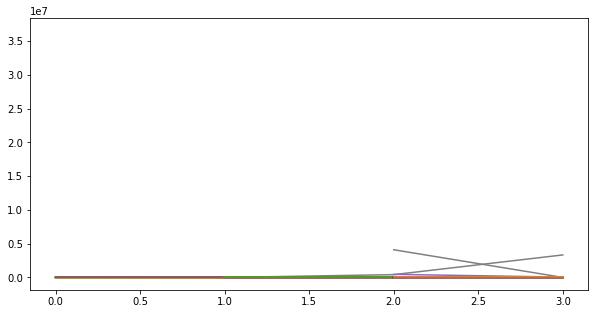

In [13]:
plt.subplots(figsize=(10,5))
for k,i in enumerate(yearlyprice):
    plt.plot(i[1:])
plt.show()

In [14]:
#how many times were the NFTs sold?
print(sum(df['Datetime_updated']>="2021-05-01"))

0


In [ ]:
#active period of an NFT


In [15]:
#what is the price distribtuion of each category?
df.describe()

,Price_Crypto,Price_USD
count,6.071027e+06,6.062744e+06
mean,6.574200e+02,1.463413e+02
std,1.217706e+06,5.488389e+03
min,0.000000e+00,1.514250e-16
25%,2.400000e-02,2.277600e-01
50%,4.100000e-01,1.426470e+00
75%,5.000000e+00,1.385100e+01
max,3.000000e+09,7.501893e+06


In [16]:
for i in df['Category'].unique():
    print(i)
    print(df[df['Category']==i].describe())

Games
       Price_Crypto     Price_USD
count  2.643014e+06  2.641093e+06
mean   4.735259e+01  2.679706e+01
std    2.598335e+03  8.427894e+02
min    0.000000e+00  1.514250e-16
25%    4.200000e-02  8.772300e-02
50%    4.500000e-01  3.503700e-01
75%    2.400000e+00  3.702300e+00
max    2.000000e+06  5.149742e+05
Art
       Price_Crypto     Price_USD
count  1.472515e+06  1.470669e+06
mean   9.073167e+00  4.132374e+02
std    4.943859e+02  1.058270e+04
min    0.000000e+00  2.264600e-16
25%    5.000000e-03  1.090125e+00
50%    1.956634e-02  5.662232e+00
75%    1.288588e-01  3.441477e+01
max    4.300000e+05  7.501893e+06
Other
       Price_Crypto     Price_USD
count  2.727720e+05  2.692390e+05
mean   1.155911e+04  8.155263e+01
std    5.744339e+06  5.712562e+02
min    2.000000e-16  3.831500e-10
25%    6.000000e-02  1.888000e-01
50%    8.900000e-01  1.914250e+00
75%    9.900000e+00  1.920932e+01
max    3.000000e+09  9.984975e+04
Collectible
       Price_Crypto     Price_USD
count  1.605657e+06 

<AxesSubplot:ylabel='total_arrests'>

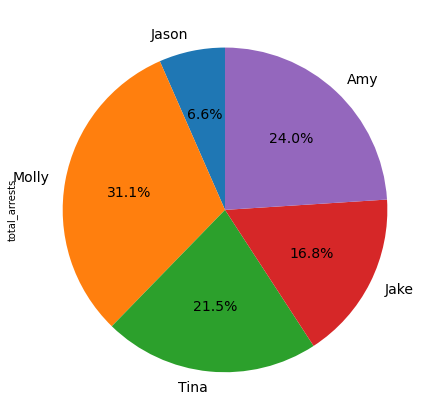

In [36]:
# sample data
raw_data = {'officer_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'jan_arrests': [4, 24, 31, 2, 3],
        'feb_arrests': [25, 94, 57, 62, 70],
        'march_arrests': [5, 43, 23, 23, 51]}
#df = pd.DataFrame(raw_data, columns = ['officer_name', 'jan_arrests', 'feb_arrests', 'march_arrests'])
df['total_arrests'] = df['jan_arrests'] + df['feb_arrests'] + df['march_arrests']

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df.plot(kind='pie', y = 'total_arrests', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df['officer_name'], legend = False, fontsize=14)


([<matplotlib.patches.Wedge at 0x1d3953c5c10>,
 [Text(-1.0028278007214446, -0.45203584161014365, '<=1ETH'),
  Text(1.0652693449432835, 0.2742284134149993, '100>=price>1ETH'),
  Text(0.1877599423061845, 1.0838570957765505, '>100ETH')],
 [Text(-0.546996982211697, -0.2465650045146238, '63.5%'),
  Text(0.5810560063327, 0.1495791345899996, '31.1%'),
  Text(0.10241451398519154, 0.591194779514482, '5.5%')])

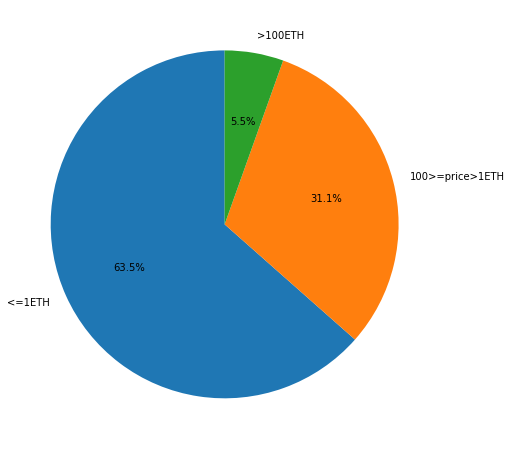

In [44]:
#1ETH=24000HKD today
Price_distribution=[round(sum(df['Price_Crypto']<=1)/len(df),4),round(sum((df['Price_Crypto']<=100)&(df['Price_Crypto']>1))/len(df),4)
                   ,round(sum(df['Price_Crypto']>100)/len(df),4)]
label_pie1=["<=1ETH","100>=price>1ETH",">100ETH"]

plt.figure(figsize=(16,8))
plt.pie(Price_distribution, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=label_pie1)

In [47]:
avprice_2021=[]
for i in yearlyprice:
    avprice_2021.append(i[4])
avprice_2021

[392.52760851323177,
 0.1734978814611723,
 nan,
 55.026694917636505,
 1.9958508591167772,
 0.23142857142857146,
 4.989259528848785,
 0.65,
 76.13989529324937,
 114.05466522655794,
 nan,
 240.03243902439024,
 nan,
 nan,
 15.0,
 481.10539141392866,
 52.833333333333336,
 33.0,
 17.65165037407501,
 100.0,
 43.0087074712,
 nan,
 2.2526233002272726,
 nan,
 53.14034304486357,
 3.1837078651685395,
 88.40581505300446,
 65.0,
 354.8126927445272,
 13.4,
 1390.4120554925883,
 0.7624098404029311,
 386.44325039746144,
 nan,
 34.36643261840533,
 60.977818651350425,
 nan,
 30.0,
 3.325903225806452,
 0.22910000000000064,
 nan,
 nan,
 5.577295454545454,
 nan,
 nan,
 nan,
 nan,
 0.3272727272727273,
 nan,
 18.638238871034485,
 nan,
 28.984336095322103,
 nan,
 42.428995238095226,
 16.59920849652733,
 nan,
 13.82922220449401,
 nan,
 0.3,
 nan,
 nan,
 0.8800000000000001,
 17.652662601524387,
 nan,
 nan,
 0.6777272727272726,
 nan,
 2.6666666666666665,
 81.79796116504853,
 10.008425857080768,
 nan,
 nan,
 nan,

In [54]:
len(list(filter(lambda x: x>=0,avprice_2021)))

4088

In [55]:
len(list(filter(lambda x: x<=1,avprice_2021)))/4088

0.5880626223091977

In [56]:
(len(list(filter(lambda x: x<=100,avprice_2021)))-len(list(filter(lambda x: x<=1,avprice_2021))))/4088

0.3515166340508806

In [57]:
len(list(filter(lambda x: x>100,avprice_2021)))/4088

0.06042074363992172

([<matplotlib.patches.Wedge at 0x1d36f2c13d0>,
 [Text(-1.058171329032828, -0.300455385062239, '<=1ETH'),
  Text(1.0958549862366065, 0.09540361177841963, '100>=price>1ETH'),
  Text(0.20754734704710245, 1.0802426110525865, '>100ETH')],
 [Text(-0.5771843612906334, -0.163884755488494, '58.8%'),
  Text(0.5977390834017853, 0.05203833369731979, '35.2%'),
  Text(0.11320764384387405, 0.5892232423923198, '6.0%')])

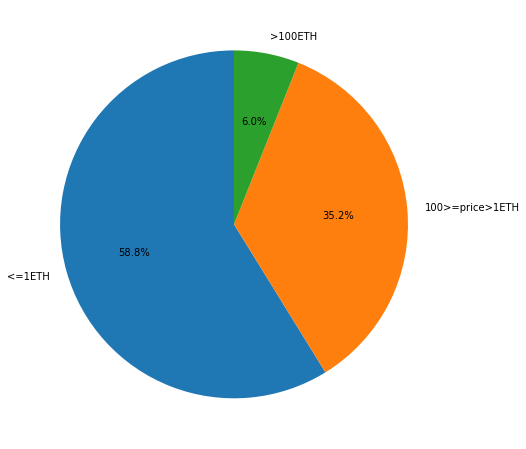

In [58]:
collection_distribution=[len(list(filter(lambda x: x<=1,avprice_2021)))/4088
                        ,(len(list(filter(lambda x: x<=100,avprice_2021)))-len(list(filter(lambda x: x<=1,avprice_2021))))/4088
                   ,len(list(filter(lambda x: x>100,avprice_2021)))/4088]
label_pie1=["<=1ETH","100>=price>1ETH",">100ETH"]

plt.figure(figsize=(16,8))
plt.pie(collection_distribution, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=label_pie1)

In [17]:
#what % is NFTs valued less than 2ETH?
#for i in df['Category'].unique():
    print(i)
    td=df[df['Category']==i]
    print("0-2ETH:",sum((df['Price_Crypto']<=2)&(df['Price_Crypto']>=0))/sum(df['Category']==i))
    print("2-100ETH:",sum((df['Price_Crypto']<=100)&(df['Price_Crypto']>2))/sum(df['Category']==i))
    print(">100ETH:",sum((df['Price_Crypto']>100))/sum(df['Category']==i))

Games
0-2ETH: 0.7425132821846574
2-100ETH: 0.21761027372537564
>100ETH: 0.03987644408996698
Art
0-2ETH: 0.9228150477244714
2-100ETH: 0.06804616591342023
>100ETH: 0.009138786362108365
Other
0-2ETH: 0.6163572507442113
2-100ETH: 0.32995688707052045
>100ETH: 0.05368586218526828
Collectible
0-2ETH: 0.3718396892985239
2-100ETH: 0.5177425813856882
>100ETH: 0.11041772931578787
Metaverse
0-2ETH: 0.43318902474697246
2-100ETH: 0.2631779090855906
>100ETH: 0.30363306616743696
Utility
0-2ETH: 0.8731746579280212
2-100ETH: 0.1137173738070599
>100ETH: 0.013107968264918937


In [60]:
print(">=100ETH")
for i in df['Category'].unique():    
    td=df[df['Category']==i]
    print(i,":",round(sum(td['Price_Crypto']>=100)*100/len(td),2),"%")

>=100ETH
Games : 4.13 %
Art : 0.97 %
Other : 6.05 %
Collectible : 11.47 %
Metaverse : 31.04 %
Utility : 1.32 %


Games


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


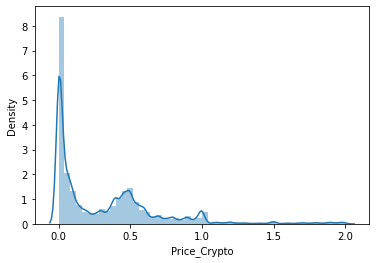

Art


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


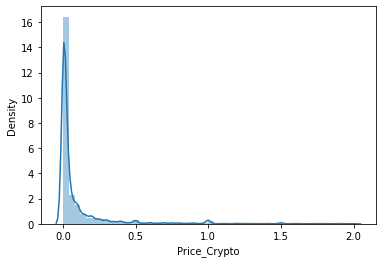

Other


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


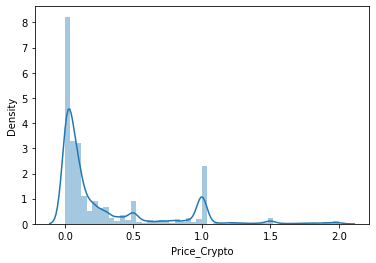

Collectible


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


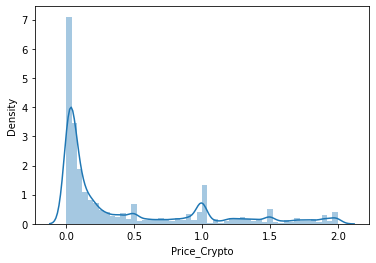

Metaverse


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


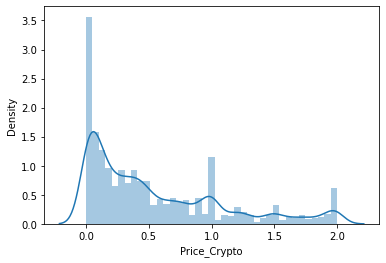

Utility


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


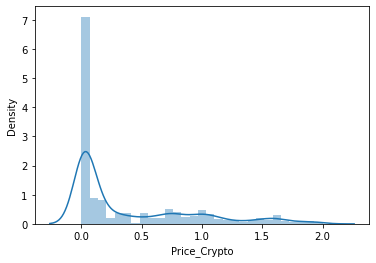

In [18]:
#distribution of the price of NFTs (0-2ETH) in each category
for i in df['Category'].unique():
    print(i)
    sns.distplot(df[(df['Category']==i)&(df['Price_Crypto']<2)]['Price_Crypto'])
    plt.show()

In [19]:
#what are the most expensive NFTs in each category?
famous_organization=[]
for i in df['Category'].unique():
    print(i)
    print(df[df['Category']==i].sort_values('Price_USD',ascending=False)[['Price_USD','Unique_id_collection']].iloc[:5])
    famous_organization+=list(df[df['Category']==i].sort_values('Price_USD',ascending=False)['Collection_cleaned'].iloc[:10])
#findings:
#Some are famous organizations/companies/websites. Some are artists.
#Maybe it's because they are famous, the tokens are promoted more widely and become hot topic on the internet?
#Let's answer the question.

Games
            Price_USD                               Unique_id_collection
6014831  514974.25000                    ('Gods-unchained', '219569265')
6014823  514974.25000                    ('Gods-unchained', '219569265')
6015352  513974.30000                    ('Gods-unchained', '219569265')
6015327  513974.30000                    ('Gods-unchained', '219569265')
5831025  320020.96305  ('F1-delta-time', '578978115466027161002887076...
Art
           Price_USD     Unique_id_collection
5847729  7501893.000  ('Cryptopunks', '3100')
5855358  7501893.000  ('Cryptopunks', '7804')
5943437  1723131.135  ('Cryptopunks', '3011')
5729934  1643615.000      ('Superrare', '14')
5634672  1546096.000  ('Cryptopunks', '6965')
Other
            Price_USD                               Unique_id_collection
5965696  99849.750000                               ('Fairum-nft', '13')
6053336  60328.225029                                 ('Gandinsky', '1')
5762803  53213.985000                           ('T

In [65]:
df[df["Unique_id_collection"]=="('Gods-unchained', '219569265')"]["Image_url_1"]

6014823    https://lh3.googleusercontent.com/AVK1slRC9TD-...
6014831    https://lh3.googleusercontent.com/AVK1slRC9TD-...
6015327    https://lh3.googleusercontent.com/AVK1slRC9TD-...
6015352    https://lh3.googleusercontent.com/AVK1slRC9TD-...
Name: Image_url_1, dtype: object

In [67]:
df[df["Collection_cleaned"]=='F1-delta-time']["Image_url_1"]


Series([], Name: Image_url_1, dtype: object)

In [82]:
dataset2=df[df["Category"]=="Art"].sort_values('Price_Crypto',ascending=False)[["Price_Crypto","Unique_id_collection","Image_url_1","Image_url_2","Image_url_3"]]
dataset2

,Price_Crypto,Unique_id_collection,Image_url_1,Image_url_2,Image_url_3
5606912,4.300000e+05,"('Hashmasks', '12247')",https://lh3.googleusercontent.com/R7kQx60MAPi2...,https://hashmasksstore.blob.core.windows.net/h...,https://lh3.googleusercontent.com/R7kQx60MAPi2...
5534663,2.350000e+05,"('Kingtokennft-knight', '13')",https://lh3.googleusercontent.com/E9gfDH7ZIIrX...,https://i.ibb.co/k1Qn3w5/NFT-02.png,https://lh3.googleusercontent.com/E9gfDH7ZIIrX...
5828617,1.600000e+05,"('Beeple-everydays', '100010183')",https://lh3.googleusercontent.com/a8cbY6f2DciX...,https://res.cloudinary.com/nifty-gateway/video...,https://lh3.googleusercontent.com/a8cbY6f2DciX...
5739723,1.500000e+05,"('Ethercats', '5965695505402889437624748240494...",https://lh3.googleusercontent.com/aR9bewcE0P6p...,NaN,https://lh3.googleusercontent.com/aR9bewcE0P6p...
5611976,1.250000e+05,"('Beeple-everydays', '100030139')",https://lh3.googleusercontent.com/c93zvqj_K9t6...,https://res.cloudinary.com/nifty-gateway/video...,https://lh3.googleusercontent.com/c93zvqj_K9t6...
...,...,...,...,...,...
5538987,1.000000e-18,"('Rarible', '104166')",https://lh3.googleusercontent.com/oPt14sSEc9En...,https://ipfs.io/ipfs/QmUUiHgHpGRs7UukSUQ7jvteR...,https://lh3.googleusercontent.com/oPt14sSEc9En...
5880042,1.000000e-18,"('Rarible', '316591')",https://lh3.googleusercontent.com/g2Bx_R99j-G5...,https://ipfs.io/ipfs/QmTeFhmerv519qoT1UaYXmfwX...,https://lh3.googleusercontent.com/g2Bx_R99j-G5...
5206152,1.000000e-18,"('Rarible', '545')",https://lh3.googleusercontent.com/OyS2_vgOC0Ot...,https://ipfs.io/ipfs/QmTBpUiWWUDNfMq2LnBxWittC...,https://lh3.googleusercontent.com/OyS2_vgOC0Ot...
5206155,1.000000e-18,"('Rarible', '545')",https://lh3.googleusercontent.com/OyS2_vgOC0Ot...,https://ipfs.io/ipfs/QmTBpUiWWUDNfMq2LnBxWittC...,https://lh3.googleusercontent.com/OyS2_vgOC0Ot...


In [83]:
dataset2["Image_url_2"][5606912]

'https://hashmasksstore.blob.core.windows.net/hashmasks/6004.jpg'

In [66]:
df.columns

Index(['ID_token', 'Transaction_hash', 'Seller_address', 'Buyer_address',
       'Image_url_1', 'Image_url_2', 'Image_url_3', 'Image_url_4',
       'Price_Crypto', 'Crypto', 'Price_USD', 'Name', 'Description',
       'Collection', 'Market', 'Datetime_updated', 'Permanent_link',
       'Unique_id_collection', 'Collection_cleaned', 'Category'],
      dtype='object')

In [20]:
#Find the average price of the tokens sold by these famous organizations.
famous_organization=list(set(famous_organization))
famous_organization

['Trevorjonesart',
 'Elliotrade',
 'Superrare',
 'Chadslimited',
 'Auston',
 'Somniumspace',
 'Gandinsky',
 'Meme',
 'Axie',
 'World',
 'Mirandu',
 'Decentraland',
 'Chainsaw',
 'Miscellanea',
 'Unstoppable',
 'Cryptopunk',
 'Godsunchained',
 'Brysondechambeaulimitededitionnft',
 'Ladyjdayxflipkick',
 'Fairumnft',
 'Robgronkowskichampionshipnft',
 'Auction',
 'Ethercardsfonder',
 'Mint',
 'Bullrunbabestoken',
 'Vhilsartwork',
 'Superfarm',
 'Yinsurenft',
 'Fdeltatime']

In [21]:
for i in famous_organization:
    print(i)
    print(df[df['Collection_cleaned']==i].describe(),"\n")

Trevorjonesart
       Price_Crypto     Price_USD
count    219.000000    219.000000
mean      96.969668   3279.636161
std     1133.065004   5104.130916
min        0.450000    248.260000
25%        0.989500   1407.397569
50%        1.500000   2273.551500
75%        2.100000   3581.160000
max    16666.000000  53213.985000 

Elliotrade
       Price_Crypto      Price_USD
count   1330.000000    1330.000000
mean       2.537583    4559.153613
std        6.120583   10920.233975
min        0.250000     437.077445
25%        0.250000     449.475683
50%        0.500000     898.951366
75%        2.500000    4443.795820
max      100.000000  192894.000000 

Superrare
       Price_Crypto     Price_USD
count  1.646900e+04  1.646900e+04
mean   2.165533e+00  2.138846e+03
std    1.088964e+01  1.789914e+04
min    1.000000e-07  2.563600e-05
25%    2.500000e-01  6.409000e+01
50%    6.500000e-01  2.278588e+02
75%    1.666000e+00  1.000961e+03
max    1.000000e+03  1.643615e+06 

Chadslimited
       Price_Crypt

       Price_Crypto     Price_USD
count    152.000000    152.000000
mean       7.620002  15872.010268
std        7.327593  15666.172770
min        1.250000   2583.581250
25%        4.000000   8157.635000
50%        5.336544  11021.701922
75%        9.000000  18182.354063
max       42.000000  88130.280000 

Yinsurenft
       Price_Crypto      Price_USD
count    308.000000     308.000000
mean      17.038068    6392.687517
std       31.807168   11931.367369
min        0.000100       0.038039
25%        1.000000     374.945000
50%        5.000000    1883.925000
75%       20.000000    7535.700000
max      350.000000  130343.500000 

Fdeltatime
       Price_Crypto      Price_USD
count  5.617000e+03    5616.000000
mean   2.229595e+03     522.483428
std    4.571773e+04    7260.456959
min    1.000000e-05       0.004003
25%    2.400000e-02       7.614750
50%    6.000000e-02      30.314725
75%    2.900000e-01     147.651875
max    2.000000e+06  320020.963050 



Trevorjonesart


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


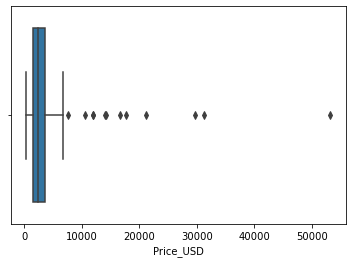

Elliotrade


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


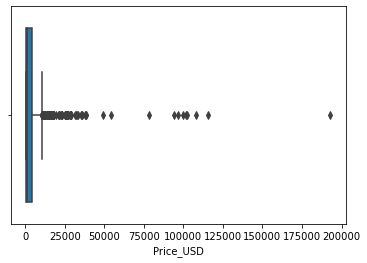

Superrare


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


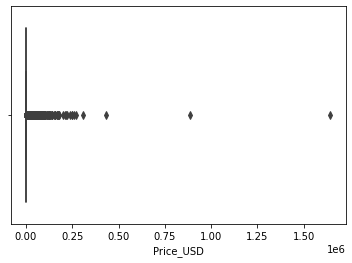

Chadslimited


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


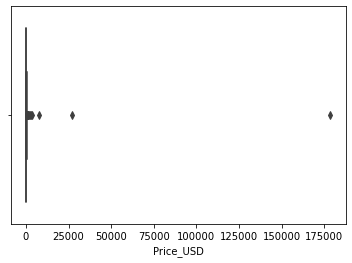

Auston


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


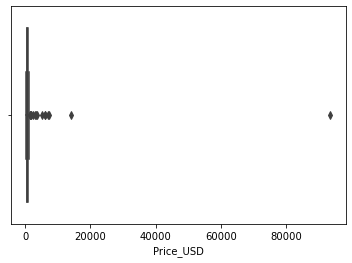

Somniumspace


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


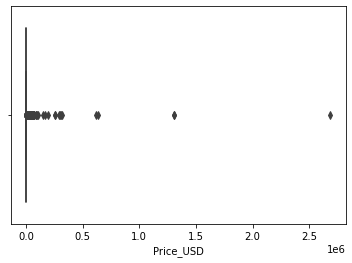

Gandinsky


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


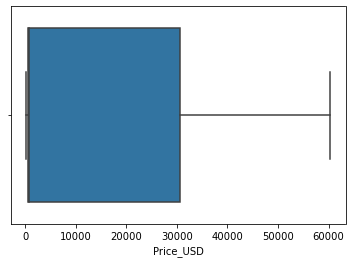

Meme


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


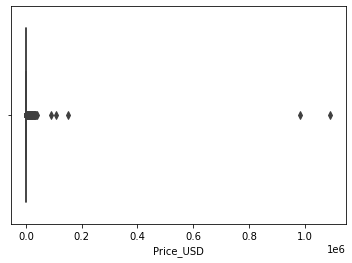

Axie


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


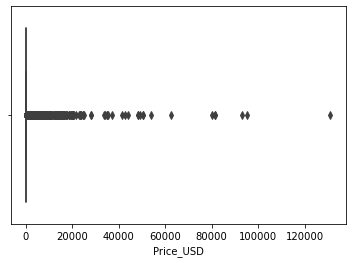

World


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


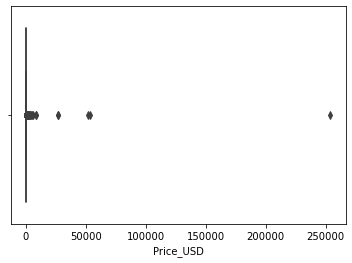

Mirandu


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


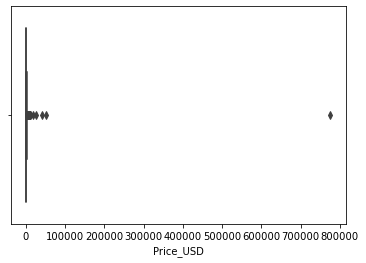

Decentraland


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


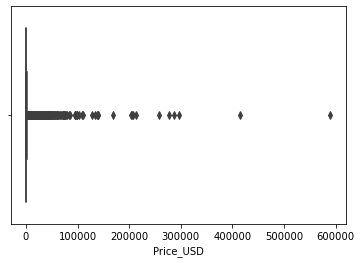

Chainsaw


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


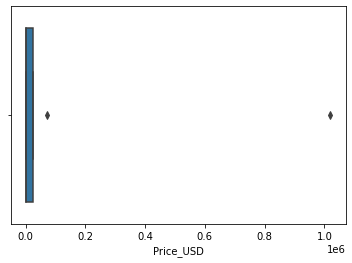

Miscellanea


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


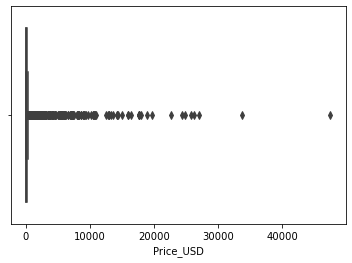

Unstoppable


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


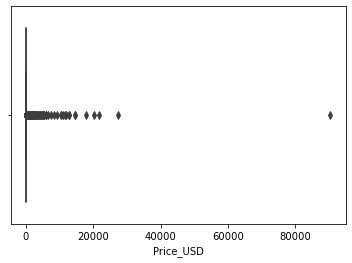

Cryptopunk


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


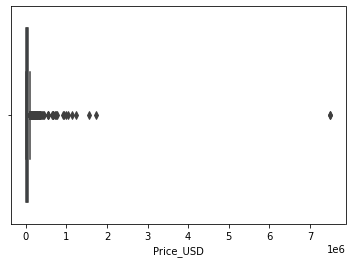

Godsunchained


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


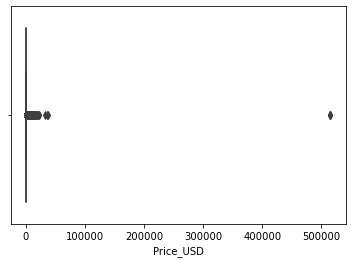

Brysondechambeaulimitededitionnft


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


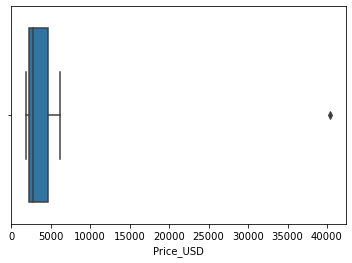

Ladyjdayxflipkick


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


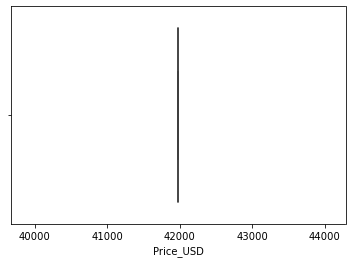

Fairumnft


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


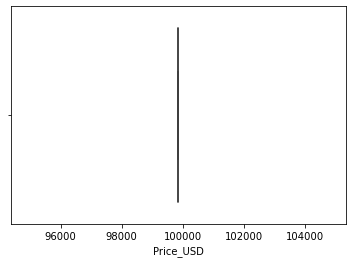

Robgronkowskichampionshipnft


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


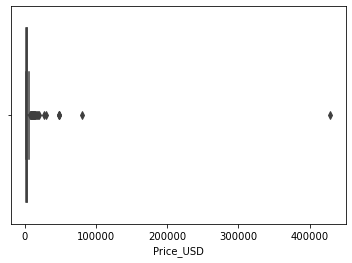

Auction


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


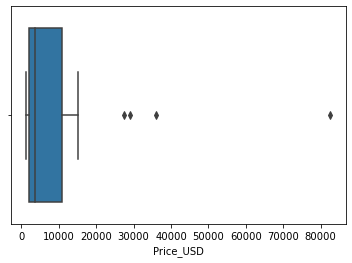

Ethercardsfonder


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


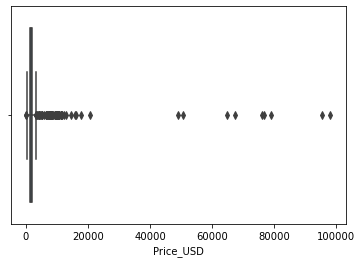

Mint


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


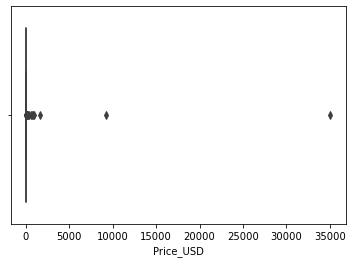

Bullrunbabestoken


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


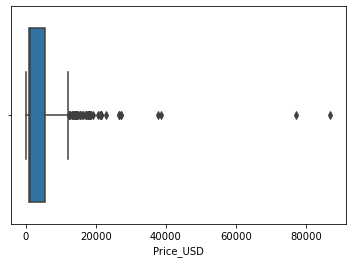

Vhilsartwork


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


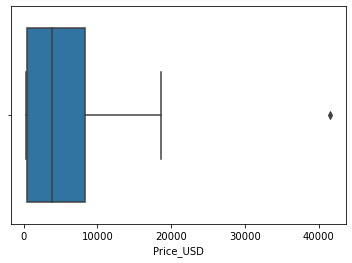

Superfarm


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


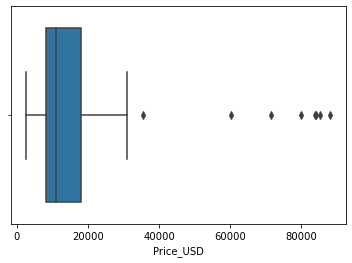

Yinsurenft


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


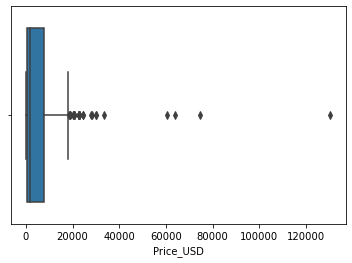

Fdeltatime


C:\Users\Kent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


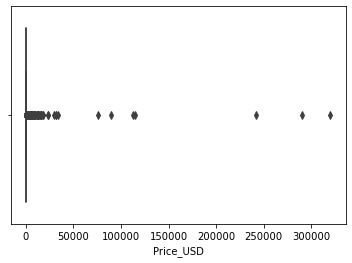

In [22]:
for i in famous_organization:
    print(i)
    sns.boxplot(df[df['Collection_cleaned']==i]['Price_USD'])
    plt.show()


In [23]:
#Let's define NFTs valued more than 100ETH as expensive according to the previous findings.
#In all the collections which contain at least an expensive NFT, how many % of the trades of the collection are expensive?
for index,i in enumerate(list(df[df['Price_Crypto']>100]['Collection_cleaned'].unique())):
    print(index+1,".",i,":",round(sum(df[df['Collection_cleaned']==i]['Price_Crypto']>100)*100/sum(df['Collection_cleaned']==i),2),"%",sum(df['Collection_cleaned']==i),"trades."
         ,"max:",df[df['Collection_cleaned']==i].sort_values('Price_Crypto',ascending=False)['Price_Crypto'].iloc[0],"ETH")

1 . Cryptokittie : 0.01 % 1092177 trades. max: 10000.0 ETH
2 . Anyo.b : 12.52 % 1502 trades. max: 1999.0 ETH
3 . Official : 18.0 % 119900 trades. max: 400000.0 ETH
4 . Maskofsatosh : 98.81 % 84 trades. max: 35000.0 ETH
5 . Badcrypto : 16.75 % 191 trades. max: 1362.12534059 ETH
6 . Krwingerart : 79.27 % 275 trades. max: 4255.0 ETH
7 . All : 21.77 % 317 trades. max: 2000.0 ETH
8 . Tonestudio : 12.5 % 24 trades. max: 400.0 ETH
9 . Cheesmansart : 33.91 % 637 trades. max: 50000.0 ETH
10 . Linuxalllday : 100.0 % 2 trades. max: 500.0 ETH
11 . Nifty : 16.3 % 10132 trades. max: 100000.0 ETH
12 . Tonetonenft : 20.11 % 174 trades. max: 5274.2616033700015 ETH
13 . Organicpics : 33.33 % 3 trades. max: 191.57088122 ETH
14 . Dprintednft : 4.0 % 25 trades. max: 426.78571428 ETH
15 . Upland : 7.48 % 49379 trades. max: 5750.0 ETH
16 . Pepe : 6.68 % 51517 trades. max: 900000.0 ETH
17 . Stickypeople : 45.0 % 40 trades. max: 500.0 ETH
18 . Splint : 2.81 % 17003 trades. max: 12000.0 ETH
19 . Gpk.topp : 14.9

153 . Smart : 14.89 % 94 trades. max: 350.0 ETH
154 . Missteennft : 18.6 % 43 trades. max: 586.5102639199998 ETH
155 . Landelephant : 3.03 % 33 trades. max: 200.0 ETH
156 . Cryptopuzzle : 26.2 % 187 trades. max: 4500.0 ETH
157 . Sewellsewell : 2.38 % 42 trades. max: 500.0 ETH
158 . Deadmau : 24.65 % 10669 trades. max: 246913.58024691 ETH
159 . Bratz : 63.43 % 402 trades. max: 50000.0 ETH
160 . Hodlgod : 45.52 % 10368 trades. max: 20000.0 ETH
161 . Sketch : 8.76 % 194 trades. max: 7777.777770000001 ETH
162 . Ultra : 17.57 % 40220 trades. max: 111111.11 ETH
163 . New : 7.12 % 1109 trades. max: 1750.0 ETH
164 . Dust : 97.21 % 646 trades. max: 24813.895781630006 ETH
165 . Wild : 4.11 % 73 trades. max: 1111.0 ETH
166 . Wpcwrarecard : 53.04 % 1416 trades. max: 10000.0 ETH
167 . Wchdesign : 0.35 % 868 trades. max: 1750.0 ETH
168 . Ogsworldnft : 100.0 % 1 trades. max: 999.0 ETH
169 . Derpycat : 1.75 % 399 trades. max: 400.0 ETH
170 . Nonsequitur : 0.69 % 288 trades. max: 310.0 ETH
171 . Crypto

304 . Cryptoshark : 2.54 % 512 trades. max: 400.0 ETH
305 . Crpcreature : 18.25 % 252 trades. max: 300.0 ETH
306 . Roardigiart : 3.93 % 382 trades. max: 500.0 ETH
307 . Cric.owen : 3.95 % 911 trades. max: 800.0 ETH
308 . Dedhedartist : 9.4 % 1542 trades. max: 1000.0 ETH
309 . Fractionnft : 100.0 % 12 trades. max: 934.23019431 ETH
310 . Raccnbrand : 6.41 % 468 trades. max: 1312.0 ETH
311 . Misfitspland : 7.05 % 241 trades. max: 800.0 ETH
312 . Writer : 74.62 % 729 trades. max: 6000.0 ETH
313 . Meta : 2.69 % 5456 trades. max: 3500.0 ETH
314 . Yogademon : 0.62 % 322 trades. max: 250.0 ETH
315 . Marisolvenga : 88.89 % 9 trades. max: 650.0 ETH
316 . Cobracoral : 7.69 % 13 trades. max: 150.0 ETH
317 . Japanmechadv : 2.78 % 36 trades. max: 105.0 ETH
318 . Motoartwork : 100.0 % 1 trades. max: 1000.0 ETH
319 . Gnome : 1.4 % 6976 trades. max: 950.0 ETH
320 . Creekdrops : 6.98 % 358 trades. max: 2420.0 ETH
321 . Kacreations : 0.66 % 151 trades. max: 210.0 ETH
322 . Classic : 22.22 % 18 trades. ma

455 . Natsumameart : 80.0 % 5 trades. max: 222.0 ETH
456 . Fraternidade : 11.11 % 9 trades. max: 140.0 ETH
457 . Exitimbowax : 20.0 % 5 trades. max: 106.0 ETH
458 . Rpanetverif : 100.0 % 3 trades. max: 1400.0 ETH
459 . Kryptogalaxy : 0.45 % 222 trades. max: 125.0 ETH
460 . Galametry : 1.37 % 73 trades. max: 200.0 ETH
461 . Mlllbtpps : 100.0 % 1 trades. max: 119.15020945 ETH
462 . Chaincreatr : 100.0 % 8 trades. max: 205.0 ETH
463 . Precognition : 6.45 % 31 trades. max: 1000.0 ETH
464 . Melaniesnft : 100.0 % 1 trades. max: 150.0 ETH
465 . Missdchamps : 100.0 % 1 trades. max: 200.0 ETH
466 . Mlllbttpp : 33.33 % 3 trades. max: 181.00851342 ETH
467 . Calidadnft : 100.0 % 1 trades. max: 125.0 ETH
468 . Mllbttpps : 28.57 % 7 trades. max: 485.08424182 ETH
469 . Rplaneeettgg : 100.0 % 1 trades. max: 100.8 ETH
470 . Musumezmemez : 100.0 % 2 trades. max: 456.0 ETH
471 . Myrenderhead : 0.42 % 240 trades. max: 149.0 ETH
472 . Drawlloween : 4.35 % 23 trades. max: 110.0 ETH
473 . Rplanettpack : 100.

605 . King : 0.39 % 6617 trades. max: 235000.0 ETH
606 . Autoglyph : 1.71 % 351 trades. max: 2500.0 ETH
607 . Atm : 60.0 % 5 trades. max: 3500.0 ETH
608 . Aavegotchi : 0.42 % 2388 trades. max: 2200.0 ETH
609 . Bishop : 1.18 % 85 trades. max: 600.0 ETH
610 . Tripstore : 100.0 % 3 trades. max: 1500.0 ETH
611 . Cryptoarttoken : 50.0 % 2 trades. max: 5000.0 ETH
612 . Ppethsnftcollection : 1.83 % 109 trades. max: 300.0 ETH
613 . Dkleine : 2.86 % 35 trades. max: 150.0 ETH
614 . Jgncollection : 23.08 % 13 trades. max: 2000.0 ETH
615 . Cryptopunk : 0.77 % 8496 trades. max: 4200.0 ETH
616 . Normancomic : 33.33 % 6 trades. max: 1000.0 ETH
617 . Luchopoletti : 10.0 % 10 trades. max: 980.0 ETH
618 . Cryptovoxel : 0.05 % 10065 trades. max: 1800.0 ETH
619 . Rollerdance : 100.0 % 2 trades. max: 5000.0 ETH
620 . Decentralized : 28.13 % 711 trades. max: 7164350.0 ETH
621 . Dartco : 66.67 % 3 trades. max: 1500.0 ETH
622 . Egg : 0.71 % 280 trades. max: 150.0 ETH
623 . Deltahubcapitalv : 25.0 % 100 trades

759 . Destijlnft : 0.76 % 131 trades. max: 1000.0 ETH
760 . Nuncvitaeejthek : 100.0 % 1 trades. max: 230.0 ETH
761 . Khabibnurma : 99.47 % 188 trades. max: 29000.0 ETH
762 . Jacob : 2.38 % 42 trades. max: 15000.0 ETH
763 . Fabricatedfairytalesbyfewociosxparrottismx : 3.85 % 26 trades. max: 2002.0 ETH
764 . Auction : 95.83 % 24 trades. max: 85000.0 ETH
765 . Doge : 0.39 % 254 trades. max: 6000.0 ETH
766 . Stonedelon : 100.0 % 70 trades. max: 969.69 ETH
767 . Fairumnft : 100.0 % 1 trades. max: 97500.0 ETH
768 . Chainface : 0.18 % 2177 trades. max: 345.0 ETH
769 . Shittyemoji : 3.8 % 79 trades. max: 570.0 ETH
770 . Polkacityasset : 4.17 % 24 trades. max: 17310.0 ETH
771 . Jatinpathisdoriginal : 100.0 % 1 trades. max: 1000.0 ETH
772 . Fmgallery : 5.56 % 108 trades. max: 1600.0 ETH
773 . Chainsaw : 8.33 % 12 trades. max: 420.0 ETH
774 . Initiaeventconceptsstore : 100.0 % 1 trades. max: 4644.843 ETH
775 . Wweofficial : 9.09 % 22 trades. max: 225.0 ETH
776 . Ethfighter : 2.94 % 34 trades. max

In [24]:
#find the mean price of the collection
for i in df['Category'].unique():
    print(i)
    result_table=df[df['Category']==i].groupby('Collection_cleaned').mean().sort_values('Price_Crypto',ascending=False).iloc[:5]
    print(result_table)
    print(result_table.index)

Games
                    Price_Crypto    Price_USD
Collection_cleaned                           
Lord                 6221.221363    35.885652
Cryptobeastie        5148.908711    11.538829
Fdeltatime           2229.595301   522.483428
Cryptomotor          1301.129477  1504.963644
Chainbreaker         1199.559895    96.907548
Index(['Lord', 'Cryptobeastie', 'Fdeltatime', 'Cryptomotor', 'Chainbreaker'], dtype='object', name='Collection_cleaned')
Art
                    Price_Crypto     Price_USD
Collection_cleaned                            
Majinsmenarug        5009.236400  21562.214289
Squiggly             1757.124921   3561.479286
Mark                 1406.480469   1616.697973
Ethercat              739.327235    759.095252
Hackata               377.148572   5167.250449
Index(['Majinsmenarug', 'Squiggly', 'Mark', 'Ethercat', 'Hackata'], dtype='object', name='Collection_cleaned')
Other
                      Price_Crypto     Price_USD
Collection_cleaned                              
Com

In [14]:
sum(df['Price_Crypto']<1000)/len(df)

0.9863494501812063

In [29]:
c=0
for i in range(1,101):
    ss=sum((df['Price_Crypto']<=i)&(df['Price_Crypto']>i-1))
    kk1=100*ss/len(df)
    c+=kk1
    print("from",i-1,"to",i,":",round(kk1,2),"% (",ss,")")
print("total:",c,"%")

from 0 to 1 : 36.73 % ( 716859 )
from 1 to 2 : 7.55 % ( 147276 )
from 2 to 3 : 6.1 % ( 119140 )
from 3 to 4 : 5.04 % ( 98436 )
from 4 to 5 : 4.71 % ( 91981 )
from 5 to 6 : 2.34 % ( 45618 )
from 6 to 7 : 2.08 % ( 40608 )
from 7 to 8 : 1.76 % ( 34414 )
from 8 to 9 : 1.62 % ( 31669 )
from 9 to 10 : 2.41 % ( 46946 )
from 10 to 11 : 0.86 % ( 16688 )
from 11 to 12 : 1.05 % ( 20422 )
from 12 to 13 : 0.67 % ( 13100 )
from 13 to 14 : 0.8 % ( 15651 )
from 14 to 15 : 1.5 % ( 29232 )
from 15 to 16 : 0.43 % ( 8369 )
from 16 to 17 : 0.52 % ( 10193 )
from 17 to 18 : 0.64 % ( 12480 )
from 18 to 19 : 0.68 % ( 13337 )
from 19 to 20 : 1.4 % ( 27357 )
from 20 to 21 : 0.23 % ( 4580 )
from 21 to 22 : 0.41 % ( 7916 )
from 22 to 23 : 0.34 % ( 6727 )
from 23 to 24 : 0.39 % ( 7595 )
from 24 to 25 : 0.94 % ( 18300 )
from 25 to 26 : 0.16 % ( 3182 )
from 26 to 27 : 0.21 % ( 4078 )
from 27 to 28 : 0.26 % ( 5101 )
from 28 to 29 : 0.32 % ( 6330 )
from 29 to 30 : 0.7 % ( 13759 )
from 30 to 31 : 0.1 % ( 1916 )
from 31 

In [19]:
c=0
interval=0.05
total=len((df['Price_Crypto']<=upperbound)&(df['Price_Crypto']>lowerbound))

for i in [j*interval for j in range(1,number+1)]:
    ss=sum((df['Price_Crypto']<=i)&(df['Price_Crypto']>i-j))
    kk1=100*ss/total
    c+=kk1
    print("from",i-j,"to",i,":",round(kk1,2),"% (",ss,")")
print("total:",c,"%")

from 0.0 to 0.05 : 37.45 % ( 1139799 )
from 0.05 to 0.1 : 6.72 % ( 204643 )
from 0.10000000000000002 to 0.15000000000000002 : 2.98 % ( 90685 )
from 0.15000000000000002 to 0.2 : 2.4 % ( 73060 )
from 0.2 to 0.25 : 1.37 % ( 41810 )
from 0.25000000000000006 to 0.30000000000000004 : 1.08 % ( 32825 )
from 0.30000000000000004 to 0.35000000000000003 : 0.64 % ( 19370 )
from 0.35000000000000003 to 0.4 : 0.83 % ( 25293 )
from 0.4 to 0.45 : 0.4 % ( 12072 )
from 0.45 to 0.5 : 1.06 % ( 32150 )
from 0.5 to 0.55 : 0.2 % ( 6101 )
from 0.55 to 0.6000000000000001 : 0.39 % ( 11822 )
from 0.6 to 0.65 : 0.19 % ( 5754 )
from 0.65 to 0.7000000000000001 : 0.35 % ( 10682 )
from 0.7 to 0.75 : 0.24 % ( 7218 )
from 0.75 to 0.8 : 0.34 % ( 10345 )
from 0.8 to 0.8500000000000001 : 0.17 % ( 5140 )
from 0.85 to 0.9 : 0.4 % ( 12311 )
from 0.9 to 0.9500000000000001 : 0.16 % ( 4877 )
from 0.95 to 1.0 : 1.8 % ( 54837 )
total: 59.17079776025561 %


In [12]:
np.linspace(0,1,num=21)#[1:]

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [18]:
np.linspace(0,1,num=21)[3]#-(1-0)/20

0.15000000000000002

In [26]:
for i in [j*100 for j in range(1,10)]:
    print("from",i-100,"to",i,":",round(100*sum((df['Price_Crypto']<=i)&(df['Price_Crypto']>i-100))/len(df),2),"%")

from 0 to 100 : 90.82 %
from 100 to 200 : 3.33 %
from 200 to 300 : 1.98 %
from 300 to 400 : 0.84 %
from 400 to 500 : 0.63 %
from 500 to 600 : 0.27 %
from 600 to 700 : 0.21 %
from 700 to 800 : 0.24 %
from 800 to 900 : 0.17 %


In [32]:
len(df['Collection_cleaned'].unique())

220

In [44]:
for i in df['Collection_cleaned'].unique():
    kk2=df[df['Collection_cleaned']==i]['Price_Crypto']
    print(i,":",kk2.median(),round(kk2.mean(),2),round(kk2.std(),2))

median,mean,std
Gpk.topp : 6.89 80.88 915.39
Official : 12.0 132.66 1585.21
Nifty : 20.0 229.27 1804.97
Pepe : 4.5 68.94 4046.82
Upland : 2.9651912300000003 30.59 110.61
Boxmazeonwax : 1.25 18.33 251.81
Avatar : 0.1661582594329437 28.7 527.42
Uplift : 40.0 496.2 2075.6
Maxo : 0.35 15.8 293.12
Wax : 1.5 9.47 27.65
Open : 0.4 2.0 7.55
Crptomonkey : 13.5 72.73 693.14
Twobontanica : 15.0 31.07 145.42
Art : 0.39 8.69 158.67
Fundotxcutie : 0.31 22.48 1333.39
Real : 0.55 38.8 162.73
Nft : 0.35 88.47 2024.66
Burn : 1.0 3.8 25.63
Element : 0.4 9.9 53.48
Ai : 0.15 8.48 66.85
Mutant : 5.5 55.76 778.44
Star : 2.0 39.08 532.98
Bitcoin : 97.9 1307.71 15265.23
Monster : 8.0 55.64 230.28
Day : 0.08 48.01 472.53
Block : 0.003 8.27 356.41
Tribalbk : 119.0 320.33 1373.75
Atari : 10.0 94.16 1143.57
Ultra : 19.0 136.23 836.62
Pix : 0.2 11.0 294.24
Digital : 1.5 22.81 108.7
Deadmau : 9.99 216.99 2751.45
Hodlgod : 90.0 217.51 566.29
Rare : 0.25 25.92 192.3
Flower : 0.006 8.22 97.54
Byron : 3.0 12.1 86.32
Exi

<AxesSubplot:xlabel='Price_Crypto', ylabel='Collection_cleaned'>

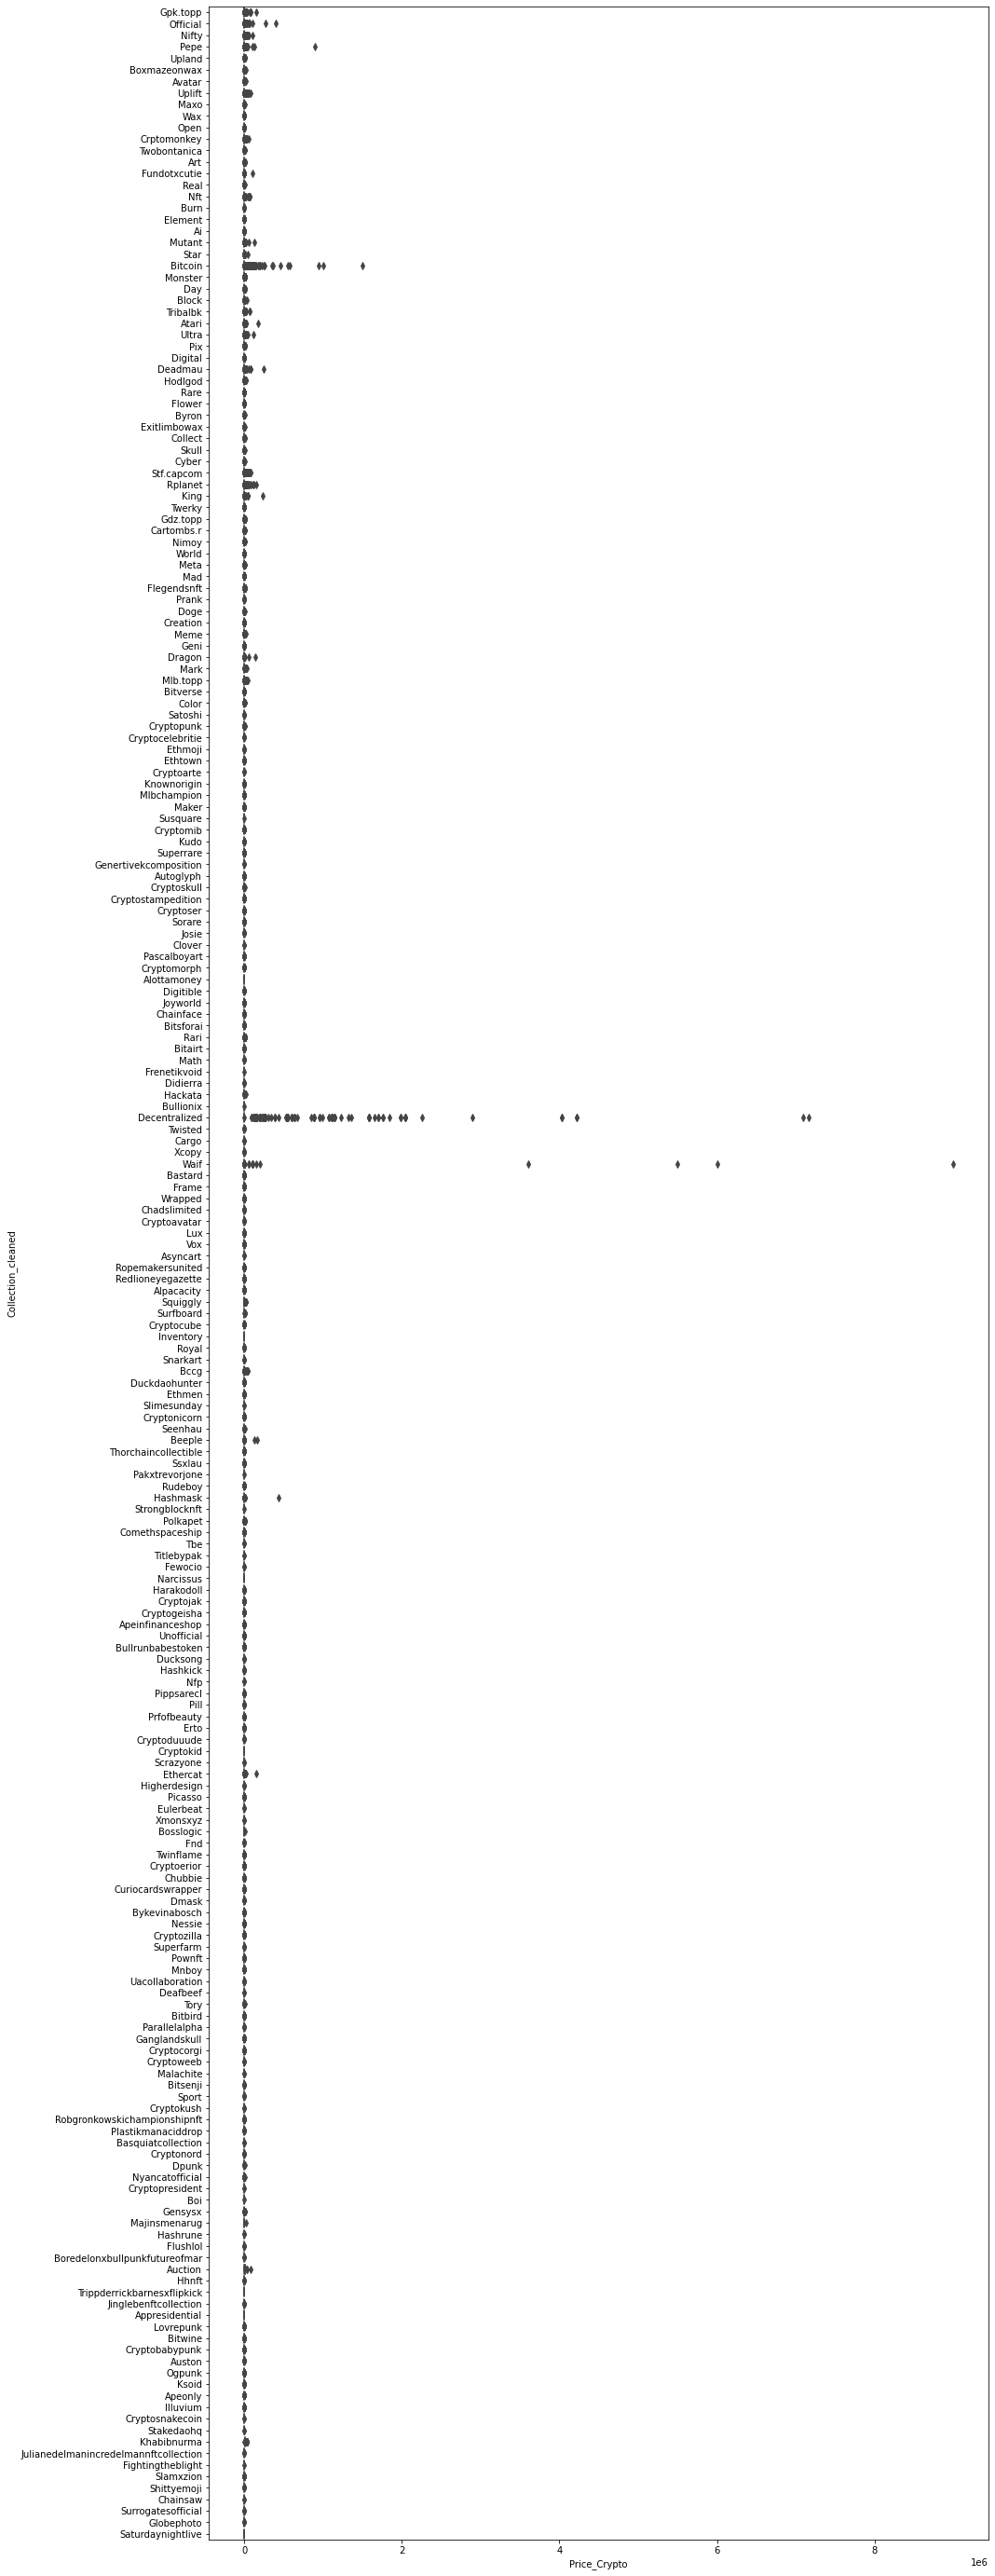

In [53]:
fig,ax=plt.subplots(figsize=(15,50))
sns.boxplot(data=df,x='Price_Crypto',y='Collection_cleaned')

In [54]:
df=df[df['Price_Crypto']<=100]

In [65]:
df.columns

Index(['Unnamed: 0', 'Transaction_hash', 'Seller_address', 'Buyer_address',
       'Image_url_1', 'Image_url_2', 'Image_url_3', 'Image_url_4',
       'Price_Crypto', 'Crypto', 'Price_USD', 'Name', 'Description',
       'Collection', 'Market', 'Datetime_updated', 'Datetime_updated_seconds',
       'Permanent_link', 'Unique_id_collection', 'Collection_cleaned',
       'Category'],
      dtype='object')

In [56]:
len(df['Unique_id_collection'].unique())

1394867

In [72]:
kk3=df[df['Unique_id_collection']==df['Unique_id_collection'].unique()[1]].iloc[0]
for i in [1,2,3,4]:
    print(kk3[f'Image_url_{i}'])

QmYkMDkB1d8ToHNHnFwpeESF3Npfid671NrfbPKiKG8e25/base/12a.jpg
https://ipfs.io/ipfs/QmYkMDkB1d8ToHNHnFwpeESF3Npfid671NrfbPKiKG8e25/base/12a.jpg
https://ipfs.atomichub.io/ipfs/QmYkMDkB1d8ToHNHnFwpeESF3Npfid671NrfbPKiKG8e25/base/12a.jpg
https://wax.atomichub.io/ipfs/QmYkMDkB1d8ToHNHnFwpeESF3Npfid671NrfbPKiKG8e25/base/12a.jpg


In [76]:
df[df['Unique_id_collection']==df['Unique_id_collection'].unique()[1]].index[0]

725401

In [77]:
df[df['Unique_id_collection']==df['Unique_id_collection'].unique()[1]]

,Unnamed: 0,Transaction_hash,Seller_address,Buyer_address,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
725401,961634,NaN,5fdau.wam,3nfqu.wam,QmYkMDkB1d8ToHNHnFwpeESF3Npfid671NrfbPKiKG8e25...,https://ipfs.io/ipfs/QmYkMDkB1d8ToHNHnFwpeESF3...,https://ipfs.atomichub.io/ipfs/QmYkMDkB1d8ToHN...,https://wax.atomichub.io/ipfs/QmYkMDkB1d8ToHNH...,8.0,WAX,...,NaN,NaN,gpk.topps,Atomic,2020-07-31 00:00:00,2020-07-31 20:45:16,NaN,"('gpk.topps', '1099511651538')",Gpk.topp,Collectible


In [78]:
df[df['Unique_id_collection']==df['Unique_id_collection'].unique()[1]].iloc[0]

Unnamed: 0                                                             961634
Transaction_hash                                                          NaN
Seller_address                                                      5fdau.wam
Buyer_address                                                       3nfqu.wam
Image_url_1                 QmYkMDkB1d8ToHNHnFwpeESF3Npfid671NrfbPKiKG8e25...
Image_url_2                 https://ipfs.io/ipfs/QmYkMDkB1d8ToHNHnFwpeESF3...
Image_url_3                 https://ipfs.atomichub.io/ipfs/QmYkMDkB1d8ToHN...
Image_url_4                 https://wax.atomichub.io/ipfs/QmYkMDkB1d8ToHNH...
Price_Crypto                                                              8.0
Crypto                                                                    WAX
Price_USD                                                             0.45188
Name                                                                      NaN
Description                                                     

In [79]:
#1st version of download
failed=[]
for i in df['Unique_id_collection'].unique():
    kk4=df[df['Unique_id_collection']==i]
    index=kk4.index[0]
    for j in [1,2,3,4]:
        url=kk4.iloc[0][f'Image_url_{j}']
        if type(url)==str:
            if url[:4]=='http':
                print("downloading index=",index,". name:",i,". Using URL no.",j)
                r = requests.get(url)
                if r.status_code == 200:
                    img_data = r.content
                    with open(f'new image/{i}.jpg', 'wb') as handler:
                        handler.write(img_data)
                    break
                if j==4:
                    print("failed: index=",index,". name:",i)
                    failed.append(index)
        else:
            print("failed: index=",index,". name:",i)
            failed.append(index)
            break

('gpk.topps', '1099511651536') : 2
('gpk.topps', '1099511651538') : 2
('gpk.topps', '1099511651539') : 2
('gpk.topps', '1099511648440') : 2
('gpk.topps', '1099511645713') : 2
('gpk.topps', '1099511648441') : 2
('gpk.topps', '1099511639580') : 2
('niftywizards', '1099511648771') : 2
('niftywizards', '1099511635392') : 2


KeyboardInterrupt: 

In [80]:
len(df['Unique_id_collection'].unique())

1394867

In [ ]:
#try to assign the workload
def download(person='Kent'):
    
    failed=[]
    for i in df['Unique_id_collection'].unique():
        kk4=df[df['Unique_id_collection']==i]
        index=kk4.index[0]
        for j in [1,2,3,4]:
            url=kk4.iloc[0][f'Image_url_{j}']
            if type(url)==str:
                if url[:4]=='http':
                    print("downloading index=",index,". name:",i,". Using URL no.",j)
                    r = requests.get(url)
                    if r.status_code == 200:
                        img_data = r.content
                        with open(f'new image/{i}.jpg', 'wb') as handler:
                            handler.write(img_data)
                        break
                    if j==4:
                        print("failed: index=",index,". name:",i)
                        failed.append((index,i))
            else:
                print("failed: index=",index,". name:",i)
                failed.append((index,i))
                break
    return failed

In [82]:
#try to download each nft in the collections
failed=[]
for z in df['Collection_cleaned'].unique():
    kk5=df[df['Collection_cleaned']==z]
    unikk5=kk5['Unique_id_collection'].unique()
    if len(unikk5)<=10:
        unilist=unikk5
    else:
        interval=int(len(unikk5)/10)
        unilist=[unikk5[w] for w in [ww*interval for ww in range(10)]]
    
    for i in unilist:
        kk4=kk5[kk5['Unique_id_collection']==i]
        index=kk4.index[0]
        for j in [1,2,3,4]:
            url=kk4.iloc[0][f'Image_url_{j}']
            if type(url)==str:
                if url[:4]=='http':
                    print("downloading index=",index,". name:",i,". Using URL no.",j)
                    r = requests.get(url)
                    if r.status_code == 200:
                        img_data = r.content
                        with open(f'new image/{i}.jpg', 'wb') as handler:
                            handler.write(img_data)
                        break
                    if j==4:
                        print("failed: index=",index,". name:",i)
                        failed.append(index)
            else:
                print("failed: index=",index,". name:",i)
                failed.append(index)
                break

downloading index= 725400 . name: ('gpk.topps', '1099511651536') . Using URL no. 2
downloading index= 805487 . name: ('gpk.topps', '1099512496726') . Using URL no. 2
downloading index= 830821 . name: ('gpk.topps', '1099512272629') . Using URL no. 2
downloading index= 916011 . name: ('gpk.topps', '1099512718556') . Using URL no. 2
downloading index= 1005270 . name: ('gpk.topps', '1099518096588') . Using URL no. 2
downloading index= 1231492 . name: ('gpk.topps', '1099520437487') . Using URL no. 2
downloading index= 1350782 . name: ('gpk.topps', '1099518563258') . Using URL no. 2
downloading index= 1408465 . name: ('gpk.topps', '1099518397723') . Using URL no. 2
downloading index= 1490601 . name: ('gpk.topps', '1099518563812') . Using URL no. 2
downloading index= 1688485 . name: ('gpk.topps', '1099514949825') . Using URL no. 2
downloading index= 725428 . name: ('niftywizards', '1099511648771') . Using URL no. 2
downloading index= 736229 . name: ('niftywizards', '1099511776117') . Using UR

downloading index= 1436231 . name: ('waxartncards', '1099518604260') . Using URL no. 2
downloading index= 1471635 . name: ('waxartncards', '1099518667061') . Using URL no. 2
downloading index= 1554336 . name: ('waxartcollec', '1099527386935') . Using URL no. 2
downloading index= 1704371 . name: ('waxartncards', '1099519304169') . Using URL no. 2
downloading index= 754826 . name: ('openpeepsnft', '1099511756323') . Using URL no. 2
downloading index= 2420578 . name: ('Openft20-collection', '5') . Using URL no. 1
downloading index= 2464362 . name: ('Openft20-collection', '15') . Using URL no. 1
downloading index= 2761597 . name: ('Open-run', '88603452746456403061835256309670245063115266104285768733234788161044420231318') . Using URL no. 1
downloading index= 2902759 . name: ('Open-run', '88603452746456403061835256309670245063115266104285768733234788132457117908993') . Using URL no. 1
downloading index= 2904757 . name: ('Open-run', '8860345274645640306183525630967024506311526610428576873323

downloading index= 2788262 . name: ('Ai-art-house', '83569497416440772177987802715345462458447966283970935098857505125015868145665') . Using URL no. 1
downloading index= 2801947 . name: ('Ai-art-house', '83569497416440772177987802715345462458447966283970935098857504893018914684929') . Using URL no. 1
downloading index= 2802757 . name: ('Ai-art-house', '83569497416440772177987802715345462458447966283970935098857504805057984462849') . Using URL no. 1
downloading index= 2975457 . name: ('Ai-art-house', '83569497416440772177987802715345462458447966283970935098857505550526868094977') . Using URL no. 1
downloading index= 774714 . name: ('twobontanica', '1099511994830') . Using URL no. 2
downloading index= 796455 . name: ('twobontanica', '1099511992037') . Using URL no. 2
downloading index= 797541 . name: ('twobontanica', '1099511989434') . Using URL no. 2
downloading index= 800313 . name: ('twobontanica', '1099511975252') . Using URL no. 2
downloading index= 809173 . name: ('twobontanica', '

downloading index= 835845 . name: ('ultrahorrors', '1099512936062') . Using URL no. 2
downloading index= 945641 . name: ('ultrahorrors', '1099514168778') . Using URL no. 2
downloading index= 953185 . name: ('ultrahorrors', '1099514020403') . Using URL no. 2
downloading index= 958374 . name: ('ultrahorrors', '1099514029475') . Using URL no. 2
downloading index= 1218619 . name: ('ultrahorrors', '1099514008271') . Using URL no. 2
downloading index= 1353873 . name: ('ultrahorrors', '1099513986951') . Using URL no. 2
downloading index= 1633026 . name: ('ultrahorrors', '1099522505476') . Using URL no. 2
downloading index= 1744895 . name: ('ultrahorrors', '1099523089010') . Using URL no. 2
downloading index= 1759879 . name: ('ultrahorrors', '1099522956680') . Using URL no. 2
downloading index= 1767627 . name: ('ultrahorrors', '1099523087946') . Using URL no. 2
downloading index= 839315 . name: ('pixaartenova', '1099512930808') . Using URL no. 2
downloading index= 1630449 . name: ('pixellabs12

downloading index= 1217363 . name: ('skullhead225', '1099514915517') . Using URL no. 2
downloading index= 1258398 . name: ('skullhead225', '1099518517331') . Using URL no. 2
downloading index= 1365773 . name: ('skullhead225', '1099517900032') . Using URL no. 2
downloading index= 1457230 . name: ('skullhead225', '1099517900238') . Using URL no. 2
downloading index= 1500922 . name: ('skullhead225', '1099518477178') . Using URL no. 2
downloading index= 931883 . name: ('cybernosfrt1', '1099514604989') . Using URL no. 2
downloading index= 1622362 . name: ('cyberpornwax', '1099522378562') . Using URL no. 2
downloading index= 1682713 . name: ('cyberpornwax', '1099520421338') . Using URL no. 2
downloading index= 1786871 . name: ('cyberporntwo', '1099526959991') . Using URL no. 2
downloading index= 2424539 . name: ('Cyberpopgallery', '161') . Using URL no. 1
downloading index= 2774339 . name: ('Cybershrooms', '80861506752070585494278743182510882021554649669203217003226949670973095280641') . Usi

downloading index= 1696412 . name: ('nimoy', '1099520448790') . Using URL no. 2
downloading index= 1222349 . name: ('worldnumberc', '1099520919181') . Using URL no. 2
downloading index= 1515121 . name: ('worldtravelx', '1099529217801') . Using URL no. 2
downloading index= 1561282 . name: ('worldtravelx', '1099528194732') . Using URL no. 2
downloading index= 1671863 . name: ('worldnumberc', '1099521769562') . Using URL no. 2
downloading index= 1944288 . name: ('worldtravelx', '1099527559618') . Using URL no. 2
downloading index= 2353398 . name: ('Word', '5151') . Using URL no. 1
downloading index= 2354635 . name: ('Word', '6670') . Using URL no. 1
downloading index= 2368559 . name: ('Word', '5930') . Using URL no. 1
downloading index= 2508771 . name: ('Word', '6077') . Using URL no. 1
downloading index= 2702779 . name: ('Word', '18851') . Using URL no. 1
downloading index= 1223526 . name: ('metaforce', '1099520885438') . Using URL no. 2
downloading index= 1509911 . name: ('metaforce', '

downloading index= 2774712 . name: ('Genius-punks', '64019460868394010066443348687143018897543518066707950482568242178150935560193') . Using URL no. 1
downloading index= 2782837 . name: ('Genius-punks', '64019460868394010066443348687143018897543518066707950482568242192444586721281') . Using URL no. 1
downloading index= 1358285 . name: ('dragonballxx', '1099519752294') . Using URL no. 2
downloading index= 2240201 . name: ('Dragonereum', '8600') . Using URL no. 1
downloading index= 2281618 . name: ('Dragonereum', '3759') . Using URL no. 1
downloading index= 2336027 . name: ('Dragonereum', '8788') . Using URL no. 1
downloading index= 2351189 . name: ('Drakons', '1646') . Using URL no. 1
downloading index= 2353736 . name: ('Drakons', '201') . Using URL no. 1
downloading index= 2369434 . name: ('Drakons', '1489') . Using URL no. 1
downloading index= 2392366 . name: ('Drakons', '2353') . Using URL no. 1
downloading index= 2416231 . name: ('Dragonereum', '668') . Using URL no. 1
downloading i

downloading index= 2114604 . name: ('Eth-town', '9775') . Using URL no. 1
downloading index= 2115454 . name: ('Eth-town', '3441') . Using URL no. 1
downloading index= 2116003 . name: ('Eth-town', '940') . Using URL no. 1
downloading index= 2116558 . name: ('Eth-town', '2629') . Using URL no. 1
downloading index= 2117454 . name: ('Eth-town', '3988') . Using URL no. 1
downloading index= 2131289 . name: ('Eth-town', '3476') . Using URL no. 1
downloading index= 2158730 . name: ('Eth-town', '12084') . Using URL no. 1
downloading index= 2097054 . name: ('Cryptoarte', '8774') . Using URL no. 1
downloading index= 2131967 . name: ('Cryptoarte', '9824') . Using URL no. 1
downloading index= 2370525 . name: ('Cryptoarte', '1521') . Using URL no. 1
downloading index= 2680701 . name: ('Cryptoarte', '2988') . Using URL no. 1
downloading index= 2800959 . name: ('Cryptoarte', '237') . Using URL no. 1
downloading index= 2833888 . name: ('Cryptoarte', '665') . Using URL no. 1
downloading index= 2847825 .

downloading index= 2507330 . name: ('Cryptoskulls', '9164') . Using URL no. 1
downloading index= 2526741 . name: ('Cryptoskulls', '1560') . Using URL no. 1
downloading index= 2529819 . name: ('Cryptoskulls', '1689') . Using URL no. 1
downloading index= 2532711 . name: ('Cryptoskulls', '1875') . Using URL no. 1
downloading index= 2534840 . name: ('Cryptoskulls', '1570') . Using URL no. 1
downloading index= 2758910 . name: ('Cryptoskulls', '8287') . Using URL no. 1
downloading index= 2274910 . name: ('Crypto-stamp-edition-1', '85904') . Using URL no. 1
downloading index= 2295778 . name: ('Crypto-stamp-edition-1', '148045') . Using URL no. 1
downloading index= 2302544 . name: ('Crypto-stamp-edition-1', '149909') . Using URL no. 1
downloading index= 2321537 . name: ('Crypto-stamp-edition-1', '149596') . Using URL no. 1
downloading index= 2386212 . name: ('Crypto-stamp-edition-1', '87930') . Using URL no. 1
downloading index= 2413552 . name: ('Crypto-stamp-edition-1', '149743') . Using URL 

downloading index= 2334547 . name: ('Digitible', '4') . Using URL no. 1
downloading index= 2362959 . name: ('Digitible', '647') . Using URL no. 1
downloading index= 2364406 . name: ('Digitible', '551') . Using URL no. 1
downloading index= 2364668 . name: ('Digitible', '587') . Using URL no. 1
downloading index= 2367984 . name: ('Digitible', '604') . Using URL no. 1
downloading index= 2370599 . name: ('Digitible', '569') . Using URL no. 1
downloading index= 2404463 . name: ('Digitible', '686') . Using URL no. 1
downloading index= 2463187 . name: ('Digitible', '691') . Using URL no. 1
downloading index= 2535905 . name: ('Digitible', '646') . Using URL no. 1
downloading index= 2583902 . name: ('Digitible', '666') . Using URL no. 1
downloading index= 2340708 . name: ('Joyworld-s2', '69') . Using URL no. 1
downloading index= 2357788 . name: ('Joyworld-s2', '87') . Using URL no. 1
downloading index= 2401873 . name: ('Joyworld-s2', '101') . Using URL no. 1
downloading index= 2629378 . name: (

downloading index= 2383700 . name: ('Bullionix', '103') . Using URL no. 1
downloading index= 2383905 . name: ('Bullionix', '76') . Using URL no. 1
downloading index= 2414353 . name: ('Bullionix', '120') . Using URL no. 1
downloading index= 2416213 . name: ('Bullionix', '159') . Using URL no. 1
downloading index= 2416549 . name: ('Bullionix', '151') . Using URL no. 1
downloading index= 2416592 . name: ('Bullionix', '161') . Using URL no. 1
downloading index= 2425931 . name: ('Bullionix', '426') . Using URL no. 1
downloading index= 2426475 . name: ('Bullionix', '461') . Using URL no. 1
downloading index= 2432477 . name: ('Bullionix', '383') . Using URL no. 1
downloading index= 2381413 . name: ('Ih0dl-decentralized', '16') . Using URL no. 1
downloading index= 2392322 . name: ('Ih0dl-decentralized-art', '56') . Using URL no. 1
downloading index= 2404167 . name: ('Ih0dl-decentralized-art', '9') . Using URL no. 1
downloading index= 2432346 . name: ('Ih0dl-decentralized-art', '72') . Using UR

downloading index= 2458508 . name: ('Lux', '2') . Using URL no. 1
downloading index= 2501057 . name: ('Lux-cards', '15') . Using URL no. 1
downloading index= 2511875 . name: ('Lux-cards', '1') . Using URL no. 1
downloading index= 2551627 . name: ('Lux-cards', '31') . Using URL no. 1
downloading index= 2555202 . name: ('Lux-audio', '3') . Using URL no. 1
downloading index= 2601896 . name: ('Lux-cards', '34') . Using URL no. 1
downloading index= 2647651 . name: ('Lux-cards', '38') . Using URL no. 1
downloading index= 2690923 . name: ('Lux-cards', '153') . Using URL no. 1
downloading index= 2758730 . name: ('Lux-cards', '162') . Using URL no. 1
downloading index= 2956289 . name: ('Lux-lumn-single-editions', '65003936868806729626746942665263739343345262402913379187942811104484396105729') . Using URL no. 1
downloading index= 2462242 . name: ('Voxel-drop', '1') . Using URL no. 1
downloading index= 2539548 . name: ('Voxel-drop', '6') . Using URL no. 1
downloading index= 2947042 . name: ('Voxo

downloading index= 2856728 . name: ('Royale-rarities', '24') . Using URL no. 1
downloading index= 2859586 . name: ('Royale-rarities', '69') . Using URL no. 1
downloading index= 2860305 . name: ('Royale-rarities', '50') . Using URL no. 1
downloading index= 2528214 . name: ('Snarkart', '8') . Using URL no. 1
downloading index= 2532129 . name: ('Snarkart', '32') . Using URL no. 1
downloading index= 2541309 . name: ('Snarkart', '29') . Using URL no. 1
downloading index= 2552381 . name: ('Snarkart', '36') . Using URL no. 1
downloading index= 2552397 . name: ('Snarkart', '34') . Using URL no. 1
downloading index= 2552403 . name: ('Snarkart', '35') . Using URL no. 1
downloading index= 2606776 . name: ('Snarkart', '49') . Using URL no. 1
downloading index= 2634075 . name: ('Snarkart', '64') . Using URL no. 1
downloading index= 2643618 . name: ('Snarkart', '66') . Using URL no. 1
downloading index= 2794663 . name: ('Snarkart', '171') . Using URL no. 1
downloading index= 2551629 . name: ('Bccg',

downloading index= 2859516 . name: ('Thorchain-collectibles', '63') . Using URL no. 1
downloading index= 2593265 . name: ('Waifu-harem', '6') . Using URL no. 1
downloading index= 2803596 . name: ('Waifusion', '6620') . Using URL no. 1
downloading index= 2841178 . name: ('Waifusion', '563') . Using URL no. 1
downloading index= 2869194 . name: ('Waifusion', '3948') . Using URL no. 1
downloading index= 2881828 . name: ('Waifusion', '5013') . Using URL no. 1
downloading index= 2887343 . name: ('Waifusion', '7580') . Using URL no. 1
downloading index= 2892225 . name: ('Waifusion', '6533') . Using URL no. 1
downloading index= 2896520 . name: ('Waifusion', '7942') . Using URL no. 1
downloading index= 2898351 . name: ('Waifusion', '8440') . Using URL no. 1
downloading index= 2929877 . name: ('Waifusion', '2960') . Using URL no. 1
downloading index= 2595809 . name: ('Ssx3lau', '600010049') . Using URL no. 1
downloading index= 2775178 . name: ('Ssx3lau', '14500014226') . Using URL no. 1
download

downloading index= 2656250 . name: ('The-title-by-pak', '4600010060') . Using URL no. 1
downloading index= 2658966 . name: ('The-title-by-pak', '18700020016') . Using URL no. 1
downloading index= 2659508 . name: ('The-title-by-pak', '18700020048') . Using URL no. 1
downloading index= 2659945 . name: ('The-title-by-pak', '18700020066') . Using URL no. 1
downloading index= 2660121 . name: ('The-title-by-pak', '18700020010') . Using URL no. 1
downloading index= 2629677 . name: ('Fewocious', '3900020038') . Using URL no. 1
downloading index= 2684707 . name: ('Fewocious', '203678490236045897416067328099596644820') . Using URL no. 1
downloading index= 2690425 . name: ('Fewocious', '3900010084') . Using URL no. 1
downloading index= 2712722 . name: ('Fewocious', '164227021647854112637118320289561345464') . Using URL no. 1
downloading index= 2725883 . name: ('Fewocious', '14332150639716888899371468655360880610') . Using URL no. 1
downloading index= 2756661 . name: ('Fewocious-x-rtfkt', '2740002

downloading index= 2678667 . name: ('Hashkicks', '113767201716960156575798180205759585501632497962892056412159150101026675097601') . Using URL no. 1
downloading index= 2692767 . name: ('Hashkicks', '113767201716960156575798180205759585501632497962892056412159150092230582075393') . Using URL no. 1
downloading index= 2698635 . name: ('Hashkicks', '113767201716960156575798180205759585501632497962892056412159150044951582081025') . Using URL no. 1
downloading index= 2700093 . name: ('Hashkicks', '113767201716960156575798180205759585501632497962892056412159150235167093686273') . Using URL no. 1
downloading index= 2700795 . name: ('Hashkicks', '113767201716960156575798180205759585501632497962892056412159150061444256497665') . Using URL no. 1
downloading index= 2700842 . name: ('Hashkicks', '113767201716960156575798180205759585501632497962892056412159150207679302991873') . Using URL no. 1
downloading index= 2702966 . name: ('Hashkicks', '11376720171696015657579818020575958550163249796289205641

downloading index= 2817122 . name: ('Crypto-kid', '5') . Using URL no. 1
downloading index= 2854026 . name: ('Crypto-kid', '14') . Using URL no. 1
downloading index= 2906050 . name: ('Crypto-kid', '9') . Using URL no. 1
downloading index= 2947358 . name: ('Crypto-kid', '29') . Using URL no. 1
downloading index= 2958004 . name: ('Crypto-kid', '36') . Using URL no. 1
downloading index= 2961487 . name: ('Crypto-kid', '20') . Using URL no. 1
downloading index= 2668320 . name: ('Scrazyone', '55453471083900244008466707137787984413787599121333455286424080511751235305473') . Using URL no. 1
downloading index= 2685161 . name: ('Scrazyone', '55453471083900244008466707137787984413787599121333455286424080502955142283265') . Using URL no. 1
downloading index= 2692758 . name: ('Scrazyone', '55453471083900244008466707137787984413787599121333455286424080510651723677697') . Using URL no. 1
downloading index= 2694431 . name: ('Scrazyone', '5545347108390024400846670713778798441378759912133345528642408050

downloading index= 2827571 . name: ('Boss-logic', '7500020032') . Using URL no. 1
downloading index= 2683707 . name: ('Fnd', '631') . Using URL no. 1
downloading index= 2773302 . name: ('Fnd', '13409') . Using URL no. 1
downloading index= 2801312 . name: ('Fnd', '10642') . Using URL no. 1
downloading index= 2844059 . name: ('Fnd', '7622') . Using URL no. 1
downloading index= 2906432 . name: ('Fnd', '3717') . Using URL no. 1
downloading index= 2969131 . name: ('Fnd', '13547') . Using URL no. 1
downloading index= 2986900 . name: ('Fnd', '16753') . Using URL no. 1
downloading index= 2995364 . name: ('Fnd', '14268') . Using URL no. 1
downloading index= 3004338 . name: ('Fnd', '5205') . Using URL no. 1
downloading index= 3008662 . name: ('Fnd', '9916') . Using URL no. 1
downloading index= 2696150 . name: ('Twinflames', '55009236754177688704712285819362994549214138196257374091251074621215457935361') . Using URL no. 1
downloading index= 2700063 . name: ('Twinflames', '550092367541776887047122

downloading index= 2840073 . name: ('Nessies', '70199985945798274785861518814236784080005538031673105067965286266347991334913') . Using URL no. 1
downloading index= 2751697 . name: ('Cryptozilla', '45592728320057645284509804786890123593787647745357137913094727941107595870209') . Using URL no. 1
downloading index= 2809368 . name: ('Cryptozilla', '45592728320057645284509804786890123593787647745357137913094728382011758608385') . Using URL no. 1
downloading index= 2817050 . name: ('Cryptozilla', '45592728320057645284509804786890123593787647745357137913094728975748037607425') . Using URL no. 1
downloading index= 2824819 . name: ('Cryptozilla', '45592728320057645284509804786890123593787647745357137913094728861398828318721') . Using URL no. 1
downloading index= 2829838 . name: ('Cryptozilla', '45592728320057645284509804786890123593787647745357137913094728796527642279937') . Using URL no. 1
downloading index= 2835459 . name: ('Cryptozilla', '4559272832005764528450980478689012359378764774535713

downloading index= 2784992 . name: ('Gangland-skulls', '52488047809182165817314846672573605039560861585824364201899269755718011453441') . Using URL no. 1
downloading index= 2803695 . name: ('Gangland-skulls', '52488047809182165817314846672573605039560861585824364201899269728230220759041') . Using URL no. 1
downloading index= 2829989 . name: ('Gangland-skulls', '52488047809182165817314846672573605039560861585824364201899269699642918436865') . Using URL no. 1
downloading index= 2950716 . name: ('Gangland-skulls', '52488047809182165817314846672573605039560861585824364201899269953630104453121') . Using URL no. 1
downloading index= 2967710 . name: ('Gangland-skulls', '52488047809182165817314846672573605039560861585824364201899269928341337014273') . Using URL no. 1
downloading index= 2980826 . name: ('Gangland-skulls', '52488047809182165817314846672573605039560861585824364201899269901953057947649') . Using URL no. 1
downloading index= 2993141 . name: ('Gangland-skulls', '52488047809182165817

downloading index= 2754228 . name: ('Crypto-kush', '97015108489784584210647874118774692548675689293191485220473299046461176020993') . Using URL no. 1
downloading index= 2783931 . name: ('Crypto-kush', '97015108489784584210647874118774692548675689293191485220473299094839687643137') . Using URL no. 1
downloading index= 2810445 . name: ('Crypto-kush', '97015108489784584210647874118774692548675689293191485220473299048660199276545') . Using URL no. 1
downloading index= 2827742 . name: ('Crypto-kush', '97015108489784584210647874118774692548675689293191485220473299017873873698817') . Using URL no. 1
downloading index= 2844336 . name: ('Crypto-kush', '97015108489784584210647874118774692548675689293191485220473298868340292321281') . Using URL no. 1
downloading index= 2859576 . name: ('Crypto-kush', '97015108489784584210647874118774692548675689293191485220473298888131501621249') . Using URL no. 1
downloading index= 2872602 . name: ('Crypto-kush', '970151084897845842106478741187746925486756892931

downloading index= 2806335 . name: ('3dpunks', '108895657503177547807713615587106130920312718766249665638523947931699884589057') . Using URL no. 1
downloading index= 2816903 . name: ('3dpunks', '108895657503177547807713615587106130920312718766249665638523947958088163655681') . Using URL no. 1
downloading index= 2821101 . name: ('3dpunks', '108895657503177547807713615587106130920312718766249665638523947909709652033537') . Using URL no. 1
downloading index= 2760141 . name: ('Nyan-cat-official', '2') . Using URL no. 1
downloading index= 2947164 . name: ('Nyan-cat-official', '9') . Using URL no. 1
downloading index= 2947474 . name: ('Nyan-cat-official', '13') . Using URL no. 1
downloading index= 2948658 . name: ('Nyan-cat-official', '12') . Using URL no. 1
downloading index= 2950530 . name: ('Nyan-cat-official', '7') . Using URL no. 1
downloading index= 2969630 . name: ('Nyan-cat-official', '10') . Using URL no. 1
downloading index= 2760533 . name: ('Thecryptopresidents', '7339872820843108

downloading index= 2988396 . name: ('Majin-s-mena-rugs', '54157901420455855580923595000461611710404189234785607239369628984818880479233') . Using URL no. 1
downloading index= 2824109 . name: ('Jinglebe-nft-collection', '58') . Using URL no. 1
downloading index= 2879265 . name: ('Jinglebe-nft-collection', '47') . Using URL no. 1
downloading index= 2896367 . name: ('Jinglebe-nft-collection', '73') . Using URL no. 1
downloading index= 2900654 . name: ('Jinglebe-nft-collection', '102') . Using URL no. 1
downloading index= 2900730 . name: ('Jinglebe-nft-collection', '14') . Using URL no. 1
downloading index= 2900776 . name: ('Jinglebe-nft-collection', '29') . Using URL no. 1
downloading index= 2900840 . name: ('Jinglebe-nft-collection', '50') . Using URL no. 1
downloading index= 2900877 . name: ('Jinglebe-nft-collection', '64') . Using URL no. 1
downloading index= 2900939 . name: ('Jinglebe-nft-collection', '75') . Using URL no. 1
downloading index= 2900998 . name: ('Jinglebe-nft-collection

downloading index= 2975651 . name: ('Ogpunks', '33842662755948891384551277576951042885482700903621568592155336849041213358081') . Using URL no. 1
downloading index= 2947131 . name: ('Ksoids', '0') . Using URL no. 1
downloading index= 2947418 . name: ('Ksoids', '1') . Using URL no. 1
downloading index= 2948090 . name: ('Ksoids', '284') . Using URL no. 1
downloading index= 2948792 . name: ('Ksoids', '577') . Using URL no. 1
downloading index= 2949650 . name: ('Ksoids', '555') . Using URL no. 1
downloading index= 2949972 . name: ('Ksoids', '564') . Using URL no. 1
downloading index= 2950221 . name: ('Ksoids', '279') . Using URL no. 1
downloading index= 2950484 . name: ('Ksoids', '282') . Using URL no. 1
downloading index= 2950522 . name: ('Ksoids', '285') . Using URL no. 1
downloading index= 2951052 . name: ('Ksoids', '201') . Using URL no. 1
downloading index= 2947312 . name: ('Ape-only', '414') . Using URL no. 1
downloading index= 2964094 . name: ('Ape-only', '477') . Using URL no. 1
do

downloading index= 3027870 . name: ('Slam-x-zion', '77509953146206018068648664526715163656291598700946501475166584214701530415105') . Using URL no. 1
downloading index= 2959383 . name: ('Shitty-emojis', '6992315054696721615607145011643872494191121229500609011832343203934764007425') . Using URL no. 1
downloading index= 2970812 . name: ('Shitty-emojis', '6992315054696721615607145011643872494191121229500609011832343207233298890753') . Using URL no. 1
downloading index= 2973714 . name: ('Shitty-emojis', '6992315054696721615607145011643872494191121229500609011832343189641112846337') . Using URL no. 1
downloading index= 2973830 . name: ('Shitty-emojis', '6992315054696721615607145011643872494191121229500609011832343148959182618625') . Using URL no. 1
downloading index= 3003098 . name: ('Shitty-emojis', '6992315054696721615607145011643872494191121229500609011832343130267484946433') . Using URL no. 1
downloading index= 3011761 . name: ('Shitty-emojis', '69923150546967216156071450116438724941911

In [81]:
list1=[]
list1.append((1,2))
list1

[(1, 2)]

In [83]:
#try to download each nft in the collections
failed=[]
for z in df['Collection_cleaned'].unique():
    kk5=df[df['Collection_cleaned']==z]
    unikk5=kk5['Unique_id_collection'].unique()
    if len(unikk5)<=50:
        unilist=unikk5
    else:
        interval=int(len(unikk5)/50)
        unilist=[unikk5[w] for w in [1+ww*interval for ww in range(50)]]
    
    for i in unilist:
        kk4=kk5[kk5['Unique_id_collection']==i]
        index=kk4.index[0]
        for j in [1,2,3,4]:
            url=kk4.iloc[0][f'Image_url_{j}']
            if type(url)==str:
                if url[:4]=='http':
                    print("downloading index=",index,". name:",i,". Using URL no.",j)
                    r = requests.get(url)
                    if r.status_code == 200:
                        img_data = r.content
                        with open(f'new image2/{i}.jpg', 'wb') as handler:
                            handler.write(img_data)
                        break
                    if j==4:
                        print("failed: index=",index,". name:",i)
                        failed.append(index)
            else:
                print("failed: index=",index,". name:",i)
                failed.append(index)
                break

downloading index= 725401 . name: ('gpk.topps', '1099511651538') . Using URL no. 2
downloading index= 730485 . name: ('gpk.topps', '1099511941859') . Using URL no. 2
downloading index= 742400 . name: ('gpk.topps', '1099511754716') . Using URL no. 2
downloading index= 773179 . name: ('gpk.topps', '1099512257029') . Using URL no. 2
downloading index= 793921 . name: ('gpk.topps', '1099511982053') . Using URL no. 2
downloading index= 805486 . name: ('gpk.topps', '1099512496727') . Using URL no. 2
downloading index= 811701 . name: ('gpk.topps', '1099511645827') . Using URL no. 2
downloading index= 817724 . name: ('gpk.topps', '1099512257769') . Using URL no. 2
downloading index= 822392 . name: ('gpk.topps', '1099512257687') . Using URL no. 2
downloading index= 827913 . name: ('gpk.topps', '1099512289252') . Using URL no. 2
downloading index= 830817 . name: ('gpk.topps', '1099512271672') . Using URL no. 2
downloading index= 835133 . name: ('gpk.topps', '1099512258888') . Using URL no. 2
down

downloading index= 2755378 . name: ('Niftydudes', '330') . Using URL no. 1
downloading index= 2852586 . name: ('Niftydudes', '318') . Using URL no. 1
downloading index= 2888000 . name: ('Niftydudes', '395') . Using URL no. 1
downloading index= 725607 . name: ('pepe.hero', '1099511638159') . Using URL no. 2
downloading index= 774463 . name: ('pepe', '1099512235873') . Using URL no. 2
downloading index= 775831 . name: ('pepe', '1099512141569') . Using URL no. 2
downloading index= 777085 . name: ('pepe', '1099512145425') . Using URL no. 2
downloading index= 778106 . name: ('pepe', '1099512209542') . Using URL no. 2
downloading index= 779159 . name: ('pepe', '1099512209860') . Using URL no. 2
downloading index= 780115 . name: ('pepe', '1099512208087') . Using URL no. 2
downloading index= 781196 . name: ('pepe', '1099512170701') . Using URL no. 2
downloading index= 782187 . name: ('pepe', '1099512173438') . Using URL no. 2
downloading index= 783168 . name: ('pepe', '1099512195451') . Using 

downloading index= 1476373 . name: ('officialhero', '1099515491570') . Using URL no. 2
downloading index= 1634296 . name: ('officialhero', '1099514848535') . Using URL no. 2
downloading index= 1711652 . name: ('officialhero', '1099514785155') . Using URL no. 2
downloading index= 725734 . name: ('boxmazeonwax', '1099511632447') . Using URL no. 2
downloading index= 915322 . name: ('boxmazeonwax', '1099512740260') . Using URL no. 2
downloading index= 1250121 . name: ('boxmazeonwax', '1099520002460') . Using URL no. 2
downloading index= 1297380 . name: ('boxmazeonwax', '1099518163982') . Using URL no. 2
downloading index= 1318937 . name: ('boxmazeonwax', '1099518159745') . Using URL no. 2
downloading index= 1322738 . name: ('boxmazeonwax', '1099518174727') . Using URL no. 2
downloading index= 1328103 . name: ('boxmazeonwax', '1099518108560') . Using URL no. 2
downloading index= 1331922 . name: ('boxmazeonwax', '1099518166190') . Using URL no. 2
downloading index= 1336101 . name: ('boxmazeo

downloading index= 1834303 . name: ('upland.cards', '1099522051455') . Using URL no. 2
downloading index= 1845043 . name: ('upland.cards', '1099522217222') . Using URL no. 2
downloading index= 1854048 . name: ('upland.cards', '1099522104456') . Using URL no. 2
downloading index= 1872871 . name: ('upland.cards', '1099522185508') . Using URL no. 2
downloading index= 1887517 . name: ('upland.cards', '1099522023398') . Using URL no. 2
downloading index= 1920374 . name: ('upland.cards', '1099522054899') . Using URL no. 2
downloading index= 1946734 . name: ('upland.cards', '1099522182679') . Using URL no. 2
downloading index= 1981615 . name: ('upland.cards', '1099522187266') . Using URL no. 2
downloading index= 727102 . name: ('avatarkawaii', '1099511632218') . Using URL no. 2
downloading index= 2367157 . name: ('Avastar', '32') . Using URL no. 1
downloading index= 2380911 . name: ('Avastar', '321') . Using URL no. 1
downloading index= 2382682 . name: ('Avastar', '2804') . Using URL no. 1
do

downloading index= 1398185 . name: ('upliftart', '1099512832357') . Using URL no. 2
downloading index= 1446885 . name: ('upliftworld2', '1099518058858') . Using URL no. 2
downloading index= 1636283 . name: ('upliftart', '1099512757166') . Using URL no. 2
downloading index= 1715796 . name: ('upliftart', '1099512814197') . Using URL no. 2
downloading index= 732429 . name: ('maximsmaxims', '1099511926228') . Using URL no. 2
downloading index= 884786 . name: ('maximsmaxims', '1099511948411') . Using URL no. 2
downloading index= 1464821 . name: ('maximsmaxims', '1099511926227') . Using URL no. 2
downloading index= 2354761 . name: ('Max-osiris', '14') . Using URL no. 1
downloading index= 2369870 . name: ('Max-osiris', '23') . Using URL no. 1
downloading index= 2372399 . name: ('Max-osiris-1', '2356') . Using URL no. 1
downloading index= 2376513 . name: ('Max-osiris-1', '2956') . Using URL no. 1
downloading index= 2377110 . name: ('Max-osiris', '37') . Using URL no. 1
downloading index= 23810

downloading index= 1484223 . name: ('waxartncards', '1099518665511') . Using URL no. 2
downloading index= 1498438 . name: ('waxartncards', '1099518357265') . Using URL no. 2
downloading index= 1522063 . name: ('waxartncards', '1099529597381') . Using URL no. 2
downloading index= 1552875 . name: ('waxartcollec', '1099528363785') . Using URL no. 2
downloading index= 1576459 . name: ('waxartcollec', '1099527390311') . Using URL no. 2
downloading index= 1608639 . name: ('waxgallerytx', '1099528098145') . Using URL no. 2
downloading index= 1651719 . name: ('waxwhalesnft', '1099522412753') . Using URL no. 2
downloading index= 1674515 . name: ('waxartcollec', '1099521782931') . Using URL no. 2
downloading index= 1697462 . name: ('waxartncards', '1099519711540') . Using URL no. 2
downloading index= 1774111 . name: ('waxartncards', '1099518668195') . Using URL no. 2
downloading index= 1818446 . name: ('waxartncards', '1099525095715') . Using URL no. 2
downloading index= 1870611 . name: ('waxart

downloading index= 2667411 . name: ('Art-blocks-playground', '19000137') . Using URL no. 1
downloading index= 2673076 . name: ('Art-blocks', '23000517') . Using URL no. 1
downloading index= 2692384 . name: ('Art-blocks', '17000302') . Using URL no. 1
downloading index= 2697970 . name: ('Art-blocks', '1000159') . Using URL no. 1
downloading index= 2699129 . name: ('Art-blocks', '10000122') . Using URL no. 1
downloading index= 2700349 . name: ('Art-blocks', '3677') . Using URL no. 1
downloading index= 2702923 . name: ('Art-blocks', '7586') . Using URL no. 1
downloading index= 2707787 . name: ('Art-blocks', '4000459') . Using URL no. 1
downloading index= 2710375 . name: ('Art-blocks', '13000174') . Using URL no. 1
downloading index= 2716322 . name: ('Art-blocks', '3001015') . Using URL no. 1
downloading index= 2722182 . name: ('Art-blocks', '1569') . Using URL no. 1
downloading index= 2730789 . name: ('Art-blocks', '14000042') . Using URL no. 1
downloading index= 2747310 . name: ('Art-blo

downloading index= 898500 . name: ('fundotxcutie', '1099512233677') . Using URL no. 2
downloading index= 900241 . name: ('fundotxcutie', '1099512276718') . Using URL no. 2
downloading index= 901743 . name: ('fundotxcutie', '1099512323781') . Using URL no. 2
downloading index= 904387 . name: ('fundotxcutie', '1099512273606') . Using URL no. 2
downloading index= 913335 . name: ('fundotxcutie', '1099513027191') . Using URL no. 2
downloading index= 915694 . name: ('fundotxcutie', '1099512019108') . Using URL no. 2
downloading index= 923038 . name: ('fundotxcutie', '1099512963711') . Using URL no. 2
downloading index= 954516 . name: ('fundotxcutie', '1099513779931') . Using URL no. 2
downloading index= 981476 . name: ('fundotxcutie', '1099515143911') . Using URL no. 2
downloading index= 998781 . name: ('fundotxcutie', '1099515192727') . Using URL no. 2
downloading index= 1016668 . name: ('fundotxcutie', '1099517505836') . Using URL no. 2
downloading index= 1046538 . name: ('fundotxcutie', '

downloading index= 885190 . name: ('therealnacho', '1099511964777') . Using URL no. 3
downloading index= 885190 . name: ('therealnacho', '1099511964777') . Using URL no. 4
failed: index= 885190 . name: ('therealnacho', '1099511964777')
downloading index= 885201 . name: ('therealnacho', '1099511964770') . Using URL no. 2
downloading index= 885201 . name: ('therealnacho', '1099511964770') . Using URL no. 3
downloading index= 885201 . name: ('therealnacho', '1099511964770') . Using URL no. 4
failed: index= 885201 . name: ('therealnacho', '1099511964770')
downloading index= 885212 . name: ('therealnacho', '1099511964762') . Using URL no. 2
downloading index= 885212 . name: ('therealnacho', '1099511964762') . Using URL no. 3
downloading index= 885212 . name: ('therealnacho', '1099511964762') . Using URL no. 4
failed: index= 885212 . name: ('therealnacho', '1099511964762')
downloading index= 914118 . name: ('realartifact', '1099512002919') . Using URL no. 2
downloading index= 931408 . name: 

downloading index= 773818 . name: ('burnbabyburn', '1099511995518') . Using URL no. 2
downloading index= 777099 . name: ('burnbabyburn', '1099511995511') . Using URL no. 2
downloading index= 777101 . name: ('burnbabyburn', '1099512007086') . Using URL no. 2
downloading index= 777104 . name: ('burnbabyburn', '1099512007085') . Using URL no. 2
downloading index= 790287 . name: ('burnbabyburn', '1099512007148') . Using URL no. 2
downloading index= 790288 . name: ('burnbabyburn', '1099512007147') . Using URL no. 2
downloading index= 790289 . name: ('burnbabyburn', '1099512007149') . Using URL no. 2
downloading index= 794797 . name: ('burnbabyburn', '1099511995509') . Using URL no. 2
downloading index= 795505 . name: ('burnbabyburn', '1099511980239') . Using URL no. 2
downloading index= 795507 . name: ('burnbabyburn', '1099511995510') . Using URL no. 2
downloading index= 797090 . name: ('burnbabyburn', '1099511980238') . Using URL no. 2
downloading index= 797348 . name: ('burnbabyburn', '10

downloading index= 2788396 . name: ('Ai-art-house', '83569497416440772177987802715345462458447966283970935098857505033756403040257') . Using URL no. 1
downloading index= 2788433 . name: ('Ai-art-house', '83569497416440772177987802715345462458447966283970935098857504997472519323649') . Using URL no. 1
downloading index= 2801685 . name: ('Ai-art-house', '83569497416440772177987802715345462458447966283970935098857504852336984457217') . Using URL no. 1
downloading index= 2801962 . name: ('Ai-art-house', '83569497416440772177987802715345462458447966283970935098857504813854077485057') . Using URL no. 1
downloading index= 2802228 . name: ('Ai-art-house', '83569497416440772177987802715345462458447966283970935098857504904014030962689') . Using URL no. 1
downloading index= 2802444 . name: ('Ai-art-house', '83569497416440772177987802715345462458447966283970935098857504887521356546049') . Using URL no. 1
downloading index= 2802500 . name: ('Ai-art-house', '83569497416440772177987802715345462458447

downloading index= 1355237 . name: ('elementblobs', '1099519795304') . Using URL no. 2
downloading index= 1358037 . name: ('elementblobs', '1099519758188') . Using URL no. 2
downloading index= 1359361 . name: ('elementblobs', '1099519715692') . Using URL no. 2
downloading index= 1360448 . name: ('elementblobs', '1099519681960') . Using URL no. 2
downloading index= 1361266 . name: ('elementblobs', '1099519681849') . Using URL no. 2
downloading index= 1361711 . name: ('elementblobs', '1099519687400') . Using URL no. 2
downloading index= 1363222 . name: ('elementblobs', '1099519686261') . Using URL no. 2
downloading index= 1363928 . name: ('elementblobs', '1099519690213') . Using URL no. 2
downloading index= 1364294 . name: ('elementblobs', '1099519683678') . Using URL no. 2
downloading index= 1382453 . name: ('elementblobs', '1099519467433') . Using URL no. 2
downloading index= 1540474 . name: ('elementblobs', '1099519682436') . Using URL no. 2
downloading index= 1567949 . name: ('elemen

downloading index= 1247033 . name: ('starcardscpt', '1099520922180') . Using URL no. 2
downloading index= 1253175 . name: ('starcardscpt', '1099520743356') . Using URL no. 2
downloading index= 1256679 . name: ('starcardscpt', '1099520774366') . Using URL no. 2
downloading index= 1259763 . name: ('starcardscpt', '1099520747504') . Using URL no. 2
downloading index= 1261738 . name: ('starcardscpt', '1099520730138') . Using URL no. 2
downloading index= 1263618 . name: ('starcardscpt', '1099520778864') . Using URL no. 2
downloading index= 1265548 . name: ('starcardscpt', '1099520722773') . Using URL no. 2
downloading index= 1266963 . name: ('starcardscpt', '1099519329265') . Using URL no. 2
downloading index= 1268331 . name: ('starcardscpt', '1099520743204') . Using URL no. 2
downloading index= 1270003 . name: ('starcardscpt', '1099520775888') . Using URL no. 2
downloading index= 1272390 . name: ('starcardscpt', '1099520730995') . Using URL no. 2
downloading index= 1275172 . name: ('starca

downloading index= 936840 . name: ('monsters.r2', '1099513555887') . Using URL no. 2
downloading index= 946015 . name: ('monsters.r2', '1099514160774') . Using URL no. 2
downloading index= 954348 . name: ('monsterattac', '1099514060537') . Using URL no. 2
downloading index= 961917 . name: ('monsters.r2', '1099513927001') . Using URL no. 2
downloading index= 969162 . name: ('monsters.r2', '1099513549070') . Using URL no. 2
downloading index= 983566 . name: ('monsters.r2', '1099518272725') . Using URL no. 2
downloading index= 990654 . name: ('monsters.r2', '1099518051244') . Using URL no. 2
downloading index= 1010850 . name: ('monsters.r2', '1099518052680') . Using URL no. 2
downloading index= 1025023 . name: ('monsters.r2', '1099517938862') . Using URL no. 2
downloading index= 1125541 . name: ('monsters.r2', '1099515619632') . Using URL no. 2
downloading index= 1131506 . name: ('monsters.r2', '1099515647743') . Using URL no. 2
downloading index= 1163854 . name: ('monsters.r2', '10995155

downloading index= 840213 . name: ('tribalbooks', '1099512927134') . Using URL no. 1
downloading index= 841422 . name: ('tribalbooks', '1099512909386') . Using URL no. 1
downloading index= 843917 . name: ('tribalbooks', '1099512734473') . Using URL no. 1
downloading index= 845368 . name: ('tribalbooks', '1099512864491') . Using URL no. 1
downloading index= 846503 . name: ('tribalbooks', '1099512690968') . Using URL no. 1
downloading index= 847661 . name: ('tribalbooks', '1099512696000') . Using URL no. 1
downloading index= 848492 . name: ('tribalbooks', '1099512733417') . Using URL no. 1
downloading index= 848799 . name: ('tribalbooks', '1099512857497') . Using URL no. 1
downloading index= 849998 . name: ('tribalbooks', '1099512701702') . Using URL no. 1
downloading index= 851442 . name: ('tribalbooks', '1099512740476') . Using URL no. 1
downloading index= 851931 . name: ('tribalbooks', '1099512733733') . Using URL no. 1
downloading index= 853862 . name: ('tribalbooks', '1099512694303'

downloading index= 947100 . name: ('ultrahorrors', '1099514117976') . Using URL no. 2
downloading index= 948752 . name: ('ultrahorrors', '1099514011732') . Using URL no. 2
downloading index= 950034 . name: ('ultrahorrors', '1099514012302') . Using URL no. 2
downloading index= 951463 . name: ('ultrahorrors', '1099514096757') . Using URL no. 2
downloading index= 953179 . name: ('ultrahorrors', '1099514064161') . Using URL no. 2
downloading index= 954294 . name: ('ultrahorrors', '1099514045993') . Using URL no. 2
downloading index= 955416 . name: ('ultrahorrors', '1099514017349') . Using URL no. 2
downloading index= 956450 . name: ('ultrahorrors', '1099514024407') . Using URL no. 2
downloading index= 957501 . name: ('ultrahorrors', '1099514002631') . Using URL no. 2
downloading index= 958365 . name: ('ultrahorrors', '1099514039132') . Using URL no. 2
downloading index= 959181 . name: ('ultrahorrors', '1099514009126') . Using URL no. 2
downloading index= 969038 . name: ('ultrahorrors', '10

downloading index= 2898400 . name: ('Pixel-figures', '91671786518648758792801623464968305997326415768357092420949694925673458565121') . Using URL no. 1
downloading index= 2934071 . name: ('Pixelchain', '237') . Using URL no. 1
downloading index= 2987336 . name: ('Pixel-figures', '91671786518648758792801623464968305997326415768357092420949695475429272453121') . Using URL no. 1
downloading index= 917233 . name: ('digitalmash1', '1099512407480') . Using URL no. 2
downloading index= 1285736 . name: ('digitalpetzz', '1099520229525') . Using URL no. 2
downloading index= 1318056 . name: ('digitalpetzz', '1099519535518') . Using URL no. 2
downloading index= 1340548 . name: ('digitalpetzz', '1099519526811') . Using URL no. 2
downloading index= 1351713 . name: ('digitalpetzz', '1099519529224') . Using URL no. 2
downloading index= 1364806 . name: ('digitalducks', '1099519620389') . Using URL no. 2
downloading index= 1372687 . name: ('digitalpetzz', '1099519526275') . Using URL no. 2
downloading i

downloading index= 1440391 . name: ('deadmau5', '1099513220004') . Using URL no. 2
downloading index= 1481187 . name: ('deadmau5', '1099513218913') . Using URL no. 2
downloading index= 1501301 . name: ('deadmau5', '1099513756158') . Using URL no. 2
downloading index= 1636195 . name: ('deadmau5', '1099513259146') . Using URL no. 2
downloading index= 1696859 . name: ('deadmau5', '1099513262042') . Using URL no. 2
downloading index= 1715542 . name: ('deadmau5', '1099513221808') . Using URL no. 2
downloading index= 1859823 . name: ('deadmau5', '1099513213395') . Using URL no. 2
downloading index= 954368 . name: ('rarecollect1', '1099513767551') . Using URL no. 2
downloading index= 1513503 . name: ('rarezcollect', '1099529100449') . Using URL no. 2
downloading index= 1516723 . name: ('rarezcollect', '1099529100065') . Using URL no. 2
downloading index= 1520350 . name: ('rarezcollect', '1099529106052') . Using URL no. 2
downloading index= 1525334 . name: ('rarezcollect', '1099529099229') . U

downloading index= 3006841 . name: ('Flowers', '1942') . Using URL no. 1
downloading index= 3006881 . name: ('Flowers', '23524') . Using URL no. 1
downloading index= 3006957 . name: ('Flowers', '6306') . Using URL no. 1
downloading index= 925161 . name: ('byronszbcats', '1099514797192') . Using URL no. 2
downloading index= 927240 . name: ('byronszbcats', '1099514728704') . Using URL no. 2
downloading index= 971671 . name: ('byronartset1', '1099518404545') . Using URL no. 2
downloading index= 995460 . name: ('byronartset1', '1099518185307') . Using URL no. 2
downloading index= 1008628 . name: ('byronartset1', '1099518069802') . Using URL no. 2
downloading index= 1022816 . name: ('byronartset1', '1099517949167') . Using URL no. 2
downloading index= 1051309 . name: ('byronartset1', '1099514900319') . Using URL no. 2
downloading index= 1120750 . name: ('byronszbcats', '1099514867046') . Using URL no. 2
downloading index= 1141423 . name: ('byronartset1', '1099515642164') . Using URL no. 2
d

downloading index= 1861581 . name: ('exitlimbowax', '1099524703390') . Using URL no. 2
downloading index= 1862443 . name: ('exitlimbowax', '1099524679668') . Using URL no. 2
downloading index= 1866804 . name: ('exitlimbowax', '1099523839349') . Using URL no. 2
downloading index= 1879537 . name: ('exitlimbowax', '1099524691954') . Using URL no. 2
downloading index= 1900460 . name: ('exitlimbowax', '1099524703319') . Using URL no. 2
downloading index= 1929732 . name: ('exitlimbowax', '1099524729804') . Using URL no. 2
downloading index= 1957845 . name: ('exitlimbowax', '1099524702684') . Using URL no. 2
downloading index= 1989478 . name: ('exitlimbowax', '1099527278209') . Using URL no. 2
downloading index= 925709 . name: ('collecaonft1', '1099514774881') . Using URL no. 2
downloading index= 978972 . name: ('collecaonft1', '1099518008060') . Using URL no. 2
downloading index= 1010565 . name: ('collecaonft1', '1099517911511') . Using URL no. 2
downloading index= 1211082 . name: ('collecao

downloading index= 1388629 . name: ('skullhead225', '1099518086714') . Using URL no. 2
downloading index= 1404356 . name: ('skullhead225', '1099518802909') . Using URL no. 2
downloading index= 1419667 . name: ('skullhead225', '1099518987788') . Using URL no. 2
downloading index= 1440592 . name: ('skullhead225', '1099518745966') . Using URL no. 2
downloading index= 1460684 . name: ('skullhead225', '1099518484304') . Using URL no. 2
downloading index= 1465187 . name: ('skullhead225', '1099518250722') . Using URL no. 2
downloading index= 1477609 . name: ('skullhead225', '1099517899964') . Using URL no. 2
downloading index= 1489551 . name: ('skullhead225', '1099518273735') . Using URL no. 2
downloading index= 1497005 . name: ('skullhead225', '1099518086677') . Using URL no. 2
downloading index= 1560062 . name: ('skullhead225', '1099518802685') . Using URL no. 2
downloading index= 1657918 . name: ('skullhead225', '1099519816638') . Using URL no. 2
downloading index= 1686108 . name: ('skullh

downloading index= 1077722 . name: ('stf.capcom', '1099516597058') . Using URL no. 2
downloading index= 1084244 . name: ('stf.capcom', '1099517485116') . Using URL no. 2
downloading index= 1090827 . name: ('stf.capcom', '1099516025867') . Using URL no. 2
downloading index= 1097326 . name: ('stf.capcom', '1099515962046') . Using URL no. 2
downloading index= 1103669 . name: ('stf.capcom', '1099516892325') . Using URL no. 2
downloading index= 1110166 . name: ('stf.capcom', '1099516410264') . Using URL no. 2
downloading index= 1116298 . name: ('stf.capcom', '1099516554721') . Using URL no. 2
downloading index= 1126953 . name: ('stf.capcom', '1099515697215') . Using URL no. 2
downloading index= 1135913 . name: ('stf.capcom', '1099515203052') . Using URL no. 2
downloading index= 1143366 . name: ('stf.capcom', '1099515629514') . Using URL no. 2
downloading index= 1151148 . name: ('stf.capcom', '1099515553146') . Using URL no. 2
downloading index= 1159830 . name: ('stf.capcom', '1099515542221'

downloading index= 1287131 . name: ('hodlgod', '1099520668415') . Using URL no. 2
downloading index= 1304869 . name: ('hodlgod', '1099515311880') . Using URL no. 2
downloading index= 1311709 . name: ('hodlgod', '1099520360077') . Using URL no. 2
downloading index= 1314794 . name: ('hodlgod', '1099520193570') . Using URL no. 2
downloading index= 1317355 . name: ('hodlgod', '1099520183066') . Using URL no. 2
downloading index= 1321652 . name: ('hodlgod', '1099520180449') . Using URL no. 2
downloading index= 1323593 . name: ('hodlgod', '1099520149444') . Using URL no. 2
downloading index= 1324200 . name: ('hodlgod', '1099520139525') . Using URL no. 2
downloading index= 1324927 . name: ('hodlgod', '1099520132152') . Using URL no. 2
downloading index= 1355886 . name: ('hodlgod', '1099513322118') . Using URL no. 2
downloading index= 1401506 . name: ('hodlgod', '1099513320789') . Using URL no. 2
downloading index= 1444832 . name: ('hodlgod', '1099518721951') . Using URL no. 2
downloading inde

downloading index= 2212819 . name: ('Blockchaincuties', '52111') . Using URL no. 1
downloading index= 2241715 . name: ('Blockchaincuties', '70634') . Using URL no. 1
downloading index= 2245968 . name: ('Blockchaincuties', '66080') . Using URL no. 1
downloading index= 2261543 . name: ('Blockchaincuties', '77624') . Using URL no. 1
downloading index= 2266196 . name: ('Blockchaincuties', '76097') . Using URL no. 1
downloading index= 2269895 . name: ('Blockchaincuties', '75568') . Using URL no. 1
downloading index= 2272306 . name: ('Blockchaincuties', '74279') . Using URL no. 1
downloading index= 2276286 . name: ('Blockchaincuties', '70869') . Using URL no. 1
downloading index= 2280031 . name: ('Blockchaincuties', '82928') . Using URL no. 1
downloading index= 2283166 . name: ('Blockchaincuties', '81559') . Using URL no. 1
downloading index= 2289907 . name: ('Blockchaincuties', '74259') . Using URL no. 1
downloading index= 2292726 . name: ('Blockchaincuties', '44259') . Using URL no. 1
down

downloading index= 1235098 . name: ('cartombs.r2', '1099520050063') . Using URL no. 2
downloading index= 1239709 . name: ('cartombs.r2', '1099520739225') . Using URL no. 2
downloading index= 1244114 . name: ('cartombs.r2', '1099520344255') . Using URL no. 2
downloading index= 1248026 . name: ('cartombs.r2', '1099520347550') . Using URL no. 2
downloading index= 1251869 . name: ('cartombs.r2', '1099520710160') . Using URL no. 2
downloading index= 1254932 . name: ('cartombs.r2', '1099520316166') . Using URL no. 2
downloading index= 1258174 . name: ('cartombs.r2', '1099520839294') . Using URL no. 2
downloading index= 1260142 . name: ('cartombs.r2', '1099520322024') . Using URL no. 2
downloading index= 1262371 . name: ('cartombs.r2', '1099520714628') . Using URL no. 2
downloading index= 1265265 . name: ('cartombs.r2', '1099520313877') . Using URL no. 2
downloading index= 1267211 . name: ('cartombs.r2', '1099520316155') . Using URL no. 2
downloading index= 1270002 . name: ('cartombs.r2', '10

downloading index= 1222355 . name: ('worldnumberc', '1099520919430') . Using URL no. 2
downloading index= 1241856 . name: ('worldnumberc', '1099520938210') . Using URL no. 2
downloading index= 1245859 . name: ('worldwideart', '1099519205969') . Using URL no. 2
downloading index= 1246353 . name: ('worldnumberc', '1099520940208') . Using URL no. 2
downloading index= 1504155 . name: ('worldtravelx', '1099529888150') . Using URL no. 2
downloading index= 1511207 . name: ('worldtravelx', '1099529700491') . Using URL no. 2
downloading index= 1518994 . name: ('worldtravelx', '1099529237368') . Using URL no. 2
downloading index= 1525668 . name: ('worldtravelx', '1099529467590') . Using URL no. 2
downloading index= 1534466 . name: ('worldtravelx', '1099529218112') . Using URL no. 2
downloading index= 1544606 . name: ('worldhorror1', '1099529236163') . Using URL no. 2
downloading index= 1556847 . name: ('worldtravelx', '1099529009143') . Using URL no. 2
downloading index= 1575911 . name: ('worldt

downloading index= 3015834 . name: ('Metal-punks', '1765836376253173507815457056508621879199550796688456776240012206807975985153') . Using URL no. 1
downloading index= 1223901 . name: ('madtowerarts', '1099521265244') . Using URL no. 2
downloading index= 1232561 . name: ('madtowerarts', '1099520751775') . Using URL no. 2
downloading index= 1243948 . name: ('madtowerarts', '1099520679780') . Using URL no. 2
downloading index= 1264936 . name: ('madtowerarts', '1099520748247') . Using URL no. 2
downloading index= 1598515 . name: ('madtowerarts', '1099526951291') . Using URL no. 2
downloading index= 1615078 . name: ('madtowerarts', '1099522698589') . Using URL no. 2
downloading index= 1619288 . name: ('madtowerarts', '1099522683410') . Using URL no. 2
downloading index= 1619511 . name: ('madtowerarts', '1099520751781') . Using URL no. 2
downloading index= 1624725 . name: ('madtowerarts', '1099521517573') . Using URL no. 2
downloading index= 1629740 . name: ('madtowerarts', '1099522579125')

downloading index= 1819027 . name: ('flegendsnfts', '1099523065752') . Using URL no. 2
downloading index= 1834927 . name: ('flegendsnfts', '1099523118137') . Using URL no. 2
downloading index= 1839383 . name: ('flegendsnfts', '1099523697635') . Using URL no. 2
downloading index= 1859822 . name: ('flegendsnfts', '1099524114115') . Using URL no. 2
downloading index= 1874511 . name: ('flegendsnfts', '1099523642989') . Using URL no. 2
downloading index= 1898807 . name: ('flegendsnfts', '1099523155566') . Using URL no. 2
downloading index= 1923251 . name: ('flegendsnfts', '1099523118270') . Using URL no. 2
downloading index= 1247271 . name: ('franckparra1', '1099520631324') . Using URL no. 2
downloading index= 1537062 . name: ('franckparra1', '1099529438267') . Using URL no. 2
downloading index= 1568682 . name: ('franckparra1', '1099527864958') . Using URL no. 2
downloading index= 1612714 . name: ('franckparra1', '1099522443079') . Using URL no. 2
downloading index= 1612866 . name: ('franck

downloading index= 2854061 . name: ('Dogeavatars', '65135537426046763955444517638999507376853401904050866789645230391220544471041') . Using URL no. 1
downloading index= 2856983 . name: ('Dogepunks', '59297517573415078688792097346410106289796161347519009222706745862584199544833') . Using URL no. 1
downloading index= 2864220 . name: ('Dogeavatars', '65135537426046763955444517638999507376853401904050866789645230390121032843265') . Using URL no. 1
downloading index= 2871559 . name: ('Dogeavatars', '65135537426046763955444517638999507376853401904050866789645230419807846793217') . Using URL no. 1
downloading index= 2878297 . name: ('Dogeavatars', '65135537426046763955444517638999507376853401904050866789645230393419567726593') . Using URL no. 1
downloading index= 2879003 . name: ('Dogeavatars', '65135537426046763955444517638999507376853401904050866789645230423106381676545') . Using URL no. 1
downloading index= 2881696 . name: ('Dogepunks', '5929751757341507868879209734641010628979616134751900

downloading index= 2540317 . name: ('Meme-ltd', '30') . Using URL no. 1
downloading index= 2555031 . name: ('Meme-ltd', '85') . Using URL no. 1
downloading index= 2557360 . name: ('Meme-ltd', '82') . Using URL no. 1
downloading index= 2559919 . name: ('Meme-ltd', '49') . Using URL no. 1
downloading index= 2566123 . name: ('Meme-ltd', '43') . Using URL no. 1
downloading index= 2590149 . name: ('Meme-ltd', '97') . Using URL no. 1
downloading index= 2590806 . name: ('Meme-ltd', '102') . Using URL no. 1
downloading index= 2592433 . name: ('Meme-ltd', '114') . Using URL no. 1
downloading index= 2599661 . name: ('Meme-ltd', '93') . Using URL no. 1
downloading index= 2602201 . name: ('Meme-ltd', '112') . Using URL no. 1
downloading index= 2609452 . name: ('Meme-ltd', '59') . Using URL no. 1
downloading index= 2625753 . name: ('Meme-ltd', '145') . Using URL no. 1
downloading index= 2631516 . name: ('Meme-ltd', '106') . Using URL no. 1
downloading index= 2633277 . name: ('Memetoken', '2868') . 

downloading index= 2336045 . name: ('Dragonereum', '2270') . Using URL no. 1
downloading index= 2336053 . name: ('Dragonereum', '5633') . Using URL no. 1
downloading index= 2337586 . name: ('Dragon-riders-of-kriptomat', '15272188522195794298412475666664252390377030796380995969875968') . Using URL no. 1
downloading index= 2351350 . name: ('Drakons', '1523') . Using URL no. 1
downloading index= 2352262 . name: ('Drakons', '742') . Using URL no. 1
downloading index= 2352782 . name: ('Drakons', '979') . Using URL no. 1
downloading index= 2353371 . name: ('Drakons', '240') . Using URL no. 1
downloading index= 2353697 . name: ('Drakons', '678') . Using URL no. 1
downloading index= 2353747 . name: ('Drakons', '567') . Using URL no. 1
downloading index= 2362833 . name: ('Drakons', '960') . Using URL no. 1
downloading index= 2363644 . name: ('Drakons', '1588') . Using URL no. 1
downloading index= 2364523 . name: ('Drakons', '1260') . Using URL no. 1
downloading index= 2368908 . name: ('Drakons'

downloading index= 1937814 . name: ('mlb.topps', '1099525235772') . Using URL no. 2
downloading index= 1944127 . name: ('mlb.topps', '1099525621845') . Using URL no. 2
downloading index= 1948900 . name: ('mlb.topps', '1099526699886') . Using URL no. 2
downloading index= 1954346 . name: ('mlb.topps', '1099525535424') . Using URL no. 2
downloading index= 1959464 . name: ('mlb.topps', '1099525817873') . Using URL no. 2
downloading index= 1964920 . name: ('mlb.topps', '1099525242988') . Using URL no. 2
downloading index= 1970619 . name: ('mlb.topps', '1099526220086') . Using URL no. 2
downloading index= 1975691 . name: ('mlb.topps', '1099525684568') . Using URL no. 2
downloading index= 1980665 . name: ('mlb.topps', '1099526228314') . Using URL no. 2
downloading index= 1985489 . name: ('mlb.topps', '1099526194266') . Using URL no. 2
downloading index= 1990278 . name: ('mlb.topps', '1099526579024') . Using URL no. 2
downloading index= 1996449 . name: ('mlb.topps', '1099526505384') . Using UR

downloading index= 2463808 . name: ('Colorglyphs', '433') . Using URL no. 1
downloading index= 2464994 . name: ('Colorglyphs', '219') . Using URL no. 1
downloading index= 2465012 . name: ('Colorglyphs', '241') . Using URL no. 1
downloading index= 2519582 . name: ('Colorglyphs', '63') . Using URL no. 1
downloading index= 2550175 . name: ('Colorglyphs', '248') . Using URL no. 1
downloading index= 2610983 . name: ('Colour-wheel', '4') . Using URL no. 1
downloading index= 2688074 . name: ('Colors-of-india', '75417374324527647784879468038795014717972728560957217178644301907482009141249') . Using URL no. 1
downloading index= 2695857 . name: ('Colorglyphs', '65') . Using URL no. 1
downloading index= 2701906 . name: ('Colorglyphs', '314') . Using URL no. 1
downloading index= 2716674 . name: ('Colorglyphs', '133') . Using URL no. 1
downloading index= 2726447 . name: ('Colorglyphs', '399') . Using URL no. 1
downloading index= 2728386 . name: ('Colorglyphs', '61') . Using URL no. 1
downloading in

downloading index= 2923991 . name: ('Satoshin-art', '88604824542562334078248443052968327425545322028658436043081271250506959814657') . Using URL no. 1
downloading index= 1678472 . name: ('cryptophunks', '1099521732709') . Using URL no. 2
downloading index= 2393226 . name: ('Cryptopunks', '2309') . Using URL no. 1
downloading index= 2393960 . name: ('Cryptopunks', '2076') . Using URL no. 1
downloading index= 2396668 . name: ('Cryptopunks', '8807') . Using URL no. 1
downloading index= 2398366 . name: ('Cryptopunks', '8004') . Using URL no. 1
downloading index= 2414240 . name: ('Cryptopunks', '3907') . Using URL no. 1
downloading index= 2443312 . name: ('Cryptopunks', '9163') . Using URL no. 1
downloading index= 2460548 . name: ('Cryptopunks', '4046') . Using URL no. 1
downloading index= 2461890 . name: ('Cryptopunks', '9913') . Using URL no. 1
downloading index= 2465224 . name: ('Cryptopunks', '2804') . Using URL no. 1
downloading index= 2470939 . name: ('Cryptopunks', '1838') . Using UR

downloading index= 2036446 . name: ('Cryptocelebrities', '347') . Using URL no. 1
downloading index= 2036447 . name: ('Cryptocelebrities', '215') . Using URL no. 1
downloading index= 2036449 . name: ('Cryptocelebrities', '62') . Using URL no. 1
downloading index= 2036450 . name: ('Cryptocelebrities', '423') . Using URL no. 1
downloading index= 2036451 . name: ('Cryptocelebrities', '300') . Using URL no. 1
downloading index= 2036452 . name: ('Cryptocelebrities', '298') . Using URL no. 1
downloading index= 2036453 . name: ('Cryptocelebrities', '293') . Using URL no. 1
downloading index= 2037394 . name: ('Ethmoji', '434') . Using URL no. 1
downloading index= 2037405 . name: ('Ethmoji', '435') . Using URL no. 1
downloading index= 2037440 . name: ('Ethmoji', '432') . Using URL no. 1
downloading index= 2037485 . name: ('Ethmoji', '431') . Using URL no. 1
downloading index= 2037486 . name: ('Ethmoji', '430') . Using URL no. 1
downloading index= 2038596 . name: ('Ethmoji', '302') . Using URL n

downloading index= 2112191 . name: ('Cryptoarte', '9808') . Using URL no. 1
downloading index= 2131967 . name: ('Cryptoarte', '9824') . Using URL no. 1
downloading index= 2159375 . name: ('Cryptoarte', '8126') . Using URL no. 1
downloading index= 2184943 . name: ('Cryptoarte', '403') . Using URL no. 1
downloading index= 2186785 . name: ('Cryptoarte', '9825') . Using URL no. 1
downloading index= 2290959 . name: ('Cryptoarte', '9810') . Using URL no. 1
downloading index= 2292356 . name: ('Cryptoarte', '76') . Using URL no. 1
downloading index= 2328322 . name: ('Cryptoarte', '4001') . Using URL no. 1
downloading index= 2555105 . name: ('Cryptoarte', '1522') . Using URL no. 1
downloading index= 2642220 . name: ('Cryptoarte', '4014') . Using URL no. 1
downloading index= 2677372 . name: ('Cryptoarte', '7598') . Using URL no. 1
downloading index= 2677491 . name: ('Cryptoarte', '7601') . Using URL no. 1
downloading index= 2677609 . name: ('Cryptoarte', '1810') . Using URL no. 1
downloading ind

downloading index= 2214360 . name: ('Mlb-champions', '127015') . Using URL no. 1
downloading index= 2219208 . name: ('Mlb-champions', '21877') . Using URL no. 1
downloading index= 2220560 . name: ('Mlb-champions', '153000') . Using URL no. 1
downloading index= 2221815 . name: ('Mlb-champions', '33257') . Using URL no. 1
downloading index= 2222759 . name: ('Mlb-champions', '76161') . Using URL no. 1
downloading index= 2223767 . name: ('Mlb-champions', '82506') . Using URL no. 1
downloading index= 2228158 . name: ('Mlb-champions', '6973') . Using URL no. 1
downloading index= 2230580 . name: ('Mlb-champions', '141243') . Using URL no. 1
downloading index= 2232624 . name: ('Mlb-champions', '101690') . Using URL no. 1
downloading index= 2234068 . name: ('Mlb-champions', '62343') . Using URL no. 1
downloading index= 2235039 . name: ('Mlb-champions', '79714') . Using URL no. 1
downloading index= 2235972 . name: ('Mlb-champions', '120429') . Using URL no. 1
downloading index= 2237038 . name: (

downloading index= 2275474 . name: ('Cryptomibs', '568') . Using URL no. 1
downloading index= 2275498 . name: ('Cryptomibs', '440') . Using URL no. 1
downloading index= 2275539 . name: ('Cryptomibs', '468') . Using URL no. 1
downloading index= 2275555 . name: ('Cryptomibs', '462') . Using URL no. 1
downloading index= 2275728 . name: ('Cryptomibs', '352') . Using URL no. 1
downloading index= 2275731 . name: ('Cryptomibs', '358') . Using URL no. 1
downloading index= 2275737 . name: ('Cryptomibs', '353') . Using URL no. 1
downloading index= 2275741 . name: ('Cryptomibs', '368') . Using URL no. 1
downloading index= 2275744 . name: ('Cryptomibs', '375') . Using URL no. 1
downloading index= 2275747 . name: ('Cryptomibs', '383') . Using URL no. 1
downloading index= 2275750 . name: ('Cryptomibs', '381') . Using URL no. 1
downloading index= 2275753 . name: ('Cryptomibs', '401') . Using URL no. 1
downloading index= 2275756 . name: ('Cryptomibs', '399') . Using URL no. 1
downloading index= 227575

downloading index= 2414167 . name: ('Superrare', '7757') . Using URL no. 1
downloading index= 2418343 . name: ('Superrare', '10699') . Using URL no. 1
downloading index= 2424554 . name: ('Superrare', '11063') . Using URL no. 1
downloading index= 2430670 . name: ('Superrare', '11712') . Using URL no. 1
downloading index= 2440326 . name: ('Superrare', '13252') . Using URL no. 1
downloading index= 2450585 . name: ('Superrare', '5123') . Using URL no. 1
downloading index= 2457622 . name: ('Superrare', '14138') . Using URL no. 1
downloading index= 2471035 . name: ('Superrare', '9466') . Using URL no. 1
downloading index= 2485368 . name: ('Superrare', '13622') . Using URL no. 1
downloading index= 2502008 . name: ('Superrare', '15320') . Using URL no. 1
downloading index= 2519002 . name: ('Superrare', '14728') . Using URL no. 1
downloading index= 2532841 . name: ('Superrare', '14576') . Using URL no. 1
downloading index= 2545562 . name: ('Superrare', '14307') . Using URL no. 1
downloading ind

downloading index= 2463705 . name: ('Autoglyphs', '411') . Using URL no. 1
downloading index= 2463788 . name: ('Autoglyphs', '280') . Using URL no. 1
downloading index= 2464708 . name: ('Autoglyphs', '181') . Using URL no. 1
downloading index= 2466001 . name: ('Autoglyphs', '174') . Using URL no. 1
downloading index= 2466464 . name: ('Autoglyphs', '238') . Using URL no. 1
downloading index= 2466486 . name: ('Autoglyphs', '374') . Using URL no. 1
downloading index= 2468505 . name: ('Autoglyphs', '147') . Using URL no. 1
downloading index= 2468595 . name: ('Autoglyphs', '196') . Using URL no. 1
downloading index= 2468779 . name: ('Autoglyphs', '244') . Using URL no. 1
downloading index= 2469379 . name: ('Autoglyphs', '350') . Using URL no. 1
downloading index= 2469579 . name: ('Autoglyphs', '505') . Using URL no. 1
downloading index= 2474891 . name: ('Autoglyphs', '329') . Using URL no. 1
downloading index= 2482093 . name: ('Autoglyphs', '445') . Using URL no. 1
downloading index= 248382

downloading index= 2426103 . name: ('Crypto-stamp-edition-1', '13939') . Using URL no. 1
downloading index= 2433044 . name: ('Crypto-stamp-edition-1', '116615') . Using URL no. 1
downloading index= 2435361 . name: ('Crypto-stamp-edition-1', '149764') . Using URL no. 1
downloading index= 2436874 . name: ('Crypto-stamp-edition-1', '194733') . Using URL no. 1
downloading index= 2437779 . name: ('Crypto-stamp-edition-1', '57649') . Using URL no. 1
downloading index= 2437951 . name: ('Crypto-stamp-edition-1', '96221') . Using URL no. 1
downloading index= 2453909 . name: ('Crypto-stamp-edition-1', '218358') . Using URL no. 1
downloading index= 2457984 . name: ('Crypto-stamp-edition-1', '73155') . Using URL no. 1
downloading index= 2459128 . name: ('Crypto-stamp-edition-1', '139081') . Using URL no. 1
downloading index= 2461720 . name: ('Crypto-stamp-edition-1', '98634') . Using URL no. 1
downloading index= 2465676 . name: ('Crypto-stamp-edition-1', '193') . Using URL no. 1
downloading index=

downloading index= 2843661 . name: ('Cryptosergs', '98168371784320387514732815439041609751844866237332060982262478809271415865345') . Using URL no. 1
downloading index= 2843691 . name: ('Cryptosergs', '98168371784320387514732815439041609751844866237332060982262478726808043782145') . Using URL no. 1
downloading index= 2843768 . name: ('Cryptosergs', '98168371784320387514732815439041609751844866237332060982262478779584601915393') . Using URL no. 1
downloading index= 2844201 . name: ('Cryptosergs', '98168371784320387514732815439041609751844866237332060982262478746599253082113') . Using URL no. 1
downloading index= 2293161 . name: ('Sorare', '78754805954017393424922042687743276027402782689249972242232226077557410856239') . Using URL no. 1
downloading index= 2406673 . name: ('Sorare', '95398027998489007949761436025216035810950485100406692799305546281347347144359') . Using URL no. 1
downloading index= 2417655 . name: ('Sorare', '611555262466257184297416796433869788253589016586997730924397349

downloading index= 2302260 . name: ('Josie', '31') . Using URL no. 1
downloading index= 2302368 . name: ('Josie', '28') . Using URL no. 1
downloading index= 2302372 . name: ('Josie', '29') . Using URL no. 1
downloading index= 2319899 . name: ('Josie', '49') . Using URL no. 1
downloading index= 2319910 . name: ('Josie', '46') . Using URL no. 1
downloading index= 2322189 . name: ('Josie', '68') . Using URL no. 1
downloading index= 2323014 . name: ('Josie', '62') . Using URL no. 1
downloading index= 2323095 . name: ('Josie', '66') . Using URL no. 1
downloading index= 2323118 . name: ('Josie', '58') . Using URL no. 1
downloading index= 2323184 . name: ('Josie', '70') . Using URL no. 1
downloading index= 2323188 . name: ('Josie', '71') . Using URL no. 1
downloading index= 2323190 . name: ('Josie', '56') . Using URL no. 1
downloading index= 2323192 . name: ('Josie', '61') . Using URL no. 1
downloading index= 2323194 . name: ('Josie', '64') . Using URL no. 1
downloading index= 2339843 . name:

downloading index= 2371355 . name: ('Clovers', '113430051947198413596801142912508581205') . Using URL no. 1
downloading index= 2371356 . name: ('Clovers', '113427455640312821154458202477256594775') . Using URL no. 1
downloading index= 2377988 . name: ('Clovers', '226853207533053532824464595424774608214') . Using URL no. 1
downloading index= 2331418 . name: ('Pascal-boyart', '38') . Using URL no. 1
downloading index= 2331613 . name: ('Pascal-boyart', '37') . Using URL no. 1
downloading index= 2331625 . name: ('Pascal-boyart', '33') . Using URL no. 1
downloading index= 2332175 . name: ('Pascal-boyart', '40') . Using URL no. 1
downloading index= 2332280 . name: ('Pascal-boyart', '26') . Using URL no. 1
downloading index= 2332359 . name: ('Pascal-boyart', '56') . Using URL no. 1
downloading index= 2332438 . name: ('Pascal-boyart', '60') . Using URL no. 1
downloading index= 2332448 . name: ('Pascal-boyart', '36') . Using URL no. 1
downloading index= 2332452 . name: ('Pascal-boyart', '84') .

downloading index= 2341358 . name: ('Alotta-money', '23') . Using URL no. 1
downloading index= 2342461 . name: ('Alotta-money', '22') . Using URL no. 1
downloading index= 2342667 . name: ('Alotta-money', '9') . Using URL no. 1
downloading index= 2342752 . name: ('Alotta-money', '12') . Using URL no. 1
downloading index= 2404639 . name: ('Alotta-money', '5') . Using URL no. 1
downloading index= 2404731 . name: ('Alotta-money', '4') . Using URL no. 1
downloading index= 2437282 . name: ('Alotta-money', '127') . Using URL no. 1
downloading index= 2497215 . name: ('Alotta-money', '113') . Using URL no. 1
downloading index= 2558983 . name: ('Alotta-money', '7') . Using URL no. 1
downloading index= 2559551 . name: ('Alotta-money', '35') . Using URL no. 1
downloading index= 2559558 . name: ('Alotta-money', '125') . Using URL no. 1
downloading index= 2650470 . name: ('Select-works-by-alotta-money', '5800020004') . Using URL no. 1
downloading index= 2690462 . name: ('Alotta-money', '25') . Using

downloading index= 2729988 . name: ('Joyworld-joytoys', '186') . Using URL no. 1
downloading index= 2772112 . name: ('Joyworld-joytoys', '1340') . Using URL no. 1
downloading index= 2773505 . name: ('Joyworld-joytoys', '62') . Using URL no. 1
downloading index= 2782371 . name: ('Joyworld-joytoys', '1389') . Using URL no. 1
downloading index= 2802985 . name: ('Joyworld-joytoys', '1343') . Using URL no. 1
downloading index= 2807164 . name: ('Joyworld-joytoys', '828') . Using URL no. 1
downloading index= 2807563 . name: ('Joyworld-joytoys', '874') . Using URL no. 1
downloading index= 2808823 . name: ('Joyworld-joytoys', '1553') . Using URL no. 1
downloading index= 2812568 . name: ('Joyworld-joytoys', '877') . Using URL no. 1
downloading index= 2816109 . name: ('Joyworld-joytoys', '1379') . Using URL no. 1
downloading index= 2839333 . name: ('Joyworld-joytoys', '1485') . Using URL no. 1
downloading index= 2846791 . name: ('Joyworld-joytoys', '1309') . Using URL no. 1
downloading index= 284

downloading index= 2547454 . name: ('Bitsforai', '730') . Using URL no. 1
downloading index= 2547473 . name: ('Bitsforai', '1315') . Using URL no. 1
downloading index= 2547520 . name: ('Bitsforai', '2036') . Using URL no. 1
downloading index= 2547600 . name: ('Bitsforai', '1481') . Using URL no. 1
downloading index= 2548609 . name: ('Bitsforai', '928') . Using URL no. 1
downloading index= 2551016 . name: ('Bitsforai', '508') . Using URL no. 1
downloading index= 2691130 . name: ('Bitsforai', '2343') . Using URL no. 1
downloading index= 2351229 . name: ('Rarible', '1217') . Using URL no. 1
downloading index= 2388017 . name: ('Rarible', '2691') . Using URL no. 1
downloading index= 2421874 . name: ('Rarible', '2318') . Using URL no. 1
downloading index= 2441515 . name: ('Rarible', '4667') . Using URL no. 1
downloading index= 2454726 . name: ('Rarible', '6063') . Using URL no. 1
downloading index= 2461453 . name: ('Rarible', '23216') . Using URL no. 1
downloading index= 2468518 . name: ('Ra

downloading index= 2354675 . name: ('Math', '77') . Using URL no. 1
downloading index= 2356815 . name: ('Math', '15576890575604482885591488987660289') . Using URL no. 1
downloading index= 2357421 . name: ('Math', '777') . Using URL no. 1
downloading index= 2357756 . name: ('Math', '420') . Using URL no. 1
downloading index= 2372441 . name: ('Math-wallet', '21937173156288430632721206634314990090071847980793920680089227073388529320349') . Using URL no. 1
downloading index= 2375581 . name: ('Math-wallet', '21937173156288430632721206634314990090071847980793920680089227073388529320042') . Using URL no. 1
downloading index= 2375770 . name: ('Math-wallet', '21937173156288430632721206634314990090071847980793920680089227073388529320307') . Using URL no. 1
downloading index= 2375995 . name: ('Math-wallet', '21937173156288430632721206634314990090071847980793920680089227073388529320006') . Using URL no. 1
downloading index= 2376140 . name: ('Math-wallet', '21937173156288430632721206634314990090071

downloading index= 2431721 . name: ('Didierra', '22') . Using URL no. 1
downloading index= 2435627 . name: ('Didierra', '21') . Using URL no. 1
downloading index= 2437053 . name: ('Didierra', '15') . Using URL no. 1
downloading index= 2437055 . name: ('Didierra', '14') . Using URL no. 1
downloading index= 2446823 . name: ('Didierra', '26') . Using URL no. 1
downloading index= 2446824 . name: ('Didierra', '27') . Using URL no. 1
downloading index= 2446825 . name: ('Didierra', '28') . Using URL no. 1
downloading index= 2447723 . name: ('Didierra', '23') . Using URL no. 1
downloading index= 2452781 . name: ('Didierra', '24') . Using URL no. 1
downloading index= 2473355 . name: ('Didierra', '30') . Using URL no. 1
downloading index= 2555056 . name: ('Didierra', '32') . Using URL no. 1
downloading index= 2679740 . name: ('Didierra', '33') . Using URL no. 1
downloading index= 2806500 . name: ('Didierra', '29') . Using URL no. 1
downloading index= 2380652 . name: ('Hackatao', '1') . Using URL

downloading index= 2440759 . name: ('Ih0dl-decentralized-art', '12') . Using URL no. 1
downloading index= 2441249 . name: ('Ih0dl-decentralized-art', '38') . Using URL no. 1
downloading index= 2447675 . name: ('Ih0dl-decentralized-art', '69') . Using URL no. 1
downloading index= 2447676 . name: ('Ih0dl-decentralized-art', '78') . Using URL no. 1
downloading index= 2448571 . name: ('Ih0dl-decentralized-art', '37') . Using URL no. 1
downloading index= 2448902 . name: ('Ih0dl-decentralized-art', '36') . Using URL no. 1
downloading index= 2448903 . name: ('Ih0dl-decentralized-art', '28') . Using URL no. 1
downloading index= 2452762 . name: ('Ih0dl-decentralized-art', '42') . Using URL no. 1
downloading index= 2453409 . name: ('Ih0dl-decentralized-art', '45') . Using URL no. 1
downloading index= 2453412 . name: ('Ih0dl-decentralized-art', '21') . Using URL no. 1
downloading index= 2453710 . name: ('Ih0dl-decentralized-art', '40') . Using URL no. 1
downloading index= 2459666 . name: ('Ih0dl-

downloading index= 2549611 . name: ('Cargo', '77') . Using URL no. 1
downloading index= 2549745 . name: ('Cargo', '85') . Using URL no. 1
downloading index= 2557394 . name: ('Cargo', '278') . Using URL no. 1
downloading index= 2557395 . name: ('Cargo', '279') . Using URL no. 1
downloading index= 2557623 . name: ('Cargo', '275') . Using URL no. 1
downloading index= 2561102 . name: ('Cargo', '274') . Using URL no. 1
downloading index= 2563249 . name: ('Cargo', '263') . Using URL no. 1
downloading index= 2567507 . name: ('Cargo', '268') . Using URL no. 1
downloading index= 2569783 . name: ('Cargo', '192') . Using URL no. 1
downloading index= 2636571 . name: ('Cargo-series', '16') . Using URL no. 1
downloading index= 2649534 . name: ('Cargo', '335') . Using URL no. 1
downloading index= 2654057 . name: ('Cargo-series', '13') . Using URL no. 1
downloading index= 2715163 . name: ('Cargo', '347') . Using URL no. 1
downloading index= 2717566 . name: ('Cargo', '291') . Using URL no. 1
downloadin

downloading index= 2886681 . name: ('Bastard-gan-punks-v2', '4496') . Using URL no. 1
downloading index= 2887311 . name: ('Bastard-gan-punks-v2', '1611') . Using URL no. 1
downloading index= 2888751 . name: ('Bastard-gan-punks-v2', '2778') . Using URL no. 1
downloading index= 2890934 . name: ('Bastard-gan-punks-v2', '2486') . Using URL no. 1
downloading index= 2892157 . name: ('Bastard-gan-punks-v2', '6005') . Using URL no. 1
downloading index= 2892826 . name: ('Bastard-gan-punks-v2', '3086') . Using URL no. 1
downloading index= 2893923 . name: ('Bastard-gan-punks-v2', '2318') . Using URL no. 1
downloading index= 2894485 . name: ('Bastard-gan-punks-v2', '879') . Using URL no. 1
downloading index= 2896452 . name: ('Bastard-gan-punks-v2', '4080') . Using URL no. 1
downloading index= 2898505 . name: ('Bastard-gan-punks-v2', '2608') . Using URL no. 1
downloading index= 2899662 . name: ('Bastard-gan-punks-v2', '2025') . Using URL no. 1
downloading index= 2901264 . name: ('Bastard-gan-punks-

downloading index= 2857012 . name: ('Wrapped-mooncatsrescue', '3877') . Using URL no. 1
downloading index= 2857831 . name: ('Wrapped-mooncatsrescue', '4924') . Using URL no. 1
downloading index= 2859067 . name: ('Wrapped-mooncatsrescue', '210') . Using URL no. 1
downloading index= 2859898 . name: ('Wrapped-mooncatsrescue', '5351') . Using URL no. 1
downloading index= 2860907 . name: ('Wrapped-mooncatsrescue', '5149') . Using URL no. 1
downloading index= 2861757 . name: ('Wrapped-mooncatsrescue', '563') . Using URL no. 1
downloading index= 2862888 . name: ('Wrapped-mooncatsrescue', '3925') . Using URL no. 1
downloading index= 2863754 . name: ('Wrapped-mooncatsrescue', '3288') . Using URL no. 1
downloading index= 2864377 . name: ('Wrapped-mooncatsrescue', '2364') . Using URL no. 1
downloading index= 2864875 . name: ('Wrapped-mooncatsrescue', '2953') . Using URL no. 1
downloading index= 2865329 . name: ('Wrapped-mooncatsrescue', '2254') . Using URL no. 1
downloading index= 2865641 . name:

downloading index= 2561488 . name: ('Lux-audio', '1') . Using URL no. 1
downloading index= 2564984 . name: ('Lux-cards', '23') . Using URL no. 1
downloading index= 2596690 . name: ('Lux-cards', '35') . Using URL no. 1
downloading index= 2601896 . name: ('Lux-cards', '34') . Using URL no. 1
downloading index= 2620127 . name: ('Lux-cards', '33') . Using URL no. 1
downloading index= 2628519 . name: ('Lux-cards', '146') . Using URL no. 1
downloading index= 2630335 . name: ('Lux-cards', '143') . Using URL no. 1
downloading index= 2634239 . name: ('Lux-cards', '144') . Using URL no. 1
downloading index= 2636935 . name: ('Lux-cards', '40') . Using URL no. 1
downloading index= 2647651 . name: ('Lux-cards', '38') . Using URL no. 1
downloading index= 2651647 . name: ('Lux-cards', '42') . Using URL no. 1
downloading index= 2673202 . name: ('Lux-cards', '154') . Using URL no. 1
downloading index= 2675135 . name: ('Luxaeterna', '2578271778384370101194715469204671644543890816967029652852213302487780

downloading index= 2502003 . name: ('Rope-makers-united', '7') . Using URL no. 1
downloading index= 2502005 . name: ('Rope-makers-united', '3') . Using URL no. 1
downloading index= 2505267 . name: ('Rope-makers-united', '33') . Using URL no. 1
downloading index= 2506863 . name: ('Rope-makers-united', '37') . Using URL no. 1
downloading index= 2512932 . name: ('Rope-makers-united', '15') . Using URL no. 1
downloading index= 2513035 . name: ('Rope-makers-united', '5') . Using URL no. 1
downloading index= 2514224 . name: ('Rope-makers-united', '13') . Using URL no. 1
downloading index= 2514309 . name: ('Rope-makers-united', '19') . Using URL no. 1
downloading index= 2515199 . name: ('Rope-makers-united', '17') . Using URL no. 1
downloading index= 2518175 . name: ('Rope-makers-united', '23') . Using URL no. 1
downloading index= 2497847 . name: ('Redlioneye-gazette', '7') . Using URL no. 1
downloading index= 2505651 . name: ('Redlioneye-gazette', '1') . Using URL no. 1
downloading index= 25

downloading index= 2509233 . name: ('Squiggly', '11') . Using URL no. 1
downloading index= 2509238 . name: ('Squiggly', '43') . Using URL no. 1
downloading index= 2509239 . name: ('Squiggly', '13') . Using URL no. 1
downloading index= 2512478 . name: ('Squiggly', '90') . Using URL no. 1
downloading index= 2512786 . name: ('Squiggly', '30') . Using URL no. 1
downloading index= 2519432 . name: ('Squiggly', '65') . Using URL no. 1
downloading index= 2524498 . name: ('Squiggly', '69') . Using URL no. 1
downloading index= 2528971 . name: ('Squiggly', '66') . Using URL no. 1
downloading index= 2531343 . name: ('Squiggly', '28') . Using URL no. 1
downloading index= 2531359 . name: ('Squiggly', '68') . Using URL no. 1
downloading index= 2532516 . name: ('Squiggly', '74') . Using URL no. 1
downloading index= 2532517 . name: ('Squiggly', '59') . Using URL no. 1
downloading index= 2535215 . name: ('Squiggly', '29') . Using URL no. 1
downloading index= 2535866 . name: ('Squiggly', '44') . Using UR

downloading index= 2621590 . name: ('Cryptocubes', '126') . Using URL no. 1
downloading index= 2622366 . name: ('Cryptocubes', '94') . Using URL no. 1
downloading index= 2622379 . name: ('Cryptocubes', '85') . Using URL no. 1
downloading index= 2622397 . name: ('Cryptocubes', '98') . Using URL no. 1
downloading index= 2622405 . name: ('Cryptocubes', '86') . Using URL no. 1
downloading index= 2624045 . name: ('Cryptocubes', '76') . Using URL no. 1
downloading index= 2624635 . name: ('Cryptocubes', '28') . Using URL no. 1
downloading index= 2624641 . name: ('Cryptocubes', '89') . Using URL no. 1
downloading index= 2629854 . name: ('Cryptocubes', '259') . Using URL no. 1
downloading index= 2634925 . name: ('Cryptocubes', '210') . Using URL no. 1
downloading index= 2637156 . name: ('Cryptocubes', '273') . Using URL no. 1
downloading index= 2639979 . name: ('Cryptocubes', '268') . Using URL no. 1
downloading index= 2641630 . name: ('Cryptocubes', '159') . Using URL no. 1
downloading index= 

downloading index= 2551841 . name: ('Bccg', '5') . Using URL no. 1
downloading index= 2552189 . name: ('Bccg', '1') . Using URL no. 1
downloading index= 2552483 . name: ('Bccg', '2') . Using URL no. 1
downloading index= 2553028 . name: ('Bccg', '17') . Using URL no. 1
downloading index= 2553324 . name: ('Bccg', '9') . Using URL no. 1
downloading index= 2554154 . name: ('Bccg', '3') . Using URL no. 1
downloading index= 2554222 . name: ('Bccg', '4') . Using URL no. 1
downloading index= 2554474 . name: ('Bccg', '20') . Using URL no. 1
downloading index= 2554475 . name: ('Bccg', '21') . Using URL no. 1
downloading index= 2554587 . name: ('Bccg', '19') . Using URL no. 1
downloading index= 2554739 . name: ('Bccg', '13') . Using URL no. 1
downloading index= 2554777 . name: ('Bccg', '16') . Using URL no. 1
downloading index= 2556999 . name: ('Bccg', '8') . Using URL no. 1
downloading index= 2558119 . name: ('Bccg', '18') . Using URL no. 1
downloading index= 2560103 . name: ('Bccg', '15') . Usi

downloading index= 2643862 . name: ('Eth-men-avatars', '99') . Using URL no. 1
downloading index= 2650213 . name: ('Eth-men-avatars', '94') . Using URL no. 1
downloading index= 2650416 . name: ('Eth-men-avatars', '92') . Using URL no. 1
downloading index= 2655913 . name: ('Eth-men-avatars', '32') . Using URL no. 1
downloading index= 2656069 . name: ('Eth-men-avatars', '70') . Using URL no. 1
downloading index= 2660935 . name: ('Eth-men', '24') . Using URL no. 1
downloading index= 2669525 . name: ('Eth-men-2-0', '19') . Using URL no. 1
downloading index= 2671466 . name: ('Eth-men-avatars', '225') . Using URL no. 1
downloading index= 2681034 . name: ('Eth-men-2-0', '15') . Using URL no. 1
downloading index= 2689175 . name: ('Eth-men-2-0', '4') . Using URL no. 1
downloading index= 2699292 . name: ('Eth-men-avatars', '210') . Using URL no. 1
downloading index= 2707430 . name: ('Eth-men', '25') . Using URL no. 1
downloading index= 2739411 . name: ('Eth-men-avatars', '157') . Using URL no. 1

downloading index= 2712374 . name: ('Crypto-unicorns', '2') . Using URL no. 1
downloading index= 2717205 . name: ('Cryptounicorn', '62575954518517786312079069103294077366850127345271753385870778940950684106753') . Using URL no. 1
downloading index= 2739687 . name: ('Crypto-unicorns', '4') . Using URL no. 1
downloading index= 2780476 . name: ('Cryptounicorn', '62575954518517786312079069103294077366850127345271753385870779244415893372929') . Using URL no. 1
downloading index= 2793755 . name: ('Cryptounicorn', '62575954518517786312079069103294077366850127345271753385870779170748614311937') . Using URL no. 1
downloading index= 2800051 . name: ('Cryptounicorn', '62575954518517786312079069103294077366850127345271753385870779205932986400769') . Using URL no. 1
downloading index= 2800316 . name: ('Cryptounicorn', '62575954518517786312079069103294077366850127345271753385870779171848125939713') . Using URL no. 1
downloading index= 2802672 . name: ('Cryptounicorn', '625759545185177863120790691032

downloading index= 2677080 . name: ('Beeple', '94322073105437744661048811618381034051372425087831030471219036201143303667812') . Using URL no. 1
downloading index= 2678692 . name: ('Beeple', '94322073105437744661048811618381034051372425087831030471219036202242815295588') . Using URL no. 1
downloading index= 2679191 . name: ('Beeple', '94322073105437744661048811618381034051372425087831030471219036178053559484516') . Using URL no. 1
downloading index= 2679791 . name: ('Beeple', '94322073105437744661048811618381034051372425087831030471219036198944280412260') . Using URL no. 1
downloading index= 2683622 . name: ('Beeple', '94322073105437744661048811618381034051372425087831030471219036190148187390052') . Using URL no. 1
downloading index= 2689899 . name: ('Beeple', '94322073105437744661048811618381034051372425087831030471219036215436954828802') . Using URL no. 1
downloading index= 2690328 . name: ('Beeple', '94322073105437744661048811618381034051372425087831030471219036213237931573251') . U

downloading index= 2884122 . name: ('Waifusion', '1764') . Using URL no. 1
downloading index= 2884814 . name: ('Waifusion', '783') . Using URL no. 1
downloading index= 2885972 . name: ('Waifusion', '12384') . Using URL no. 1
downloading index= 2887344 . name: ('Waifusion', '14756') . Using URL no. 1
downloading index= 2888830 . name: ('Waifusion', '2288') . Using URL no. 1
downloading index= 2889812 . name: ('Waifusion', '6867') . Using URL no. 1
downloading index= 2890783 . name: ('Waifusion', '8625') . Using URL no. 1
downloading index= 2891575 . name: ('Waifusion', '7399') . Using URL no. 1
downloading index= 2892227 . name: ('Waifusion', '4834') . Using URL no. 1
downloading index= 2893401 . name: ('Waifusion', '5813') . Using URL no. 1
downloading index= 2894229 . name: ('Waifusion', '2452') . Using URL no. 1
downloading index= 2895152 . name: ('Waifusion', '4869') . Using URL no. 1
downloading index= 2896079 . name: ('Waifusion', '6556') . Using URL no. 1
downloading index= 28965

downloading index= 2726348 . name: ('Pak-x-trevor-jones', '2900020304') . Using URL no. 1
downloading index= 2729216 . name: ('Pak-x-trevor-jones', '2900030082') . Using URL no. 1
downloading index= 2753488 . name: ('Pak-x-trevor-jones', '2900030445') . Using URL no. 1
downloading index= 2754776 . name: ('Pak-x-trevor-jones', '2900020103') . Using URL no. 1
downloading index= 2774560 . name: ('Pak-x-trevor-jones', '2900030188') . Using URL no. 1
downloading index= 2781387 . name: ('Pak-x-trevor-jones', '2900020180') . Using URL no. 1
downloading index= 2783953 . name: ('Pak-x-trevor-jones', '2900030287') . Using URL no. 1
downloading index= 2792506 . name: ('Pak-x-trevor-jones', '2900030230') . Using URL no. 1
downloading index= 2814140 . name: ('Pak-x-trevor-jones', '2900020237') . Using URL no. 1
downloading index= 2818340 . name: ('Pak-x-trevor-jones', '2900020201') . Using URL no. 1
downloading index= 2819510 . name: ('Pak-x-trevor-jones', '2900030164') . Using URL no. 1
downloadin

downloading index= 2744857 . name: ('Hashmasks', '2460') . Using URL no. 1
downloading index= 2745335 . name: ('Hashmasks', '13246') . Using URL no. 1
downloading index= 2745965 . name: ('Hashmasks', '6847') . Using URL no. 1
downloading index= 2746608 . name: ('Hashmasks', '4055') . Using URL no. 1
downloading index= 2747171 . name: ('Hashmasks', '10245') . Using URL no. 1
downloading index= 2747971 . name: ('Hashmasks', '3659') . Using URL no. 1
downloading index= 2748536 . name: ('Hashmasks', '2532') . Using URL no. 1
downloading index= 2749055 . name: ('Hashmasks', '8693') . Using URL no. 1
downloading index= 2749878 . name: ('Hashmasks', '15458') . Using URL no. 1
downloading index= 2751073 . name: ('Hashmasks', '14031') . Using URL no. 1
downloading index= 2769227 . name: ('Hashmasks', '14359') . Using URL no. 1
downloading index= 2791361 . name: ('Hashmasks', '14404') . Using URL no. 1
downloading index= 2815681 . name: ('Hashmasks', '6307') . Using URL no. 1
downloading index= 

downloading index= 2635531 . name: ('Twerky-bags', '9') . Using URL no. 1
downloading index= 2665910 . name: ('Twerky-bags', '48') . Using URL no. 1
downloading index= 2666144 . name: ('Twerky-bags', '41') . Using URL no. 1
downloading index= 2666152 . name: ('Twerky-bags', '30') . Using URL no. 1
downloading index= 2666636 . name: ('Twerky-bags', '49') . Using URL no. 1
downloading index= 2667086 . name: ('Twerky-bags', '44') . Using URL no. 1
downloading index= 2667088 . name: ('Twerky-bags', '33') . Using URL no. 1
downloading index= 2671441 . name: ('Twerky-bags', '25') . Using URL no. 1
downloading index= 2672448 . name: ('Twerky-bags', '45') . Using URL no. 1
downloading index= 2674604 . name: ('Twerky-bags', '32') . Using URL no. 1
downloading index= 2675498 . name: ('Twerky-bags', '46') . Using URL no. 1
downloading index= 2677558 . name: ('Twerky-bags', '40') . Using URL no. 1
downloading index= 2683759 . name: ('Twerky-bags', '36') . Using URL no. 1
downloading index= 2688819

downloading index= 2692703 . name: ('Tbe', '11') . Using URL no. 1
downloading index= 2627507 . name: ('The-title-by-pak', '4600010036') . Using URL no. 1
downloading index= 2652525 . name: ('The-title-by-pak', '4600010007') . Using URL no. 1
downloading index= 2653604 . name: ('The-title-by-pak', '18700020015') . Using URL no. 1
downloading index= 2653656 . name: ('The-title-by-pak', '18700020019') . Using URL no. 1
downloading index= 2655765 . name: ('The-title-by-pak', '18700010003') . Using URL no. 1
downloading index= 2656250 . name: ('The-title-by-pak', '4600010060') . Using URL no. 1
downloading index= 2658966 . name: ('The-title-by-pak', '18700020016') . Using URL no. 1
downloading index= 2659508 . name: ('The-title-by-pak', '18700020048') . Using URL no. 1
downloading index= 2659945 . name: ('The-title-by-pak', '18700020066') . Using URL no. 1
downloading index= 2660121 . name: ('The-title-by-pak', '18700020010') . Using URL no. 1
downloading index= 2703014 . name: ('The-title

downloading index= 2665606 . name: ('Cryptojaks', '55805380288640218327275408177356337469232257593302121269609448175099250212865') . Using URL no. 1
downloading index= 2665685 . name: ('Cryptojaks', '55805380288640218327275408177356337469232257593302121269609448177298273468417') . Using URL no. 1
downloading index= 2668929 . name: ('Cryptojaks', '55805380288640218327275408177356337469232257593302121269609448122322692079617') . Using URL no. 1
downloading index= 2669674 . name: ('Cryptojaks', '55805380288640218327275408177356337469232257593302121269609448119024157196289') . Using URL no. 1
downloading index= 2756763 . name: ('Cryptojaks', '55805380288640218327275408177356337469232257593302121269609448327931366473729') . Using URL no. 1
downloading index= 2771464 . name: ('Cryptojaks', '55805380288640218327275408177356337469232257593302121269609448782029668745217') . Using URL no. 1
downloading index= 2793492 . name: ('Cryptojaks', '5580538028864021832727540817735633746923225759330212126

downloading index= 2762196 . name: ('Crypto-geishas', '18') . Using URL no. 1
downloading index= 2769593 . name: ('Crypto-geishas', '20') . Using URL no. 1
downloading index= 2769612 . name: ('Crypto-geishas', '14') . Using URL no. 1
downloading index= 2769943 . name: ('Crypto-geishas', '25') . Using URL no. 1
downloading index= 2769949 . name: ('Crypto-geishas', '24') . Using URL no. 1
downloading index= 2770139 . name: ('Crypto-geishas', '26') . Using URL no. 1
downloading index= 2780854 . name: ('Crypto-geishas', '23') . Using URL no. 1
downloading index= 2783315 . name: ('Crypto-geishas', '13') . Using URL no. 1
downloading index= 2819549 . name: ('Crypto-geishas', '17') . Using URL no. 1
downloading index= 2824005 . name: ('Crypto-geishas', '19') . Using URL no. 1
downloading index= 2824086 . name: ('Crypto-geishas', '21') . Using URL no. 1
downloading index= 2849690 . name: ('Crypto-geishas', '41844892811841015392453857105290774208653218726031337707819401508605787111425') . Using

downloading index= 2919885 . name: ('Unofficialpunks', '107916259476164807250970753368899698568403674003143293495325882139353263636481') . Using URL no. 1
downloading index= 2921055 . name: ('Ununofficialpunks', '49558046741774105844888228923984475495799038369635243507362488207213923926017') . Using URL no. 1
downloading index= 2923113 . name: ('Ununofficialpunks', '49558046741774105844888228923984475495799038369635243507362488153337854164993') . Using URL no. 1
downloading index= 2926011 . name: ('Ununofficialpunks', '49558046741774105844888228923984475495799038369635243507362488183024668114945') . Using URL no. 1
downloading index= 2926374 . name: ('Ununofficialpunks', '49558046741774105844888228923984475495799038369635243507362488168731016953857') . Using URL no. 1
downloading index= 2928426 . name: ('Ununofficialpunks', '49558046741774105844888228923984475495799038369635243507362488144541761142785') . Using URL no. 1
downloading index= 2931608 . name: ('Ununofficialpunks', '4955804

downloading index= 2697231 . name: ('Hashkicks', '113767201716960156575798180205759585501632497962892056412159150117519349514241') . Using URL no. 1
downloading index= 2698344 . name: ('Hashkicks', '113767201716960156575798180205759585501632497962892056412159150184589558808577') . Using URL no. 1
downloading index= 2698533 . name: ('Hashkicks', '113767201716960156575798180205759585501632497962892056412159150164798349508609') . Using URL no. 1
downloading index= 2698717 . name: ('Hashkicks', '113767201716960156575798180205759585501632497962892056412159150077936930914305') . Using URL no. 1
downloading index= 2699662 . name: ('Hashkicks', '113767201716960156575798180205759585501632497962892056412159150247261721591809') . Using URL no. 1
downloading index= 2699974 . name: ('Hashkicks', '113767201716960156575798180205759585501632497962892056412159150225271489036289') . Using URL no. 1
downloading index= 2699999 . name: ('Hashkicks', '11376720171696015657579818020575958550163249796289205641

downloading index= 2708599 . name: ('Nfp', '6') . Using URL no. 1
downloading index= 2708601 . name: ('Nfp', '30') . Using URL no. 1
downloading index= 2708622 . name: ('Nfp', '44') . Using URL no. 1
downloading index= 2708638 . name: ('Nfp', '12') . Using URL no. 1
downloading index= 2708641 . name: ('Nfp', '11') . Using URL no. 1
downloading index= 2708669 . name: ('Nfp', '26') . Using URL no. 1
downloading index= 2708671 . name: ('Nfp', '15') . Using URL no. 1
downloading index= 2708691 . name: ('Nfp', '5') . Using URL no. 1
downloading index= 2708729 . name: ('Nfp', '13') . Using URL no. 1
downloading index= 2708730 . name: ('Nfp', '19') . Using URL no. 1
downloading index= 2666007 . name: ('Pippsarecool', '8') . Using URL no. 1
downloading index= 2671496 . name: ('Pippsarecool', '10') . Using URL no. 1
downloading index= 2681519 . name: ('Pippsarecool', '11') . Using URL no. 1
downloading index= 2695731 . name: ('Pippsarecool', '3') . Using URL no. 1
downloading index= 2758089 . n

downloading index= 2879094 . name: ('Pills', '57896044618658097711785492504343953929697533635108728191839947418601665855489') . Using URL no. 1
downloading index= 2893018 . name: ('Pills', '57896044618658097711785492504343953929016968901266851265558834246317963739137') . Using URL no. 1
downloading index= 2940948 . name: ('Pills', '57896044618658097711785492504343953928676686534345912801542057316674908979201') . Using URL no. 1
downloading index= 2951269 . name: ('Pills', '57896044618658097711785492504343953929357251268187789727730936768590063337473') . Using URL no. 1
downloading index= 2957956 . name: ('Pills', '57896044618658097711785492504343953930037816002029666656576147367119393128449') . Using URL no. 1
downloading index= 2966056 . name: ('Pills', '57896044618658097711785492504343953929697533635108728192135095323781018681345') . Using URL no. 1
downloading index= 2967748 . name: ('Pills', '57896044618658097711785492504343953931058663102792482045232277246485999910913') . Using UR

downloading index= 2924895 . name: ('Proof-of-beauty', '57896044618658097711785492504343953927315557066662158946655541218820101244321') . Using URL no. 1
downloading index= 2928372 . name: ('Proof-of-beauty', '57896044618658097711785492504343953927315557066662158946655541218820101243615') . Using URL no. 1
downloading index= 2928628 . name: ('Proof-of-beauty', '57896044618658097711785492504343953927315557066662158946655541218820101243715') . Using URL no. 1
downloading index= 2929452 . name: ('Proof-of-beauty', '57896044618658097711785492504343953927315557066662158946655541218820101244058') . Using URL no. 1
downloading index= 2666369 . name: ('Erto', '12') . Using URL no. 1
downloading index= 2667552 . name: ('Erto', '4') . Using URL no. 1
downloading index= 2670429 . name: ('Erto', '11') . Using URL no. 1
downloading index= 2677109 . name: ('Erto', '9') . Using URL no. 1
downloading index= 2677370 . name: ('Erto', '8') . Using URL no. 1
downloading index= 2677373 . name: ('Erto', '10

downloading index= 2722445 . name: ('Cryptoduuudes', '69272045499773441103373848725335701480093564553635845621405118458629697044481') . Using URL no. 1
downloading index= 2723706 . name: ('Cryptoduuudes', '69272045499773441103373848725335701480093564553635845621405118430042394722305') . Using URL no. 1
downloading index= 2725299 . name: ('Cryptoduuudes', '69272045499773441103373848725335701480093564553635845621405118425644348211201') . Using URL no. 1
downloading index= 2725315 . name: ('Cryptoduuudes', '69272045499773441103373848725335701480093564553635845621405118432241417977857') . Using URL no. 1
downloading index= 2725326 . name: ('Cryptoduuudes', '69272045499773441103373848725335701480093564553635845621405118438838487744513') . Using URL no. 1
downloading index= 2725335 . name: ('Cryptoduuudes', '69272045499773441103373848725335701480093564553635845621405118449833604022273') . Using URL no. 1
downloading index= 2725350 . name: ('Cryptoduuudes', '6927204549977344110337384872533570

downloading index= 2777224 . name: ('Ethercats', '10111') . Using URL no. 1
downloading index= 2789587 . name: ('Ethercats', '40831') . Using URL no. 1
downloading index= 2803086 . name: ('Ethercats', '20082') . Using URL no. 1
downloading index= 2828753 . name: ('Ethercats', '70091') . Using URL no. 1
downloading index= 2837888 . name: ('Ethercats', '80781') . Using URL no. 1
downloading index= 2838084 . name: ('Ethercats', '90262') . Using URL no. 1
downloading index= 2841936 . name: ('Ethercats', '10392') . Using URL no. 1
downloading index= 2842529 . name: ('Ethercats', '50601') . Using URL no. 1
downloading index= 2844030 . name: ('Ethercats', '20673') . Using URL no. 1
downloading index= 2844204 . name: ('Ethercats', '80272') . Using URL no. 1
downloading index= 2844692 . name: ('Ethercats', '50471') . Using URL no. 1
downloading index= 2846017 . name: ('Ethercats', '50712') . Using URL no. 1
downloading index= 2847302 . name: ('Ethercats', '60441') . Using URL no. 1
downloading 

downloading index= 2732939 . name: ('Higherdesign', '20973156443705115113792982080402275335274697976325416737038490983932725559297') . Using URL no. 1
downloading index= 2732992 . name: ('Higherdesign', '20973156443705115113792982080402275335274697976325416737038490988330772070401') . Using URL no. 1
downloading index= 2742353 . name: ('Higherdesign', '20973156443705115113792982080402275335274697976325416737038490974037120909313') . Using URL no. 1
downloading index= 2742431 . name: ('Higherdesign', '20973156443705115113792982080402275335274697976325416737038490972937609281537') . Using URL no. 1
downloading index= 2742434 . name: ('Higherdesign', '20973156443705115113792982080402275335274697976325416737038490977335655792641') . Using URL no. 1
downloading index= 2743979 . name: ('Higherdesign', '20973156443705115113792982080402275335274697976325416737038490980634190675969') . Using URL no. 1
downloading index= 2746675 . name: ('Higherdesign', '20973156443705115113792982080402275335274

downloading index= 2982066 . name: ('Picassopunks', '83825760427488223808482593817219266099452636995972606999418214301061913509889') . Using URL no. 1
downloading index= 2984034 . name: ('Picassopunks', '83825760427488223808482593817219266099452636995972606999418214254882425143297') . Using URL no. 1
downloading index= 2992928 . name: ('Picasso-kongz', '14309538442285358963050762531843443844648283685911714922151594472438906224641') . Using URL no. 1
downloading index= 2999784 . name: ('Picasso-kongz', '14309538442285358963050762531843443844648283685911714922151594432856487624705') . Using URL no. 1
downloading index= 3003716 . name: ('Picasso-kongz', '14309538442285358963050762531843443844648283685911714922151594392174557396993') . Using URL no. 1
downloading index= 3006382 . name: ('Picassopunks', '83825760427488223808482593817219266099452636995972606999418214117443471671297') . Using URL no. 1
downloading index= 3011822 . name: ('Picasso-kongz', '1430953844228535896305076253184344384

downloading index= 2735351 . name: ('0xmons-xyz', '16') . Using URL no. 1
downloading index= 2738541 . name: ('0xmons-xyz', '20') . Using URL no. 1
downloading index= 2738542 . name: ('0xmons-xyz', '46') . Using URL no. 1
downloading index= 2747280 . name: ('0xmons-xyz', '32') . Using URL no. 1
downloading index= 2805535 . name: ('0xmons-xyz', '145') . Using URL no. 1
downloading index= 2826991 . name: ('0xmons-xyz', '147') . Using URL no. 1
downloading index= 2842224 . name: ('0xmons-xyz', '148') . Using URL no. 1
downloading index= 2844580 . name: ('0xmons-xyz', '88') . Using URL no. 1
downloading index= 2853529 . name: ('0xmons-xyz', '103') . Using URL no. 1
downloading index= 2873157 . name: ('0xmons-xyz', '126') . Using URL no. 1
downloading index= 2894062 . name: ('0xmons-xyz', '134') . Using URL no. 1
downloading index= 2896217 . name: ('0xmons-xyz', '22') . Using URL no. 1
downloading index= 2897958 . name: ('0xmons-xyz', '144') . Using URL no. 1
downloading index= 2908363 . na

downloading index= 2989772 . name: ('Fnd', '18347') . Using URL no. 1
downloading index= 2991150 . name: ('Fnd', '20036') . Using URL no. 1
downloading index= 2994778 . name: ('Fnd', '20353') . Using URL no. 1
downloading index= 2995213 . name: ('Fnd', '14035') . Using URL no. 1
downloading index= 2995364 . name: ('Fnd', '14268') . Using URL no. 1
downloading index= 2995997 . name: ('Fnd', '2892') . Using URL no. 1
downloading index= 2996424 . name: ('Fnd', '13791') . Using URL no. 1
downloading index= 2997469 . name: ('Fnd', '20995') . Using URL no. 1
downloading index= 2997574 . name: ('Fnd', '16341') . Using URL no. 1
downloading index= 3003410 . name: ('Fnd', '20825') . Using URL no. 1
downloading index= 3004338 . name: ('Fnd', '5205') . Using URL no. 1
downloading index= 3004747 . name: ('Fnd', '1485') . Using URL no. 1
downloading index= 3004931 . name: ('Fnd', '5304') . Using URL no. 1
downloading index= 2696206 . name: ('Twinflames', '5500923675417768870471228581936299454921413

downloading index= 2709277 . name: ('Twinflames', '55009236754177688704712285819362994549214138196257374091251074598125713752065') . Using URL no. 1
downloading index= 2752261 . name: ('Crypteriors', '1480') . Using URL no. 1
downloading index= 2759344 . name: ('Crypteriors', '516') . Using URL no. 1
downloading index= 2761331 . name: ('Crypteriors', '436') . Using URL no. 1
downloading index= 2763984 . name: ('Crypteriors', '882') . Using URL no. 1
downloading index= 2765682 . name: ('Crypteriors', '96') . Using URL no. 1
downloading index= 2768059 . name: ('Crypteriors', '626') . Using URL no. 1
downloading index= 2768305 . name: ('Crypteriors', '444') . Using URL no. 1
downloading index= 2768433 . name: ('Crypteriors', '1344') . Using URL no. 1
downloading index= 2768564 . name: ('Crypteriors', '1990') . Using URL no. 1
downloading index= 2769368 . name: ('Crypteriors', '2300') . Using URL no. 1
downloading index= 2959445 . name: ('Crypteriors', '2998') . Using URL no. 1
downloading

downloading index= 2752575 . name: ('Curiocardswrapper', '5') . Using URL no. 1
downloading index= 2752576 . name: ('Curiocardswrapper', '4') . Using URL no. 1
downloading index= 2752577 . name: ('Curiocardswrapper', '6') . Using URL no. 1
downloading index= 2752578 . name: ('Curiocardswrapper', '15') . Using URL no. 1
downloading index= 2752579 . name: ('Curiocardswrapper', '28') . Using URL no. 1
downloading index= 2752580 . name: ('Curiocardswrapper', '30') . Using URL no. 1
downloading index= 2752768 . name: ('Curiocardswrapper', '2') . Using URL no. 1
downloading index= 2753447 . name: ('Curiocardswrapper', '13') . Using URL no. 1
downloading index= 2753566 . name: ('Curiocardswrapper', '10') . Using URL no. 1
downloading index= 2753616 . name: ('Curiocardswrapper', '11') . Using URL no. 1
downloading index= 2754298 . name: ('Curiocardswrapper', '16') . Using URL no. 1
downloading index= 2755103 . name: ('Curiocardswrapper', '19') . Using URL no. 1
downloading index= 2755591 . nam

downloading index= 3033858 . name: ('3d-masks', '15244528056173471401846803781192249991550697531563766055069909620585240985601') . Using URL no. 1
downloading index= 3034390 . name: ('3d-masks', '15244528056173471401846803781192249991550697531563766055069909622784264241153') . Using URL no. 1
downloading index= 3036374 . name: ('3d-masks', '15244528056173471401846803781192249991550697531563766055069909615087682846721') . Using URL no. 1
downloading index= 3037777 . name: ('3d-masks', '15244528056173471401846803781192249991550697531563766055069909616187194474497') . Using URL no. 1
downloading index= 3038328 . name: ('3d-masks', '15244528056173471401846803781192249991550697531563766055069909617286706102273') . Using URL no. 1
downloading index= 3038369 . name: ('3d-masks', '15244528056173471401846803781192249991550697531563766055069909618386217730049') . Using URL no. 1
downloading index= 3038371 . name: ('3d-masks', '152445280561734714018468037811922499915506975315637660550699096194857

downloading index= 2783830 . name: ('Nessies', '70199985945798274785861518814236784080005538031673105067965286586305875017729') . Using URL no. 1
downloading index= 2785787 . name: ('Nessies', '70199985945798274785861518814236784080005538031673105067965286577509781995521') . Using URL no. 1
downloading index= 2786296 . name: ('Nessies', '70199985945798274785861518814236784080005538031673105067965286565415154089985') . Using URL no. 1
downloading index= 2786690 . name: ('Nessies', '70199985945798274785861518814236784080005538031673105067965286553320526184449') . Using URL no. 1
downloading index= 2787363 . name: ('Nessies', '70199985945798274785861518814236784080005538031673105067965286541225898278913') . Using URL no. 1
downloading index= 2787640 . name: ('Nessies', '70199985945798274785861518814236784080005538031673105067965286535728340140033') . Using URL no. 1
downloading index= 2790269 . name: ('Nessies', '7019998594579827478586151881423678408000553803167310506796528651813615409561

downloading index= 2834135 . name: ('Cryptozilla', '45592728320057645284509804786890123593787647745357137913094728108233363292161') . Using URL no. 1
downloading index= 2835411 . name: ('Cryptozilla', '45592728320057645284509804786890123593787647745357137913094728477669270224897') . Using URL no. 1
downloading index= 2835459 . name: ('Cryptozilla', '45592728320057645284509804786890123593787647745357137913094728682178432991233') . Using URL no. 1
downloading index= 2835484 . name: ('Cryptozilla', '45592728320057645284509804786890123593787647745357137913094728625003828346881') . Using URL no. 1
downloading index= 2836367 . name: ('Cryptozilla', '45592728320057645284509804786890123593787647745357137913094727964197340053505') . Using URL no. 1
downloading index= 2838622 . name: ('Cryptozilla', '45592728320057645284509804786890123593787647745357137913094728528246805102593') . Using URL no. 1
downloading index= 2842317 . name: ('Cryptozilla', '455927283200576452845098047868901235937876477453

downloading index= 3024746 . name: ('Superfarm', '3402823669209384634633746074317682114572') . Using URL no. 1
downloading index= 3024833 . name: ('Superfarm', '2722258935367507707706996859454145691653') . Using URL no. 1
downloading index= 3024878 . name: ('Superfarm', '2381976568446569244243622252022377480194') . Using URL no. 1
downloading index= 3026466 . name: ('Superfarm', '4763953136893138488487244504044754960395') . Using URL no. 1
downloading index= 3028597 . name: ('Superfarm', '3743106036130323098097120681749450326025') . Using URL no. 1
downloading index= 3034913 . name: ('Superfarm', '2041694201525630780780247644590609268760') . Using URL no. 1
downloading index= 3035745 . name: ('Superfarm', '3743106036130323098097120681749450326024') . Using URL no. 1
downloading index= 3036611 . name: ('Superfarm', '4763953136893138488487244504044754960387') . Using URL no. 1
downloading index= 3037199 . name: ('Superfarm', '3062541302288446171170371466885913903141') . Using URL no. 1
d

downloading index= 2835623 . name: ('Moonboys', '67518617285599682404619967406370286564819986161554198313681676644453722357761') . Using URL no. 1
downloading index= 2835722 . name: ('Moonboys', '67518617285599682404619967406370286564819986161554198313681676709324908396545') . Using URL no. 1
downloading index= 2836122 . name: ('Moonboys', '67518617285599682404619967406370286564819986161554198313681676645553233985537') . Using URL no. 1
downloading index= 2947320 . name: ('Moonboys', '67518617285599682404619967406370286564819986161554198313681677105149094395905') . Using URL no. 1
downloading index= 2947719 . name: ('Moonboys', '67518617285599682404619967406370286564819986161554198313681677117243722301441') . Using URL no. 1
downloading index= 2947786 . name: ('Moonboys', '67518617285599682404619967406370286564819986161554198313681677126039815323649') . Using URL no. 1
downloading index= 2968924 . name: ('Moonboys', '675186172855996824046199674063702865648199861615541983136816769699091

downloading index= 2844916 . name: ('Bit-birds', '64159879865138287087882027887075729047962830622590748212892262899018861903873') . Using URL no. 1
downloading index= 2847032 . name: ('Bit-birds', '64159879865138287087882027887075729047962830622590748212892262679116536348673') . Using URL no. 1
downloading index= 2847562 . name: ('Bit-birds', '64159879865138287087882027887075729047962830622590748212892263676373582741505') . Using URL no. 1
downloading index= 2848945 . name: ('Bit-birds', '64159879865138287087882027887075729047962830622590748212892262844043280515073') . Using URL no. 1
downloading index= 2849305 . name: ('Bit-birds', '64159879865138287087882027887075729047962830622590748212892263523541466480641') . Using URL no. 1
downloading index= 2849917 . name: ('Bit-birds', '64159879865138287087882027887075729047962830622590748212892263174996280475649') . Using URL no. 1
downloading index= 2850749 . name: ('Bit-birds', '64159879865138287087882027887075729047962830622590748212892264

downloading index= 2780820 . name: ('Gangland-skulls', '52488047809182165817314846672573605039560861585824364201899269761215569592321') . Using URL no. 1
downloading index= 2785169 . name: ('Gangland-skulls', '52488047809182165817314846672573605039560861585824364201899269753518988197889') . Using URL no. 1
downloading index= 2790840 . name: ('Gangland-skulls', '52488047809182165817314846672573605039560861585824364201899269713936569597953') . Using URL no. 1
downloading index= 2790891 . name: ('Gangland-skulls', '52488047809182165817314846672573605039560861585824364201899269744722895175681') . Using URL no. 1
downloading index= 2790908 . name: ('Gangland-skulls', '52488047809182165817314846672573605039560861585824364201899269687548290531329') . Using URL no. 1
downloading index= 2796908 . name: ('Gangland-skulls', '52488047809182165817314846672573605039560861585824364201899269684249755648001') . Using URL no. 1
downloading index= 2797199 . name: ('Gangland-skulls', '52488047809182165817

downloading index= 2791869 . name: ('Crypto-corgis', '12084058') . Using URL no. 1
downloading index= 2793127 . name: ('Crypto-corgis', '12084230') . Using URL no. 1
downloading index= 2794249 . name: ('Crypto-corgis', '12085157') . Using URL no. 1
downloading index= 2794253 . name: ('Crypto-corgis', '12085276') . Using URL no. 1
downloading index= 2794257 . name: ('Crypto-corgis', '12085290') . Using URL no. 1
downloading index= 2794261 . name: ('Crypto-corgis', '12084610') . Using URL no. 1
downloading index= 2795136 . name: ('Crypto-corgis', '12084115') . Using URL no. 1
downloading index= 2795689 . name: ('Crypto-corgis', '12084740') . Using URL no. 1
downloading index= 2797147 . name: ('Crypto-corgis', '12084941') . Using URL no. 1
downloading index= 2797775 . name: ('Crypto-corgis', '12085016') . Using URL no. 1
downloading index= 2798018 . name: ('Crypto-corgis', '12083268') . Using URL no. 1
downloading index= 2799201 . name: ('Crypto-corgis', '12085561') . Using URL no. 1
down

downloading index= 2907523 . name: ('Cryptoweebs', '48905806365762137028327903726763709342731580128346516735639899699256225693697') . Using URL no. 1
downloading index= 2907526 . name: ('Cryptoweebs', '48905806365762137028327903726763709342731580128346516735639899734440597782529') . Using URL no. 1
downloading index= 2907534 . name: ('Cryptoweebs', '48905806365762137028327903726763709342731580128346516735639899742137179176961') . Using URL no. 1
downloading index= 2907540 . name: ('Cryptoweebs', '48905806365762137028327903726763709342731580128346516735639899753132295454721') . Using URL no. 1
downloading index= 2907548 . name: ('Cryptoweebs', '48905806365762137028327903726763709342731580128346516735639899735540109410305') . Using URL no. 1
downloading index= 2907555 . name: ('Cryptoweebs', '48905806365762137028327903726763709342731580128346516735639899708052318715905') . Using URL no. 1
downloading index= 2907557 . name: ('Cryptoweebs', '489058063657621370283279037267637093427315801283

downloading index= 2781826 . name: ('Bitsenjis', '97214878376564231178202495647283688157184852845507574455881677709428933001217') . Using URL no. 1
downloading index= 2781972 . name: ('Bitsenjis', '97214878376564231178202495647283688157184852845507574455881677707229909745665') . Using URL no. 1
downloading index= 2783078 . name: ('Bitsenjis', '97214878376564231178202495647283688157184852845507574455881677685239677190145') . Using URL no. 1
downloading index= 2783126 . name: ('Bitsenjis', '97214878376564231178202495647283688157184852845507574455881677620368491151361') . Using URL no. 1
downloading index= 2783176 . name: ('Bitsenjis', '97214878376564231178202495647283688157184852845507574455881677673145049284609') . Using URL no. 1
downloading index= 2783181 . name: ('Bitsenjis', '97214878376564231178202495647283688157184852845507574455881677552198770229249') . Using URL no. 1
downloading index= 2783195 . name: ('Bitsenjis', '97214878376564231178202495647283688157184852845507574455881677

downloading index= 2840767 . name: ('Sportpunks', '83524287188677228757544920220581068707789764454371608296083880771757560299521') . Using URL no. 1
downloading index= 2840773 . name: ('Sportpunks', '83524287188677228757544920220581068707789764454371608296083880710184909144065') . Using URL no. 1
downloading index= 2842417 . name: ('Sportpunks', '83524287188677228757544920220581068707789764454371608296083880773956583555073') . Using URL no. 1
downloading index= 2844417 . name: ('Sportpunks', '83524287188677228757544920220581068707789764454371608296083880772857071927297') . Using URL no. 1
downloading index= 2844746 . name: ('Sportpunks', '83524287188677228757544920220581068707789764454371608296083880767359513788417') . Using URL no. 1
downloading index= 2845357 . name: ('Sportpunks', '83524287188677228757544920220581068707789764454371608296083880768459025416193') . Using URL no. 1
downloading index= 2846852 . name: ('Sportpunks', '8352428718867722875754492022058106870778976445437160829

downloading index= 2860822 . name: ('Crypto-kush', '97015108489784584210647874118774692548675689293191485220473298928813431848961') . Using URL no. 1
downloading index= 2864898 . name: ('Crypto-kush', '97015108489784584210647874118774692548675689293191485220473298907922710921217') . Using URL no. 1
downloading index= 2865679 . name: ('Crypto-kush', '97015108489784584210647874118774692548675689293191485220473298892529548132353') . Using URL no. 1
downloading index= 2872467 . name: ('Crypto-kush', '97015108489784584210647874118774692548675689293191485220473298797971548143617') . Using URL no. 1
downloading index= 2872613 . name: ('Crypto-kush', '97015108489784584210647874118774692548675689293191485220473298849648594649089') . Using URL no. 1
downloading index= 2872825 . name: ('Crypto-kush', '97015108489784584210647874118774692548675689293191485220473298918917827198977') . Using URL no. 1
downloading index= 2878558 . name: ('Crypto-kush', '970151084897845842106478741187746925486756892931

downloading index= 2856252 . name: ('Rob-gronkowski-championship-series-nfts', '63396559382108366891552229105139045122666232910269256654657359108676920541185') . Using URL no. 1
downloading index= 2856282 . name: ('Rob-gronkowski-championship-series-nfts', '63396559382108366891552229105139045122666232910269256654657359199936385646593') . Using URL no. 1
downloading index= 2856313 . name: ('Rob-gronkowski-championship-series-nfts', '63396559382108366891552229105139045122666232910269256654657359249414408896513') . Using URL no. 1
downloading index= 2856321 . name: ('Rob-gronkowski-championship-series-nfts', '63396559382108366891552229105139045122666232910269256654657359294494385635329') . Using URL no. 1
downloading index= 2856370 . name: ('Rob-gronkowski-championship-series-nfts', '63396559382108366891552229105139045122666232910269256654657359307688525168641') . Using URL no. 1
downloading index= 2856409 . name: ('Rob-gronkowski-championship-series-nfts', '633965593821083668915522291051

downloading index= 2757650 . name: ('Cryptonords', '69515652506522007354658273105012203649302659344942293192663210288571943485441') . Using URL no. 1
downloading index= 2768213 . name: ('Cryptonords', '69515652506522007354658273105012203649302659344942293192663210207208083030017') . Using URL no. 1
downloading index= 2773094 . name: ('Cryptonords', '69515652506522007354658273105012203649302659344942293192663210242392455118849') . Using URL no. 1
downloading index= 2774092 . name: ('Cryptonords', '69515652506522007354658273105012203649302659344942293192663210300666571390977') . Using URL no. 1
downloading index= 2780673 . name: ('Cryptonords', '69515652506522007354658273105012203649302659344942293192663210062072548163585') . Using URL no. 1
downloading index= 2801652 . name: ('Cryptonords', '69515652506522007354658273105012203649302659344942293192663210192914431868929') . Using URL no. 1
downloading index= 2801732 . name: ('Cryptonords', '695156525065220073546582731050122036493026593449

downloading index= 2764199 . name: ('3dpunks', '108895657503177547807713615587106130920312718766249665638523948008665698533377') . Using URL no. 1
downloading index= 2765683 . name: ('3dpunks', '108895657503177547807713615587106130920312718766249665638523947971282303188993') . Using URL no. 1
downloading index= 2766212 . name: ('3dpunks', '108895657503177547807713615587106130920312718766249665638523947998770093883393') . Using URL no. 1
downloading index= 2766215 . name: ('3dpunks', '108895657503177547807713615587106130920312718766249665638523947983376931094529') . Using URL no. 1
downloading index= 2768317 . name: ('3dpunks', '108895657503177547807713615587106130920312718766249665638523947955889140400129') . Using URL no. 1
downloading index= 2768344 . name: ('3dpunks', '108895657503177547807713615587106130920312718766249665638523947981177907838977') . Using URL no. 1
downloading index= 2768496 . name: ('3dpunks', '1088956575031775478077136155871061309203127187662496656385239480152627

downloading index= 2813943 . name: ('Thecryptopresidents', '73398728208431087241437686186316342601061562651093710685892744390737309728769') . Using URL no. 1
downloading index= 2820315 . name: ('Thecryptopresidents', '73398728208431087241437686186316342601061562651093710685892744379742193451009') . Using URL no. 1
downloading index= 2820322 . name: ('Thecryptopresidents', '73398728208431087241437686186316342601061562651093710685892744412727542284289') . Using URL no. 1
downloading index= 2820337 . name: ('Thecryptopresidents', '73398728208431087241437686186316342601061562651093710685892744414926565539841') . Using URL no. 1
downloading index= 2821449 . name: ('Thecryptopresidents', '73398728208431087241437686186316342601061562651093710685892744411628030656513') . Using URL no. 1
downloading index= 2823710 . name: ('Thecryptopresidents', '73398728208431087241437686186316342601061562651093710685892744403931449262081') . Using URL no. 1
downloading index= 2823713 . name: ('Thecryptopresid

downloading index= 2802236 . name: ('Bored-elon-x-bull-punk-future-of-mars', '71030323595001853229115441997979086874862426557995840918957494701306794737665') . Using URL no. 1
downloading index= 2809313 . name: ('Bored-elon-x-bull-punk-future-of-mars', '71030323595001853229115441997979086874862426557995840918957494788168213331969') . Using URL no. 1
downloading index= 2819085 . name: ('Bored-elon-x-bull-punk-future-of-mars', '71030323595001853229115441997979086874862426557995840918957494709003376132097') . Using URL no. 1
downloading index= 2826453 . name: ('Bored-elon-x-bull-punk-future-of-mars', '71030323595001853229115441997979086874862426557995840918957494745287259848705') . Using URL no. 1
downloading index= 2828873 . name: ('Bored-elon-x-bull-punk-future-of-mars', '71030323595001853229115441997979086874862426557995840918957494763978957520897') . Using URL no. 1
downloading index= 2830921 . name: ('Bored-elon-x-bull-punk-future-of-mars', '710303235950018532291154419979790868748624

downloading index= 2814610 . name: ('H3h3-nft', '26229444959028420966671204917590031702184819306430557188492476677423452127482') . Using URL no. 1
downloading index= 2814730 . name: ('H3h3-nft', '26229444959028420966671204917590031702184819306430557188492476679622475382785') . Using URL no. 1
downloading index= 2815316 . name: ('H3h3-nft', '26229444959028420966671204917590031702184819306430557188492476678522963755058') . Using URL no. 1
downloading index= 2861341 . name: ('H3h3-nft', '26229444959028420966671204917590031702184819306430557188492476671925893988357') . Using URL no. 1
downloading index= 2788441 . name: ('Tripp-derrick-barnes-x-flipkick', '82318345976426009329052235803528421598576233344856098759513780807011829547009') . Using URL no. 1
downloading index= 2822992 . name: ('Majin-s-mena-rugs', '54157901420455855580923595000461611710404189234785607239369628977122299084801') . Using URL no. 1
downloading index= 2940834 . name: ('Majin-s-mena-rugs', '5415790142045585558092359500

downloading index= 2982946 . name: ('Louvrepunks', '93286448579747295008687894214958177990168199227657113304386886444918836822017') . Using URL no. 1
downloading index= 2985268 . name: ('Louvrepunks', '93286448579747295008687894214958177990168199227657113304386886374550092644353') . Using URL no. 1
downloading index= 2985321 . name: ('Louvrepunks', '93286448579747295008687894214958177990168199227657113304386886491098325188609') . Using URL no. 1
downloading index= 2985324 . name: ('Louvrepunks', '93286448579747295008687894214958177990168199227657113304386886489998813560833') . Using URL no. 1
downloading index= 2986709 . name: ('Louvrepunks', '93286448579747295008687894214958177990168199227657113304386886392142278688769') . Using URL no. 1
downloading index= 2988605 . name: ('Louvrepunks', '93286448579747295008687894214958177990168199227657113304386886451515906588673') . Using URL no. 1
downloading index= 2988615 . name: ('Louvrepunks', '932864485797472950086878942149581779901681992276

downloading index= 2984626 . name: ('Bit-wine', '58651263968883419058747521305520082530323544820905759611123602770754451537921') . Using URL no. 1
downloading index= 2985971 . name: ('Bit-wine', '58651263968883419058747521305520082530323544820905759611123602473886312038401') . Using URL no. 1
downloading index= 2988537 . name: ('Bit-wine', '58651263968883419058747521305520082530323544820905759611123602705883265499137') . Using URL no. 1
downloading index= 2991608 . name: ('Bit-wine', '58651263968883419058747521305520082530323544820905759611123602656405242249217') . Using URL no. 1
downloading index= 2992932 . name: ('Bit-wine', '58651263968883419058747521305520082530323544820905759611123602688291079454721') . Using URL no. 1
downloading index= 2994932 . name: ('Bit-wine', '58651263968883419058747521305520082530323544820905759611123602671798405038081') . Using URL no. 1
downloading index= 2995359 . name: ('Bit-wine', '586512639688834190587475213055200825303235448209057596111236027080822

downloading index= 2959139 . name: ('Cryptobabypunks', '49127577846748012046927194173473687108562956486670782356773332439434363142145') . Using URL no. 1
downloading index= 2959650 . name: ('Cryptobabypunks', '49127577846748012046927194173473687108562956486670782356773332482315316625409') . Using URL no. 1
downloading index= 2961539 . name: ('Cryptobabypunks', '49127577846748012046927194173473687108562956486670782356773332817666363097089') . Using URL no. 1
downloading index= 2963312 . name: ('Cryptobabypunks', '49127577846748012046927194173473687108562956486670782356773332337179781758977') . Using URL no. 1
downloading index= 2964694 . name: ('Cryptobabypunks', '49127577846748012046927194173473687108562956486670782356773332570276246847489') . Using URL no. 1
downloading index= 2966179 . name: ('Cryptobabypunks', '49127577846748012046927194173473687108562956486670782356773332752795177058305') . Using URL no. 1
downloading index= 2966331 . name: ('Cryptobabypunks', '49127577846748012046

downloading index= 2977056 . name: ('Auston', '13700923961688600346585136805092311887920883823940706657622415102075042004993') . Using URL no. 1
downloading index= 2977060 . name: ('Auston', '13700923961688600346585136805092311887920883823940706657622415100975530377217') . Using URL no. 1
downloading index= 2977062 . name: ('Auston', '13700923961688600346585136805092311887920883823940706657622415084482855960577') . Using URL no. 1
downloading index= 2977065 . name: ('Auston', '13700923961688600346585136805092311887920883823940706657622415081184321077249') . Using URL no. 1
downloading index= 2977067 . name: ('Auston', '13700923961688600346585136805092311887920883823940706657622415080084809449473') . Using URL no. 1
downloading index= 2977074 . name: ('Auston', '13700923961688600346585136805092311887920883823940706657622415109771623399425') . Using URL no. 1
downloading index= 2977106 . name: ('Auston', '13700923961688600346585136805092311887920883823940706657622415106473088516097') . U

downloading index= 2974018 . name: ('Ogpunks', '33842662755948891384551277576951042885482700903621568592155336822652934291457') . Using URL no. 1
downloading index= 2974057 . name: ('Ogpunks', '33842662755948891384551277576951042885482700903621568592155336843543655219201') . Using URL no. 1
downloading index= 2974081 . name: ('Ogpunks', '33842662755948891384551277576951042885482700903621568592155336852339748241409') . Using URL no. 1
downloading index= 2976332 . name: ('Ogpunks', '33842662755948891384551277576951042885482700903621568592155336854538771496961') . Using URL no. 1
downloading index= 2981276 . name: ('Ogpunks', '33842662755948891384551277576951042885482700903621568592155336839145608708097') . Using URL no. 1
downloading index= 2983213 . name: ('Ogpunks', '33842662755948891384551277576951042885482700903621568592155336829250004058113') . Using URL no. 1
downloading index= 2985360 . name: ('Ogpunks', '3384266275594889138455127757695104288548270090362156859215533682485195754700

downloading index= 3007447 . name: ('Illuvium', '7') . Using URL no. 1
downloading index= 2947461 . name: ('Cryptosnakecoins', '6') . Using URL no. 1
downloading index= 2951763 . name: ('Cryptosnakecoins', '7') . Using URL no. 1
downloading index= 2953400 . name: ('Cryptosnakecoins', '10') . Using URL no. 1
downloading index= 2953401 . name: ('Cryptosnakecoins', '2') . Using URL no. 1
downloading index= 2953485 . name: ('Cryptosnakecoins', '9') . Using URL no. 1
downloading index= 2953486 . name: ('Cryptosnakecoins', '5') . Using URL no. 1
downloading index= 2953496 . name: ('Cryptosnakecoins', '1') . Using URL no. 1
downloading index= 2954905 . name: ('Cryptosnakecoins', '3') . Using URL no. 1
downloading index= 2954940 . name: ('Cryptosnakecoins', '12') . Using URL no. 1
downloading index= 2954987 . name: ('Cryptosnakecoins', '13') . Using URL no. 1
downloading index= 2957175 . name: ('Cryptosnakecoins', '11') . Using URL no. 1
downloading index= 2973850 . name: ('Cryptosnakecoins', 

downloading index= 3013705 . name: ('Julian-edelman-incredelman-nft-collection', '110120884910139050535541140215254218464198976218381390146781832418736922951681') . Using URL no. 1
downloading index= 3013731 . name: ('Julian-edelman-incredelman-nft-collection', '110120884910139050535541140215254218464198976218381390146781832435229597368321') . Using URL no. 1
downloading index= 3013753 . name: ('Julian-edelman-incredelman-nft-collection', '110120884910139050535541140215254218464198976218381390146781832342870620635137') . Using URL no. 1
downloading index= 3013754 . name: ('Julian-edelman-incredelman-nft-collection', '110120884910139050535541140215254218464198976218381390146781832400045225279489') . Using URL no. 1
downloading index= 3013769 . name: ('Julian-edelman-incredelman-nft-collection', '110120884910139050535541140215254218464198976218381390146781832345069643890689') . Using URL no. 1
downloading index= 3013771 . name: ('Julian-edelman-incredelman-nft-collection', '1101208849101

downloading index= 3025610 . name: ('Slam-x-zion', '77509953146206018068648664526715163656291598700946501475166584223497623437313') . Using URL no. 1
downloading index= 3025887 . name: ('Slam-x-zion', '77509953146206018068648664526715163656291598700946501475166584269677111803905') . Using URL no. 1
downloading index= 3027600 . name: ('Slam-x-zion', '77509953146206018068648664526715163656291598700946501475166584289468321103873') . Using URL no. 1
downloading index= 3027668 . name: ('Slam-x-zion', '77509953146206018068648664526715163656291598700946501475166584279572716453889') . Using URL no. 1
downloading index= 3027678 . name: ('Slam-x-zion', '77509953146206018068648664526715163656291598700946501475166584232293716459521') . Using URL no. 1
downloading index= 3027683 . name: ('Slam-x-zion', '77509953146206018068648664526715163656291598700946501475166584274075158315009') . Using URL no. 1
downloading index= 3027697 . name: ('Slam-x-zion', '775099531462060180686486645267151636562915987009

downloading index= 2973781 . name: ('Shitty-emojis', '6992315054696721615607145011643872494191121229500609011832343190740624474113') . Using URL no. 1
downloading index= 2973812 . name: ('Shitty-emojis', '6992315054696721615607145011643872494191121229500609011832343196238182612993') . Using URL no. 1
downloading index= 2973814 . name: ('Shitty-emojis', '6992315054696721615607145011643872494191121229500609011832343197337694240769') . Using URL no. 1
downloading index= 2973830 . name: ('Shitty-emojis', '6992315054696721615607145011643872494191121229500609011832343148959182618625') . Using URL no. 1
downloading index= 2973834 . name: ('Shitty-emojis', '6992315054696721615607145011643872494191121229500609011832343075291903557633') . Using URL no. 1
downloading index= 2973835 . name: ('Shitty-emojis', '6992315054696721615607145011643872494191121229500609011832343074192391929857') . Using URL no. 1
downloading index= 2973836 . name: ('Shitty-emojis', '6992315054696721615607145011643872494191

downloading index= 2978319 . name: ('Surrogates-official', '78') . Using URL no. 1
downloading index= 2978352 . name: ('Surrogates-official', '75') . Using URL no. 1
downloading index= 2978385 . name: ('Surrogates-official', '73') . Using URL no. 1
downloading index= 2978412 . name: ('Surrogates-official', '71') . Using URL no. 1
downloading index= 2978450 . name: ('Surrogates-official', '70') . Using URL no. 1
downloading index= 2978536 . name: ('Surrogates-official', '59') . Using URL no. 1
downloading index= 2978538 . name: ('Surrogates-official', '69') . Using URL no. 1
downloading index= 2978539 . name: ('Surrogates-official', '57') . Using URL no. 1
downloading index= 2978540 . name: ('Surrogates-official', '60') . Using URL no. 1
downloading index= 2978553 . name: ('Surrogates-official', '68') . Using URL no. 1
downloading index= 2978558 . name: ('Surrogates-official', '67') . Using URL no. 1
downloading index= 2978593 . name: ('Surrogates-official', '66') . Using URL no. 1
down

In [6]:
df.head()

,Unnamed: 0,Transaction_hash,Seller_address,Buyer_address,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
0,236210,0xd907c6bb81c6e1d58edd7484ae0f3a66eb17ae969737...,0x214e0807b739259e432c6d6842fb6c4bc8eae4da,0x71494a98803ad0bc7b228a14da82f7197665a065,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.007992,ETH,...,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-30 00:00:00,2017-11-30 23:59:41,NaN,"('Cryptokitties', '19925')",Cryptokittie,Art
1,236211,0x27f16dd55a1aa64248cbd7c48425540bdf7c08afa680...,0x7058cc88746c4d3d3c8df3e364717771ce90ece8,0x702161763b21e21256c2ec8a79cb581ea39c0af3,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.024946,ETH,...,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-30 00:00:00,2017-11-30 23:57:39,NaN,"('Cryptokitties', '19737')",Cryptokittie,Art
2,236212,0xc1069a14342ca3c2a940a328e6a90d3e8441c89c7a70...,0x7058cc88746c4d3d3c8df3e364717771ce90ece8,0xb5cdd02824a1f715cbfb0c26192f811ae3bf4d61,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.020000,ETH,...,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-30 00:00:00,2017-11-30 23:57:07,NaN,"('Cryptokitties', '14206')",Cryptokittie,Art
3,236213,0x34e41ad7b791143752feb9e42d62ff07cb943a9ff855...,0x79bd592415ff6c91cfe69a7f9cd091354fc65a18,0xcfb586d08633fc36953be8083b63a7d96d50265b,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.004000,ETH,...,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-30 00:00:00,2017-11-30 23:57:01,NaN,"('Cryptokitties', '6948')",Cryptokittie,Art
4,236214,0x4f91023b44d99d552bd02b55e16f3eec2d6a4cdfd6f5...,0xf50077dc0a58d5d1cf12c0c900b1365ecaccff24,0x1625ff3aa126dd7ca468ab9195519e26a9cee53c,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.030000,ETH,...,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-30 00:00:00,2017-11-30 23:57:01,NaN,"('Cryptokitties', '19128')",Cryptokittie,Art


In [4]:
df.columns

Index(['Unnamed: 0', 'Transaction_hash', 'Seller_address', 'Buyer_address',
       'Image_url_1', 'Image_url_2', 'Image_url_3', 'Image_url_4',
       'Price_Crypto', 'Crypto', 'Price_USD', 'Name', 'Description',
       'Collection', 'Market', 'Datetime_updated', 'Datetime_updated_seconds',
       'Permanent_link', 'Unique_id_collection', 'Collection_cleaned',
       'Category'],
      dtype='object')

In [5]:
sum(df['Collection_cleaned']=='0xmons-xyz')

0

In [13]:
sum(df['Collection_cleaned']==df[df['Unique_id_collection']=="""('0xmons-xyz', '22')"""]['Collection_cleaned'].iloc[0])

77

In [17]:
for i in df['Collection_cleaned'].unique():
    kk6=df['Collection_cleaned']==i
    if sum(kk6)>=1000:
        print(i,":",sum(kk6),"name:",df[kk6]['Unique_id_collection'].iloc[0])

Cryptokittie : 1091740 name: ('Cryptokitties', '19925')
Gpk.topp : 68402 name: ('gpk.topps', '1099511651536')
Official : 119898 name: ('officialhero', '1099511644936')
Nifty : 10084 name: ('niftywizards', '1099511648771')
Pepe : 51516 name: ('pepe.hero', '1099511631082')
Upland : 49331 name: ('uplandfanart', '1099511636276')
Boxmazeonwax : 9022 name: ('boxmazeonwax', '1099511632445')
Avatar : 3421 name: ('avatarkawaii', '1099511632192')
Uplift : 12608 name: ('upliftart', '1099511950303')
Wax : 6825 name: ('waxpackfiend', '1099511896533')
Crptomonkey : 18278 name: ('crptomonkeys', '1099512049039')
Twobontanica : 6125 name: ('twobontanica', '1099511989541')
Art : 13617 name: ('artoonscards', '1099512240050')
Fundotxcutie : 5626 name: ('fundotxcutie', '1099512012859')
Nft : 5555 name: ('nftsgeniusxv', '1099511959529')
Element : 1895 name: ('elementblobs', '1099512038134')
Mutant : 31881 name: ('mutants.r2', '1099512471415')
Star : 6477 name: ('starcardscpt', '1099512475009')
Bitcoin : 262

In [20]:
df.columns

Index(['Unnamed: 0', 'Transaction_hash', 'Seller_address', 'Buyer_address',
       'Image_url_1', 'Image_url_2', 'Image_url_3', 'Image_url_4',
       'Price_Crypto', 'Crypto', 'Price_USD', 'Name', 'Description',
       'Collection', 'Market', 'Datetime_updated', 'Datetime_updated_seconds',
       'Permanent_link', 'Unique_id_collection', 'Collection_cleaned',
       'Category'],
      dtype='object')

In [21]:
df.head()

,Unnamed: 0,Transaction_hash,Seller_address,Buyer_address,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
0,236210,0xd907c6bb81c6e1d58edd7484ae0f3a66eb17ae969737...,0x214e0807b739259e432c6d6842fb6c4bc8eae4da,0x71494a98803ad0bc7b228a14da82f7197665a065,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.007992,ETH,...,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-30 00:00:00,2017-11-30 23:59:41,NaN,"('Cryptokitties', '19925')",Cryptokittie,Art
1,236211,0x27f16dd55a1aa64248cbd7c48425540bdf7c08afa680...,0x7058cc88746c4d3d3c8df3e364717771ce90ece8,0x702161763b21e21256c2ec8a79cb581ea39c0af3,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.024946,ETH,...,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-30 00:00:00,2017-11-30 23:57:39,NaN,"('Cryptokitties', '19737')",Cryptokittie,Art
2,236212,0xc1069a14342ca3c2a940a328e6a90d3e8441c89c7a70...,0x7058cc88746c4d3d3c8df3e364717771ce90ece8,0xb5cdd02824a1f715cbfb0c26192f811ae3bf4d61,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.020000,ETH,...,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-30 00:00:00,2017-11-30 23:57:07,NaN,"('Cryptokitties', '14206')",Cryptokittie,Art
3,236213,0x34e41ad7b791143752feb9e42d62ff07cb943a9ff855...,0x79bd592415ff6c91cfe69a7f9cd091354fc65a18,0xcfb586d08633fc36953be8083b63a7d96d50265b,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.004000,ETH,...,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-30 00:00:00,2017-11-30 23:57:01,NaN,"('Cryptokitties', '6948')",Cryptokittie,Art
4,236214,0x4f91023b44d99d552bd02b55e16f3eec2d6a4cdfd6f5...,0xf50077dc0a58d5d1cf12c0c900b1365ecaccff24,0x1625ff3aa126dd7ca468ab9195519e26a9cee53c,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.030000,ETH,...,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-30 00:00:00,2017-11-30 23:57:01,NaN,"('Cryptokitties', '19128')",Cryptokittie,Art


In [25]:
dg=df.sort_values('Price_Crypto')
dg

,Unnamed: 0,Transaction_hash,Seller_address,Buyer_address,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
2300738,4520895,0xa2b2fec0c98fcda0bbbdf1e6af4ba1669dfea801ba85...,0xa3a2cad4204aca1c78122b17e7a4b2ce50f810dd,0x81e5cd19323ce7f6b36c9511fbc98d477a188b13,https://storage.opensea.io/0x06012c8cf97bead5d...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://storage.opensea.io/0x06012c8cf97bead5d...,https://storage.opensea.io/0x06012c8cf97bead5d...,0.000000e+00,WCK,...,011001100111010101100011011010,干啥捏！! 本喵大名是 011001100111010101100011011010！我最爱...,Cryptokitties,OpenSea,2019-07-07 00:00:00,2019-07-07 17:07:09,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '665094')",Cryptokittie,Art
2893381,5874208,0x2b5c4598444e9dfa2247b33753039b417fc93041534e...,0x727520f28f5a902e103a6ac873e545e039540d85,0x7505b2fb8c7e8f23983c63533d983af22a772aa7,https://lh3.googleusercontent.com/CEQ7X32faXB2...,https://ipfs.io/ipfs/QmNq2jGNo6P4ffSzUbRJDvLaz...,https://lh3.googleusercontent.com/CEQ7X32faXB2...,https://lh3.googleusercontent.com/CEQ7X32faXB2...,1.000000e-18,WETH,...,Open Road,"""Open Road""\n\nStopping on a bridge and snappi...",Rarible,OpenSea,2021-03-08 00:00:00,2021-03-08 21:29:07,https://opensea.io/assets/0x60f80121c31a0d46b5...,"('Rarible', '270374')",Rari,Art
2437180,5207388,0x59b8c18148acb54f068ee5fb26c06c4118cb81b80065...,0x6154cae7243d3e561f44f196d6ac27cc8f337cdb,0xc3fc8940da52aa2ce9838abc46e6c8912ec91485,https://lh3.googleusercontent.com/EAUBw-RLAaUk...,https://ipfs.io/ipfs/QmXD4xQ5g3hvZxT3UPvVucVG5...,https://lh3.googleusercontent.com/EAUBw-RLAaUk...,https://lh3.googleusercontent.com/EAUBw-RLAaUk...,1.000000e-18,ETH,...,Flower Blessing,mixed media art by glowing_finger,Rarible,OpenSea,2020-07-02 00:00:00,2020-07-02 14:53:06,https://opensea.io/assets/0xd07dc4262bcdbf8519...,"('Rarible', '502')",Rari,Art
2436326,5206155,0x089c91263e931472978c0eac8fc882705751d47c1d85...,0x6154cae7243d3e561f44f196d6ac27cc8f337cdb,0xfd5f6f62b0e3731266c136fd8ee84e3feb2d30fe,https://lh3.googleusercontent.com/OyS2_vgOC0Ot...,https://ipfs.io/ipfs/QmTBpUiWWUDNfMq2LnBxWittC...,https://lh3.googleusercontent.com/OyS2_vgOC0Ot...,https://lh3.googleusercontent.com/OyS2_vgOC0Ot...,1.000000e-18,ETH,...,Urchin,mixed media art by glowing_finger,Rarible,OpenSea,2020-07-04 00:00:00,2020-07-04 00:52:48,https://opensea.io/assets/0xd07dc4262bcdbf8519...,"('Rarible', '545')",Rari,Art
2437348,5207629,0x33c8432ad4e9698f18c8c0966bb62c497cad5540bf2e...,0x6154cae7243d3e561f44f196d6ac27cc8f337cdb,0x461ae8c33224aceb7f1259095dd2a334ad20f322,https://lh3.googleusercontent.com/EAUBw-RLAaUk...,https://ipfs.io/ipfs/QmXD4xQ5g3hvZxT3UPvVucVG5...,https://lh3.googleusercontent.com/EAUBw-RLAaUk...,https://lh3.googleusercontent.com/EAUBw-RLAaUk...,1.000000e-18,ETH,...,Flower Blessing,mixed media art by glowing_finger,Rarible,OpenSea,2020-07-02 00:00:00,2020-07-02 07:19:50,https://opensea.io/assets/0xd07dc4262bcdbf8519...,"('Rarible', '502')",Rari,Art
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441367,5213014,0x780e50c1905ef11d4efd88d351f5fafe0c63f27a36a8...,0x7d2498a05f2c6d6d53db8dfb5826e279012996eb,0x1c8d12571331cf6f3a8fa4fb4720d34a85d358a9,https://lh3.googleusercontent.com/86NOZaTK7_vC...,https://ipfs.io/ipfs/Qma5djqApZfQYx2LDjnjqkcra...,https://lh3.googleusercontent.com/86NOZaTK7_vC...,https://lh3.googleusercontent.com/86NOZaTK7_vC...,5.500000e+06,WAIF,...,Nami,Nami from One Piece. \n\nStraw Hat Pirate. Out...,Waifu-project-1,OpenSea,2020-08-27 00:00:00,2020-08-27 09:21:45,https://opensea.io/assets/0x7ab29e7c8de4130aad...,"('Waifu-project-1', '3')",Waif,Collectible
2441366,5213012,0x55d99690c1dc6a2e709b386dc4511c4cf8de1df94668...,0x7d2498a05f2c6d6d53db8dfb5826e279012996eb,0x1c8d12571331cf6f3a8fa4fb4720d34a85d358a9,https://lh3.googleusercontent.com/ubBHOxYSFR

In [27]:
dg.reset_index(inplace=True)

In [29]:
dg.drop(['index','Unnamed: 0'],axis=1,inplace=True)

In [30]:
dg.head()

,Transaction_hash,Seller_address,Buyer_address,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,Price_USD,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
0,0xa2b2fec0c98fcda0bbbdf1e6af4ba1669dfea801ba85...,0xa3a2cad4204aca1c78122b17e7a4b2ce50f810dd,0x81e5cd19323ce7f6b36c9511fbc98d477a188b13,https://storage.opensea.io/0x06012c8cf97bead5d...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://storage.opensea.io/0x06012c8cf97bead5d...,https://storage.opensea.io/0x06012c8cf97bead5d...,0.000000e+00,WCK,NaN,011001100111010101100011011010,干啥捏！! 本喵大名是 011001100111010101100011011010！我最爱...,Cryptokitties,OpenSea,2019-07-07 00:00:00,2019-07-07 17:07:09,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '665094')",Cryptokittie,Art
1,0x2b5c4598444e9dfa2247b33753039b417fc93041534e...,0x727520f28f5a902e103a6ac873e545e039540d85,0x7505b2fb8c7e8f23983c63533d983af22a772aa7,https://lh3.googleusercontent.com/CEQ7X32faXB2...,https://ipfs.io/ipfs/QmNq2jGNo6P4ffSzUbRJDvLaz...,https://lh3.googleusercontent.com/CEQ7X32faXB2...,https://lh3.googleusercontent.com/CEQ7X32faXB2...,1.000000e-18,WETH,1.727386e-15,Open Road,"""Open Road""\n\nStopping on a bridge and snappi...",Rarible,OpenSea,2021-03-08 00:00:00,2021-03-08 21:29:07,https://opensea.io/assets/0x60f80121c31a0d46b5...,"('Rarible', '270374')",Rari,Art
2,0x59b8c18148acb54f068ee5fb26c06c4118cb81b80065...,0x6154cae7243d3e561f44f196d6ac27cc8f337cdb,0xc3fc8940da52aa2ce9838abc46e6c8912ec91485,https://lh3.googleusercontent.com/EAUBw-RLAaUk...,https://ipfs.io/ipfs/QmXD4xQ5g3hvZxT3UPvVucVG5...,https://lh3.googleusercontent.com/EAUBw-RLAaUk...,https://lh3.googleusercontent.com/EAUBw-RLAaUk...,1.000000e-18,ETH,2.264600e-16,Flower Blessing,mixed media art by glowing_finger,Rarible,OpenSea,2020-07-02 00:00:00,2020-07-02 14:53:06,https://opensea.io/assets/0xd07dc4262bcdbf8519...,"('Rarible', '502')",Rari,Art
3,0x089c91263e931472978c0eac8fc882705751d47c1d85...,0x6154cae7243d3e561f44f196d6ac27cc8f337cdb,0xfd5f6f62b0e3731266c136fd8ee84e3feb2d30fe,https://lh3.googleusercontent.com/OyS2_vgOC0Ot...,https://ipfs.io/ipfs/QmTBpUiWWUDNfMq2LnBxWittC...,https://lh3.googleusercontent.com/OyS2_vgOC0Ot...,https://lh3.googleusercontent.com/OyS2_vgOC0Ot...,1.000000e-18,ETH,2.281450e-16,Urchin,mixed media art by glowing_finger,Rarible,OpenSea,2020-07-04 00:00:00,2020-07-04 00:52:48,https://opensea.io/assets/0xd07dc4262bcdbf8519...,"('Rarible', '545')",Rari,Art
4,0x33c8432ad4e9698f18c8c0966bb62c497cad5540bf2e...,0x6154cae7243d3e561f44f196d6ac27cc8f337cdb,0x461ae8c33224aceb7f1259095dd2a334ad20f322,https://lh3.googleusercontent.com/EAUBw-RLAaUk...,https://ipfs.io/ipfs/QmXD4xQ5g3hvZxT3UPvVucVG5...,https://lh3.googleusercontent.com/EAUBw-RLAaUk...,https://lh3.googleusercontent.com/EAUBw-RLAaUk...,1.000000e-18,ETH,2.264600e-16,Flower Blessing,mixed media art by glowing_finger,Rarible,OpenSea,2020-07-02 00:00:00,2020-07-02 07:19:50,https://opensea.io/assets/0xd07dc4262bcdbf8519...,"('Rarible', '502')",Rari,Art


In [32]:
dg[dg['Unique_id_collection']=="""('0xmons-xyz', '16')"""]

,Transaction_hash,Seller_address,Buyer_address,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,Price_USD,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
1854835,0x82652c2c7faa9008f1621e095fce8671bbc41acf7e57...,0x05eb7f0ebcfc8bee7d5283521a08ebef149569ed,0x67d9057494e2e1b7361251043843db3c2abf8177,https://lh3.googleusercontent.com/o-zDgFQ59NuK...,https://ipfs.io/ipfs/QmPaDaVvNCpVakcvrp5L4iMU2...,https://lh3.googleusercontent.com/o-zDgFQ59NuK...,https://lh3.googleusercontent.com/o-zDgFQ59NuK...,1.5,ETH,2639.6325,Unsca Norna,A powerful wizard who had once vainly attempte...,0xmons-xyz,OpenSea,2021-02-10 00:00:00,2021-02-10 01:30:47,https://opensea.io/assets/0x0427743df720801825...,"('0xmons-xyz', '16')",Xmonsxyz,Art
